# **Members**

1. นันท์นภัส วราธนสิน 66340500024

2. นันท์มนัส วราธนสิน 66340500026

3. สิตานัน วรฤทธิ์เรืองอุไร 66340500058

#**1. Reading the data into python and data description**


This dataset comprises 9,105 individual critically ill patients across 5 U.S. medical centers, accessioned during 1989–1991 (Phase I) and 1992–1994 (Phase II).


Link to Dataset: https://archive.ics.uci.edu/dataset/880/support2

Data description
The meaning of each column in the data is as below:

* id - Id of patients
* age - Age of the patients in years
* death - Death at any time up to National Death Index (NDI) data on 31 of December of 1994. Some patients are discharged before the end of the study and are not followed up. The authors looked up the information about death.
* sex - Gender of the patient. Listed values are {male, female}.
* hospdead - Death in hospital
* slos - Days from Study Entry to Discharge
* d.time - Days of follow-up
* dzgroup - The patient's disease sub category amogst ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, Colon Cancer, Coma, Lung Cancer, MOSF w/Malig.
* dzclass - The patient's disease category amongst "ARF/MOSF", "COPD/CHF/Cirrhosis", "Cancer", "Coma".
* num.co - The number of simultaneous diseases (or comorbidities) exhibited by the patient. Values are ordinal with higher values indicating worse condition and chances of survival.
* edu - Years of education
* income - ncome of the patient. Listed values are {"$11-$25k", "$25-$50k", ">$50k", "under $11k"}.
* scoma - SUPPORT day 3 Coma Score based on Glasgow scale (predicted by a model).
* charges - Hospital charges
* totcst - Total ratio of costs to charges (RCC) cost
* totmcst - Total micro cost
* avtisst - Average TISS score, days 3-25, where Therapeutic Intervention Scoring System (TISS) is a method for calculating costs in the intensive care unit (ICU) and intermediate care unit (IMCU).
* race - Race of the patient. Listed values are {asian, black, hispanic, missing, other, white}.
* sps -	SUPPORT physiology score on day 3 (predicted by a model).
* aps - APACHE III day 3 physiology score (no coma, imp bun,uout for ph1)
* surv2m - SUPPORT model 2-month survival estimate at day 3 (predicted by a model)
* surv6m - SUPPORT model 6-month survival estimate at day 3 (predicted by a model)
* hday - Day in hospital at which patient entered study.
* diabetes - Whether the patient exhibits diabetes (Com 27-28, Dx 73) as a comorbidity (Y) or not (N).
* dementia - Whether the patient exhibits dementia (Comorbidity 6) as a comorbidity (Y) or not (N).
* ca - Whether the patient has cancer (yes), whether it has spread out (metastatic), or if it is healthy (no).
* prg2m - Physician’s 2-month survival estimate for patient.
* prg6m - Physician’s 26-month survival estimate for patient.
* dnr - Whether the patient has a do not rescuscitate (DNR) order or not. Possible values are dnr after sadm, dnr before sadm, missing, no dnr.
* dnrday - Day of DNR order (<0 if before study)
* meanbp - mean arterial blood pressure of the patient, measured at day 3.
* wblc - counts of white blood cells (in thousands) measured at day 3.
* hrt - heart rate of the patient measured at day 3.
* resp - respiration rate of the patient measured at day 3.
* temp - temperature in Celsius degrees measured at day 3.
* pafi - $PaO_2/FiO_2$ ratio measured at day 3. The ratio of arterial oxygen partial pressure (PaO2 in mmHg) to fractional inspired oxygen (FiO2 expressed as a fraction). Widely used clinical indicator of hypoxaemia, though its diagnostic utility is controversial. Specific ranges of values can be associated with different levels of mortality. May be worth considering binning these values according to some ranges: https://litfl.com/pao2-fio2-ratio/
* alb - serum albumin levels measured at day 3.
* bili - bilirubin levels measured at day 3.
* crea - serum creatinine levels measured at day 3.
* sod - serum sodium concentration measured at day 3.
* ph - Arterial blood pH. The pH of blood is usually between 7.35 and 7.45. Abnormal results may be due to lung, kidney, metabolic diseases, or medicines. Head or neck injuries or other injuries that affect breathing can also lead to abnormal results.
*	glucose - Glucose levels measured at day 3.
* bun - Blood urea nitrogen levels measured at day 3.
* urine - Urine output measured at day 3.
* adlp - Index of Activities of Daily Living (ADL) of the patient, filled out by the patient. Higher values indicate more chance of survival, measured at day 3.
* adls - 	Index of Activities of Daily Living (ADL) of the patient, filled out by a surrogate (e.g. family member), measured at day 3. Higher values indicate more chance of survival.
* sfdm2 - Level of functional disability of the patient in a 1-5 scale, with 5 being the highest severity. The values were obtained via questionairres to the patient and/or surrogates to determine the Sickness Profile Impact (SIP). Values are correlated with ADLS, ADLP columns. Listed values are: {1: "no(Month 2 and SIP pres)", "adl>=4 (>=5 if sur)", "SIP>=30", "Coma or Intub", 5: "<2 mo. follow-up"}. There are 159 patients surviving 2 months for whom there were no patient or surrogate interviews. These patients have missing sfdm2.
* adlsc	- Imputed ADL Calibrated to Surrogate.


In [ ]:
# Install Package
!pip install ucimlrepo

# Import Library
import pandas as pd
import numpy as np

In [ ]:
# Import Dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
df = support2.data.original

# metadata
print(support2.metadata)

# variable information
print(support2.variables)

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

#**2. Defining the problem statement**

Create a ML model which can predict the total price ( charges ) per patient

* **Target Variable:** charges
* **Predictors:** id, age, death, sex, hospdead, slos, d.time, dzgroup, dzclass, num.co, edu, income, scoma, totcst, totmcst, avtisst, race, sps, aps, surv2m, surv6m, hday, diabetes, dementia, ca, prg2m, prg6m, dnr, dnrday, meanbp, wblc, hrt, resp, temp, pafi, alb, bili, crea, sod, ph, glucose, bun, urine, adlp, adls, sfdm2, adlsc
* **Samples:**  Patients dataset across 5 United States medical centers

**Determining the type of Machine Learning**

We need to create a **supervised ML Regression model**, as the target variable is Continuous.

#**3. Looking at the distribution of Target**



Median of Charges: 25024.0


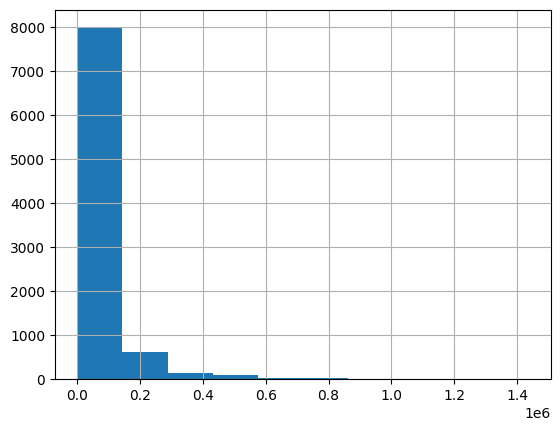

In [ ]:
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
df['charges'].hist()
df['charges'].describe()
median_value = df['charges'].median()
print("Median of Charges:", median_value)

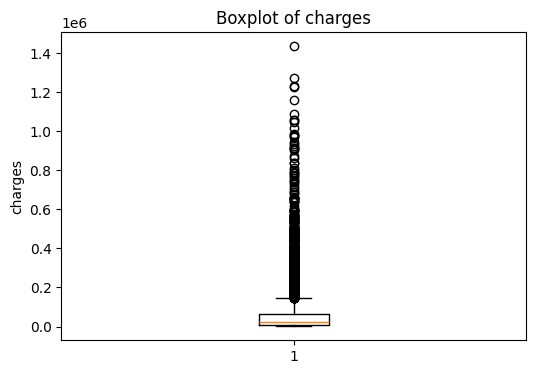

In [ ]:
import matplotlib.pyplot as plt

# Boxplot of Target Variale 'charges'
plt.figure(figsize=(6,4))
plt.boxplot(df['charges'].dropna().values)
plt.title('Boxplot of charges')
plt.ylabel('charges')
plt.show()

The target variable’s distribution is strongly right-skewed, and the boxplot indicates the presence of an outlier.

In [ ]:
# Q1: 1st Quartile (25th percentile)
Q1 = df['charges'].quantile(0.25)
# Q3: 3rd Quartile (75th percentile)
Q3 = df['charges'].quantile(0.75)
# IQR: Interquartile Range
IQR = Q3 - Q1

print(f"Q1 (25th Percentile): {Q1}")
print(f"Q3 (75th Percentile): {Q3}")
print(f"IQR: {IQR}")

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Count outliers using the IQR rule
outliers = ((df['charges'] < lower_bound) | (df['charges'] > upper_bound)).sum()
print(f"Outliers: {outliers}")

Q1 (25th Percentile): 9740.0
Q3 (75th Percentile): 64598.0
IQR: 54858.0
Lower Bound: -72547.0
Upper Bound: 146885.0
Outliers: 912


By calculating the interquartile range (IQR) for the target variable, we identified 912 data points, or approximately 10% of the total, that could be considered outliers. However, when these values are examined in a medical context, all charges fall within a plausible range. Therefore, they are not treated as outliers, and all data points are retained for analysis.

#**4. Basic data exploration**



In [ ]:
# Looking at sample rows in the data
df.head()

id       age  death     sex  hospdead  slos  d.time            dzgroup  \
0   1  62.84998      0    male         0     5    2029        Lung Cancer   
1   2  60.33899      1  female         1     4       4          Cirrhosis   
2   3  52.74698      1  female         0    17      47          Cirrhosis   
3   4  42.38498      1  female         0     3     133        Lung Cancer   
4   5  79.88495      0  female         0    16    2029  ARF/MOSF w/Sepsis   

              dzclass  num.co  ...      crea    sod        ph  glucose  bun  \
0              Cancer       0  ...  1.199951  141.0  7.459961      NaN  NaN   
1  COPD/CHF/Cirrhosis       2  ...  5.500000  132.0  7.250000      NaN  NaN   
2  COPD/CHF/Cirrhosis       2  ...  2.000000  134.0  7.459961      NaN  NaN   
3              Cancer       2  ...  0.799927  139.0       NaN      NaN  NaN   
4            ARF/MOSF       1  ...  0.799927  143.0  7.509766      NaN  NaN   

   urine  adlp adls                sfdm2  adlsc  
0    NaN   7.0  7.0                  NaN    7.0  
1    NaN   NaN  1.0     <2 mo. follow-up    1.0  
2    NaN   1.0  0.0     <2 mo. follow-up    0.0  
3    NaN   0.0  0.0  no(M2 and SIP pres)    0.0  
4    NaN   NaN  2.0  no(M2 and SIP pres)    2.0  

[5 rows x 48 columns]

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

In [ ]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

id          age        death   sex     hospdead         slos  \
count   9105.000000  9105.000000  9105.000000  9105  9105.000000  9105.000000   
unique          NaN          NaN          NaN     2          NaN          NaN   
top             NaN          NaN          NaN  male          NaN          NaN   
freq            NaN          NaN          NaN  5125          NaN          NaN   
mean    4553.000000    62.650823     0.681054   NaN     0.259198    17.863042   
std     2628.531434    15.593710     0.466094   NaN     0.438219    22.006440   
min        1.000000    18.041990     0.000000   NaN     0.000000     3.000000   
25%     2277.000000    52.797000     0.000000   NaN     0.000000     6.000000   
50%     4553.000000    64.856990     1.000000   NaN     0.000000    11.000000   
75%     6829.000000    73.998960     1.000000   NaN     1.000000    20.000000   
max     9105.000000   101.847960     1.000000   NaN     1.000000   343.000000   

             d.time            dzgroup   dzclass       num.co  ...  \
count   9105.000000               9105      9105  9105.000000  ...   
unique          NaN                  8         4          NaN  ...   
top             NaN  ARF/MOSF w/Sepsis  ARF/MOSF          NaN  ...   
freq            NaN               3515      4227          NaN  ...   
mean     478.449863                NaN       NaN     1.868644  ...   
std      560.383272                NaN       NaN     1.344409  ...   
min        3.000000                NaN       NaN     0.000000  ...   
25%       26.000000                NaN       NaN     1.000000  ...   
50%      233.000000                NaN       NaN     2.000000  ...   
75%      761.000000                NaN       NaN     3.000000  ...   
max     2029.000000                NaN       NaN     9.000000  ...   

               crea          sod           ph      glucose          bun  \
count   9038.000000  9104.000000  6821.000000  4605.000000  4753.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       1.770961   137.568541     7.415364   159.873398    32.349463   
std        1.686041     6.029326     0.080563    88.391541    26.792288   
min        0.099991   110.000000     6.829102     0.000000     1.000000   
25%        0.899902   134.000000     7.379883   103.000000    14.000000   
50%        1.199951   137.000000     7.419922   135.000000    23.000000   
75%        1.899902   141.000000     7.469727   188.000000    42.000000   
max       21.500000   181.000000     7.769531  1092.000000   300.000000   

              urine         adlp         adls             sfdm2        adlsc  
count   4243.000000  3464.000000  6238.000000              7705  9105.000000  
unique          NaN          NaN          NaN                 5          NaN  
top             NaN          NaN          NaN  <2 mo. follow-up          NaN  
freq            NaN          NaN          NaN              3123          NaN  
mean    2191.546047     1.157910     1.637384               NaN     1.888272  
std     1455.245777     1.739672     2.231358               NaN     2.003763  
min        0.000000     0.000000     0.000000               NaN     0.000000  
25%     1165.500000     0.000000     0.000000               NaN     0.000000  
50%     1968.000000     0.000000     1.000000               NaN     1.000000  
75%     3000.000000     2.000000     3.000000               NaN     3.000000  
max     9000.000000     7.000000     7.000000               NaN     7.073242  

[11 rows x 48 columns]

In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

id          9105
age         7323
death          2
sex            2
hospdead       2
slos         167
d.time      1724
dzgroup        8
dzclass        4
num.co        10
edu           31
income         4
scoma         11
charges     8501
totcst      8197
totmcst     5516
avtisst      352
race           5
sps          604
aps          125
surv2m       949
surv6m       936
hday          85
diabetes       2
dementia       2
ca             3
prg2m         51
prg6m         87
dnr            3
dnrday       177
meanbp       164
wblc         499
hrt          186
resp          66
temp          98
pafi        1457
alb           60
bili         295
crea         130
sod           60
ph            77
glucose      439
bun          159
urine       1494
adlp           8
adls           8
sfdm2          5
adlsc       1735
dtype: int64

**Data Exploration Results**

The selected columns in this step are not final, further study will be done and then a final list will be created

* id - Categorical(nominal). Unselected.
* age - Continuous(numeric). Selected.
* death - Categorical(nominal). Selected.
* sex - Categorical(nominal). Selected.
* hospdead - Categorical(nominal). Selected.
* slos - Continuous(numeric). Selected.
* d.time - Continuous(numeric). Selected.
* dzgroup - Categorical(nominal). Selected.
* dzclass - Categorical(nominal). Selected.
* num.co - Categorical(ordinal). Selected.
* edu - Continuous(numeric). Unselected.
* income - Categorical(ordinal). Selected.
* scoma - Continuous(numeric). Selected.
* charges - Continuous(numeric). Selected. This is the **Target Variable!**
* totcst - Continuous(numeric). Selected.
* totmcst - Continuous(numeric). Selected.
* avtisst - Continuous(numeric). Selected.
* race - Categorical(nominal). Unselected.
* sps -	Continuous(numeric). Selected.
* aps - Continuous(numeric). Selected.
* surv2m - Continuous(numeric). Selected.
* surv6m - Continuous(numeric). Selected.
* hday - Continuous(numeric). Selected.
* diabetes - Categorical(nominal). Selected.
* dementia - Categorical(nominal). Selected.
* ca - Categorical(nominal). Selected.
* prg2m - Continuous(numeric). Selected.
* prg6m - Continuous(numeric). Selected.
* dnr - Categorical(nominal). Selected.
* dnrday - Continuous(numeric). Selected.
* meanbp - Continuous(numeric). Selected.
* wblc - Continuous(numeric). Selected.
* hrt - Continuous(numeric). Selected.
* resp - Continuous(numeric). Selected.
* temp - Continuous(numeric). Selected.
* pafi - Continuous(numeric). Selected.
* alb - Continuous(numeric). Selected.
* bili - Continuous(numeric). Selected.
* crea - Continuous(numeric). Selected.
* sod - Continuous(numeric). Selected.
* ph - Continuous(numeric). Selected.
*	glucose - Continuous(numeric). Selected.
* bun - Continuous(numeric). Selected.
* urine - Continuous(numeric). Selected.
* adlp - Categorical(ordinal). Selected.
* adls - Categorical(ordinal). Selected.
* sfdm2 - Categorical(nominal). Selected.
* adlsc - Continuous(numeric). Selected.

**Summary:** Columns ‘id’, ‘edu’, and ‘race’ will be removed as they do not have a significant impact on patients’ healthcare costs.

# **5. Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts) and feature selection based on data distribution**



## **5.1. Visualize distribution of all the Categorical Predictor variables in the data using bar plots**

We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted fourteen categorical predictors in the data

**Categorical Predictors:**

'death', 'sex', 'hospdead', 'dzgroup', 'dzclass', 'num.co', 'income', 'diabetes', 'dementia', 'ca', 'dnr', 'adlp', 'adls', 'sfdm2'

We use bar charts to see how the data is distributed for these categorical columns.

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot, ncols=3, figsize=(15, 10)):
    import matplotlib.pyplot as plt

    n = len(colsToPlot)
    nrows = (n + ncols - 1) // ncols  # คำนวณจำนวนแถว
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    fig.suptitle('Bar charts of: ' + ', '.join(colsToPlot))

    for i, colName in enumerate(colsToPlot):
        inpData.groupby(colName).size().plot(kind='bar', ax=axes[i])
        axes[i].set_title(colName)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')

    # ลบ subplot ที่ไม่ได้ใช้
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

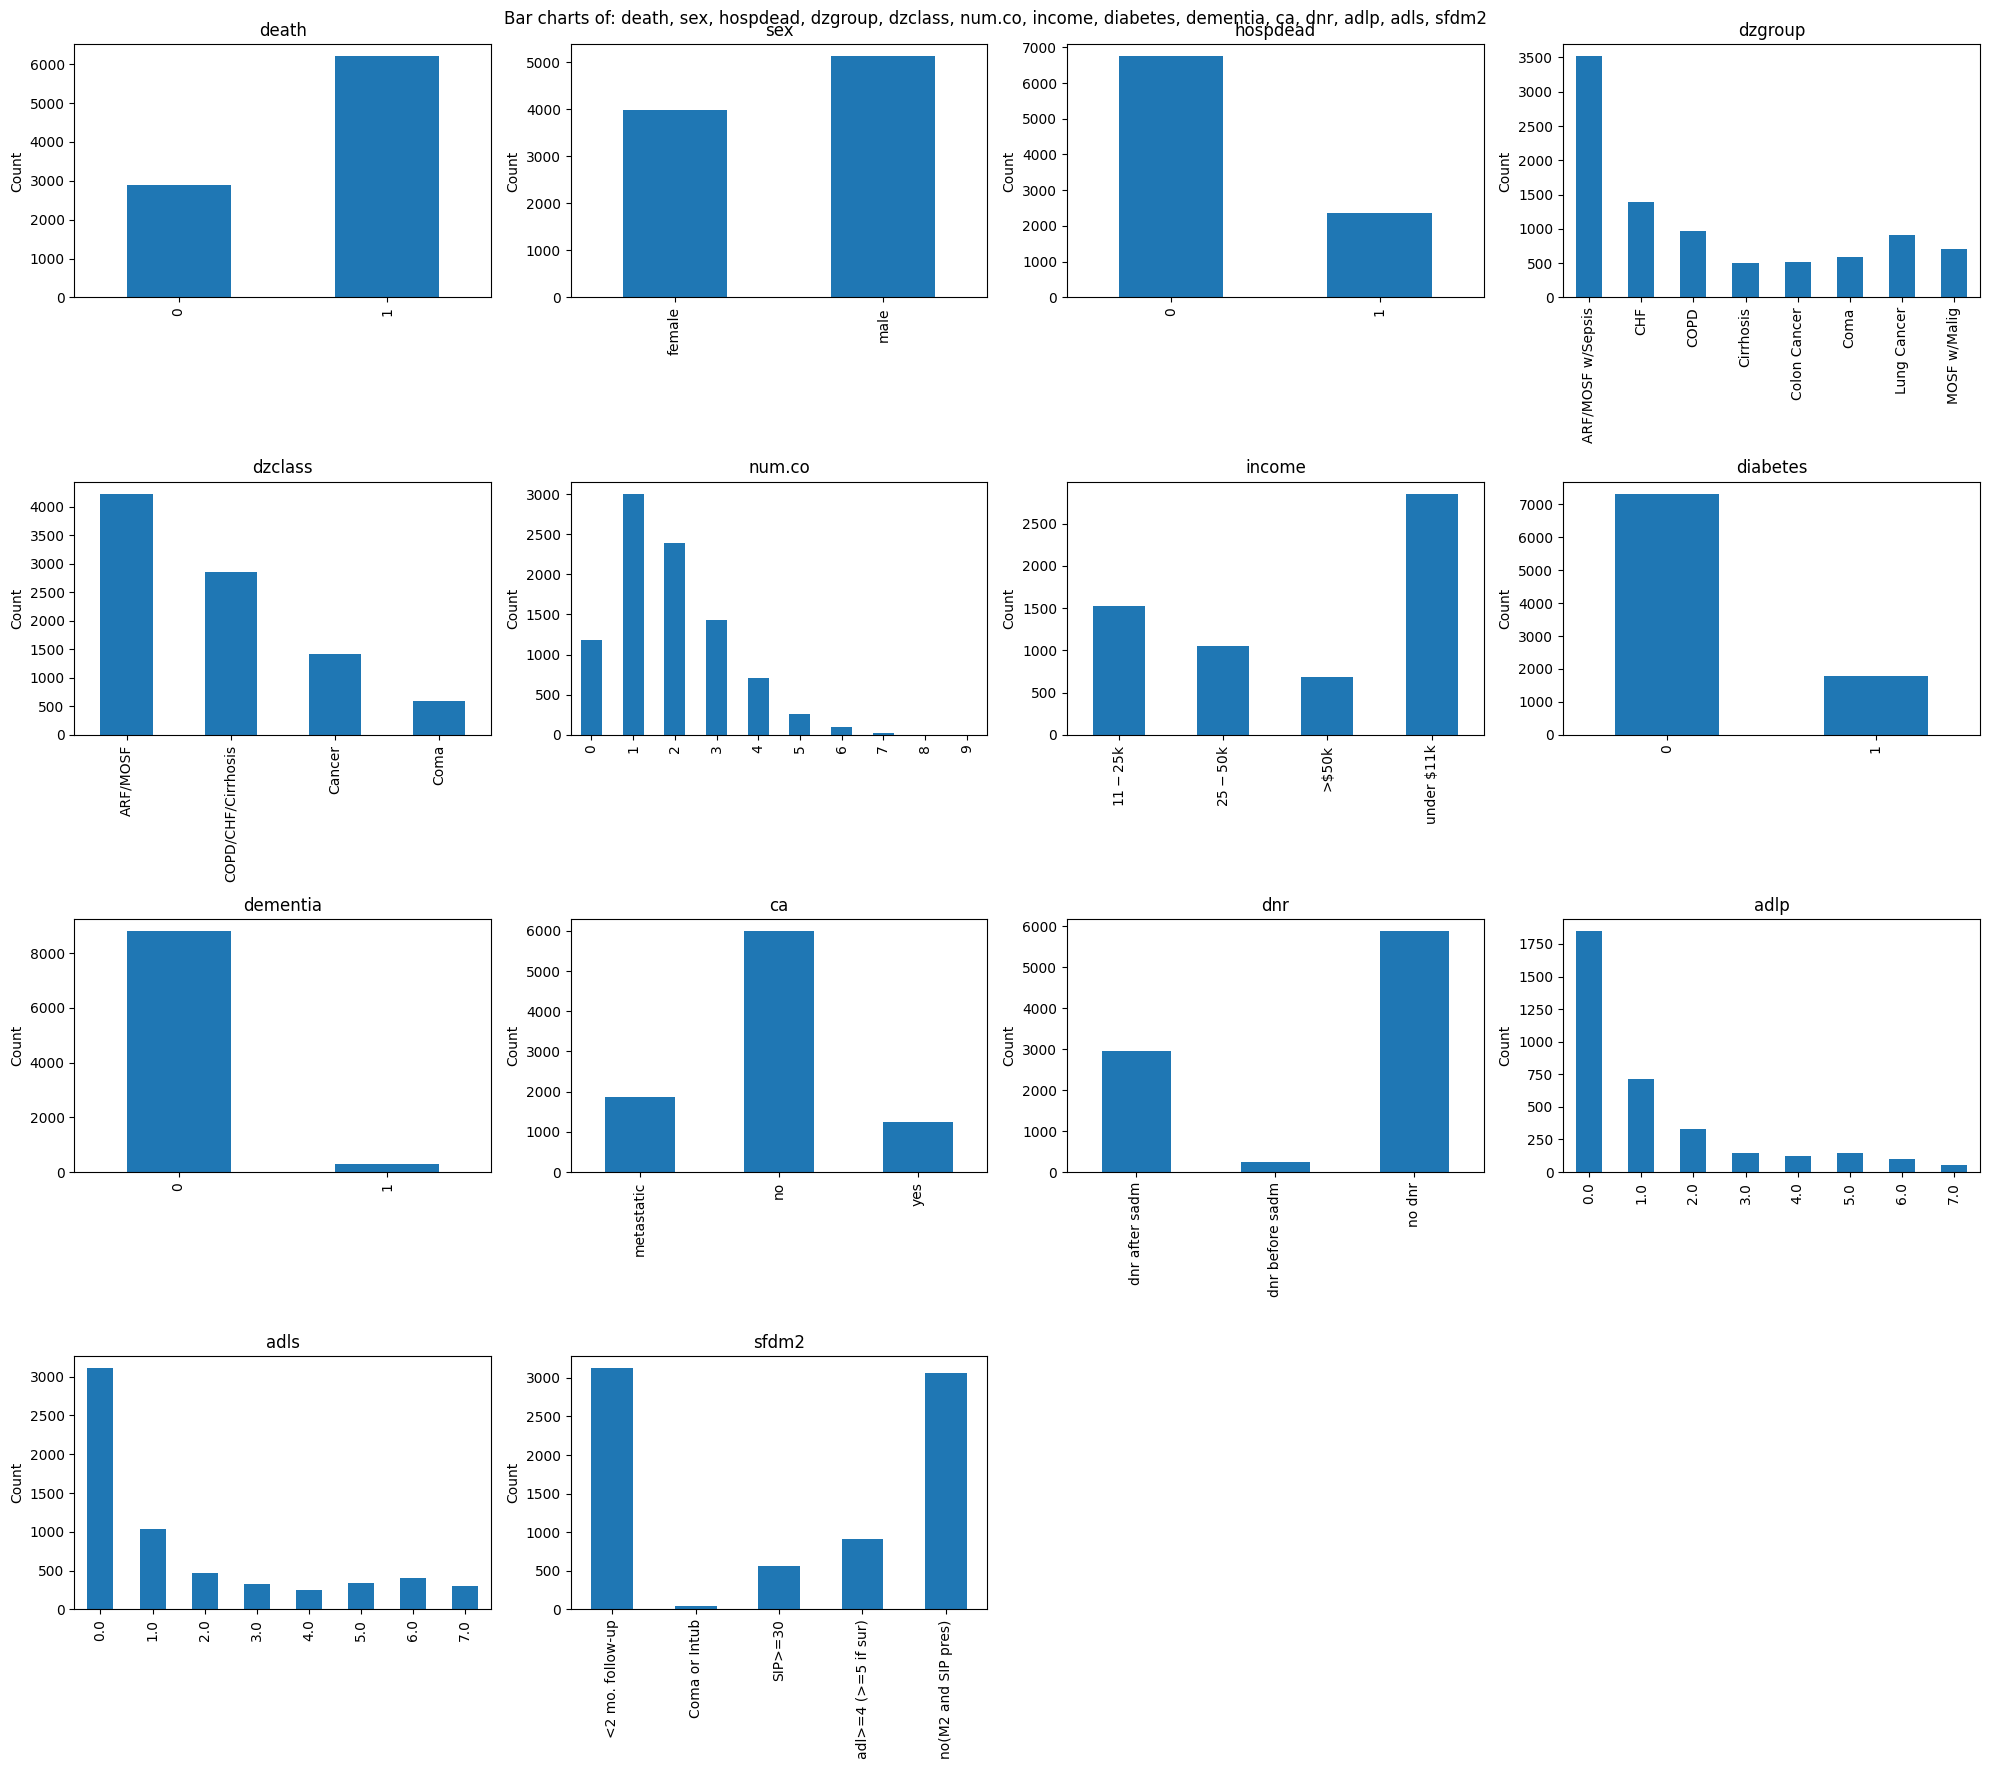

In [ ]:
# Calling the function
PlotBarCharts(inpData=df, colsToPlot=['death', 'sex', 'hospdead', 'dzgroup', 'dzclass', 'num.co', 'income', 'diabetes',
                                     'dementia', 'ca', 'dnr', 'adlp', 'adls', 'sfdm2'], ncols=4, figsize=(20, 18))

### **Bar Charts Interpretation**

**Interpretation**

- death: Two-category variable. Not skewed in the usual sense; just more “1” than “0” (class imbalance).
- sex: Balanced fairly well, only slight difference. Not really skewed.
- hospdead: Two categories. More “0” than “1” (class imbalance).
- dzgroup: Strongly Right-skewed. Most patients in “ARF/MOSF/sepsis” and then fewer in other classes.
- dzclass: Right-skewed. Most cases in “ARF/MOSF,” then fewer in other classes.
- num.co: Right-skewed. Most people have 0–2 comorbidities, very few at high numbers (4–8).
- income: Left-skewed. Big chunk in “under $11k,” fewer in high brackets.
- diabetes: Two categories, mostly “0” (no diabetes), fewer “1” (has diabetes). (class imbalance)
- dementia: Two categories, extremely imbalanced. Most are “0.”
- ca: Imbalanced distribution across categories.
- dnr: Left-skewed, heavily imbalanced toward “no dnr.”
- adlp: Highly right-skewed. Most people at 0, decreasing as score increases.
- adls: Highly right-skewed. Most people at 0, decreasing as score increases.
- sfdm2: Two dominant categories. This variable is strongly skewed in the sense of class imbalance.

**Selected Categorical Variables:** All the categorical variables are selected for further analysis.
* **'death':** Selected
* **'sex':** Selected
* **'hospdead':** Selected
* **'dzgroup':** Selected
* **'dzclass':** Selected
* **'num.co':** Selected
* **'income':** Selected
* **'diabetes':** Selected
* **'dementia':** Selected **(Doubt)**
* **'ca':** Selected
* **'dnr':** Selected
* **'adlp':** Selected
* **'adls':** Selected
* **'sfdm2':** Selected

## **5.2. Visualize distribution of all the Continuous Predictor variables in the data using histograms and boxplots**

Based on the Basic Data Exploration, there are thirty continuous predictor variables : 'age', 'slos', 'd.time', 'scoma', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', and 'adlsc'

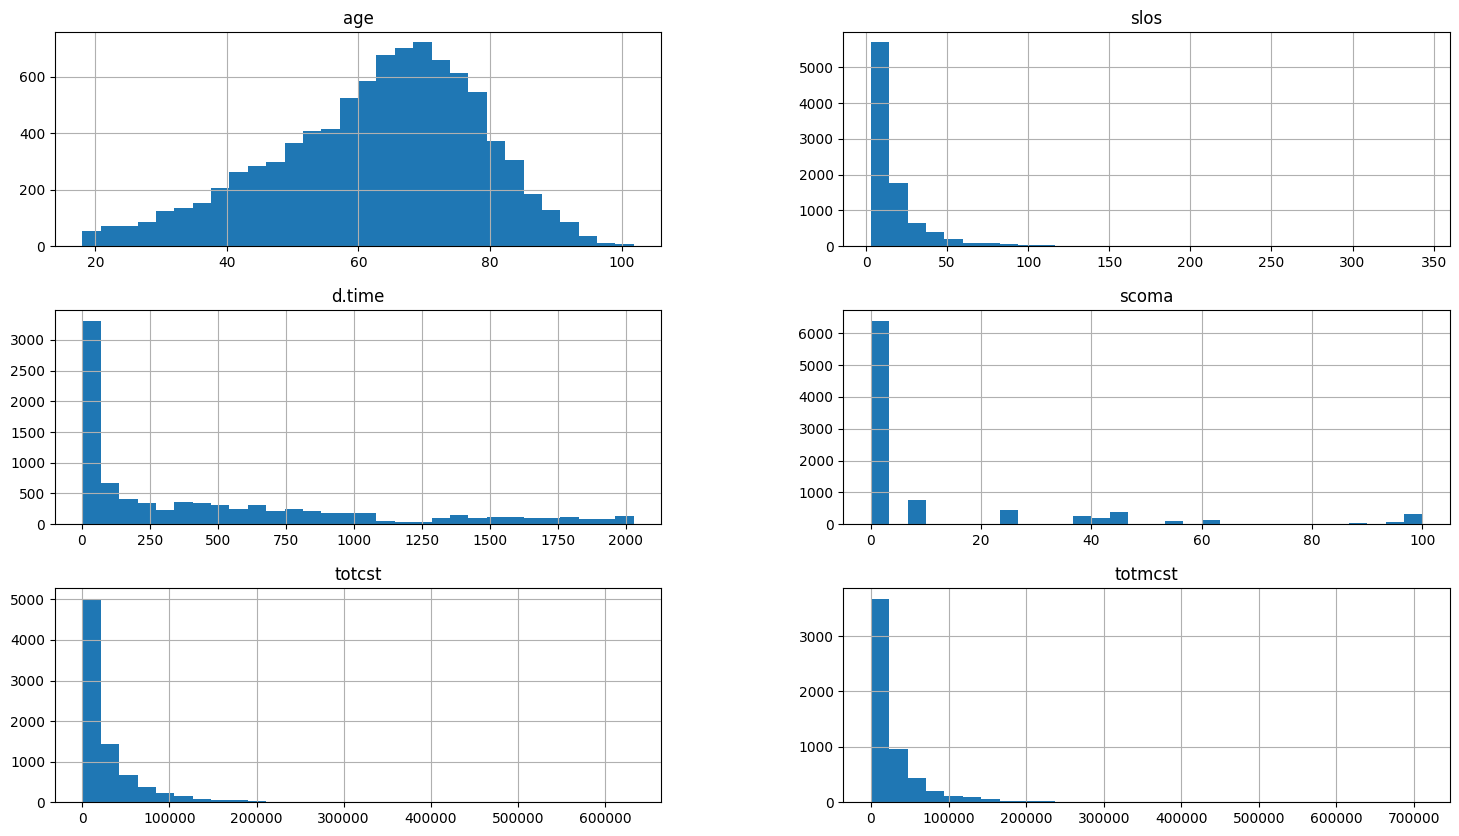

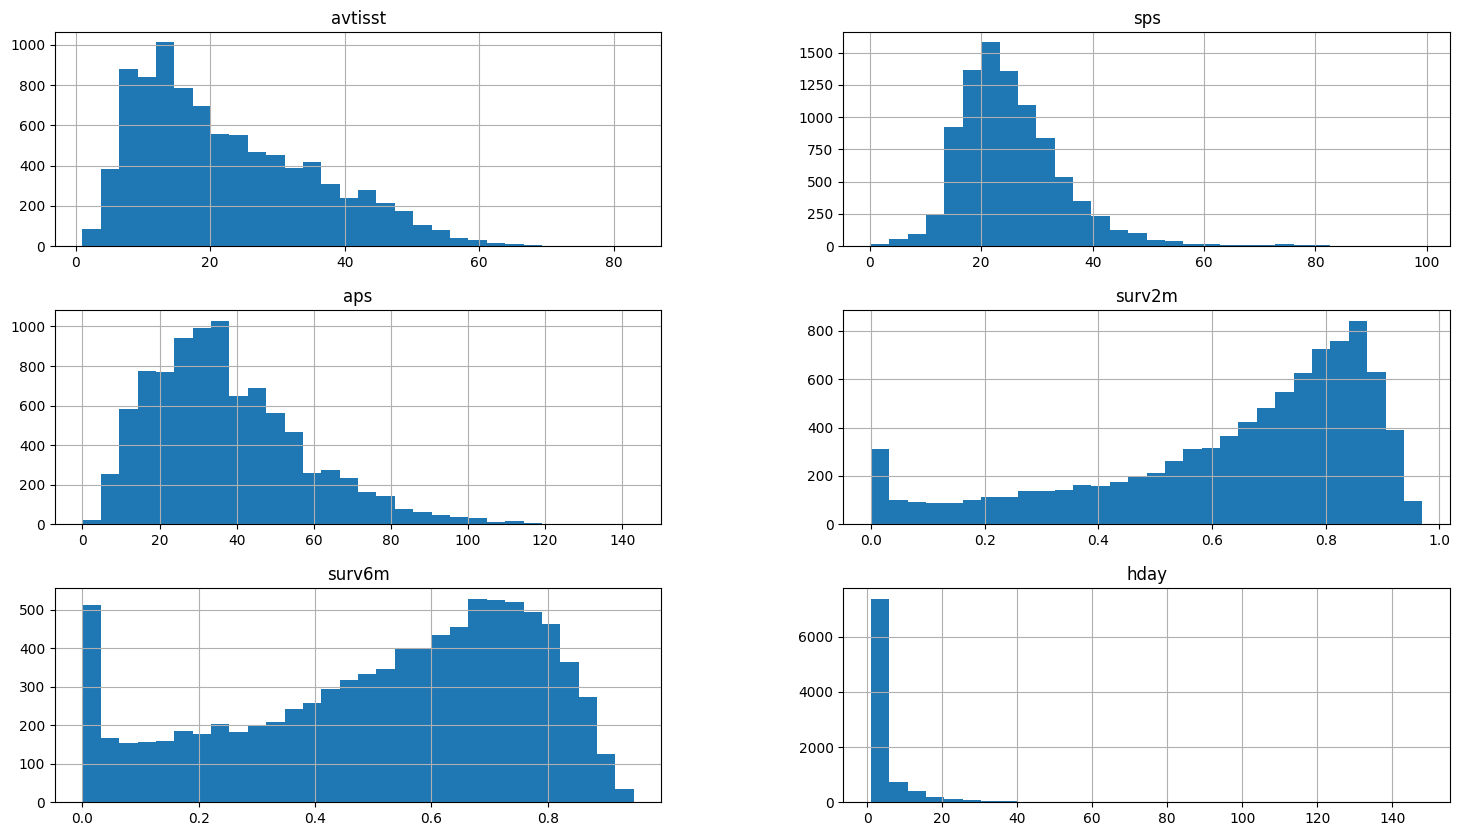

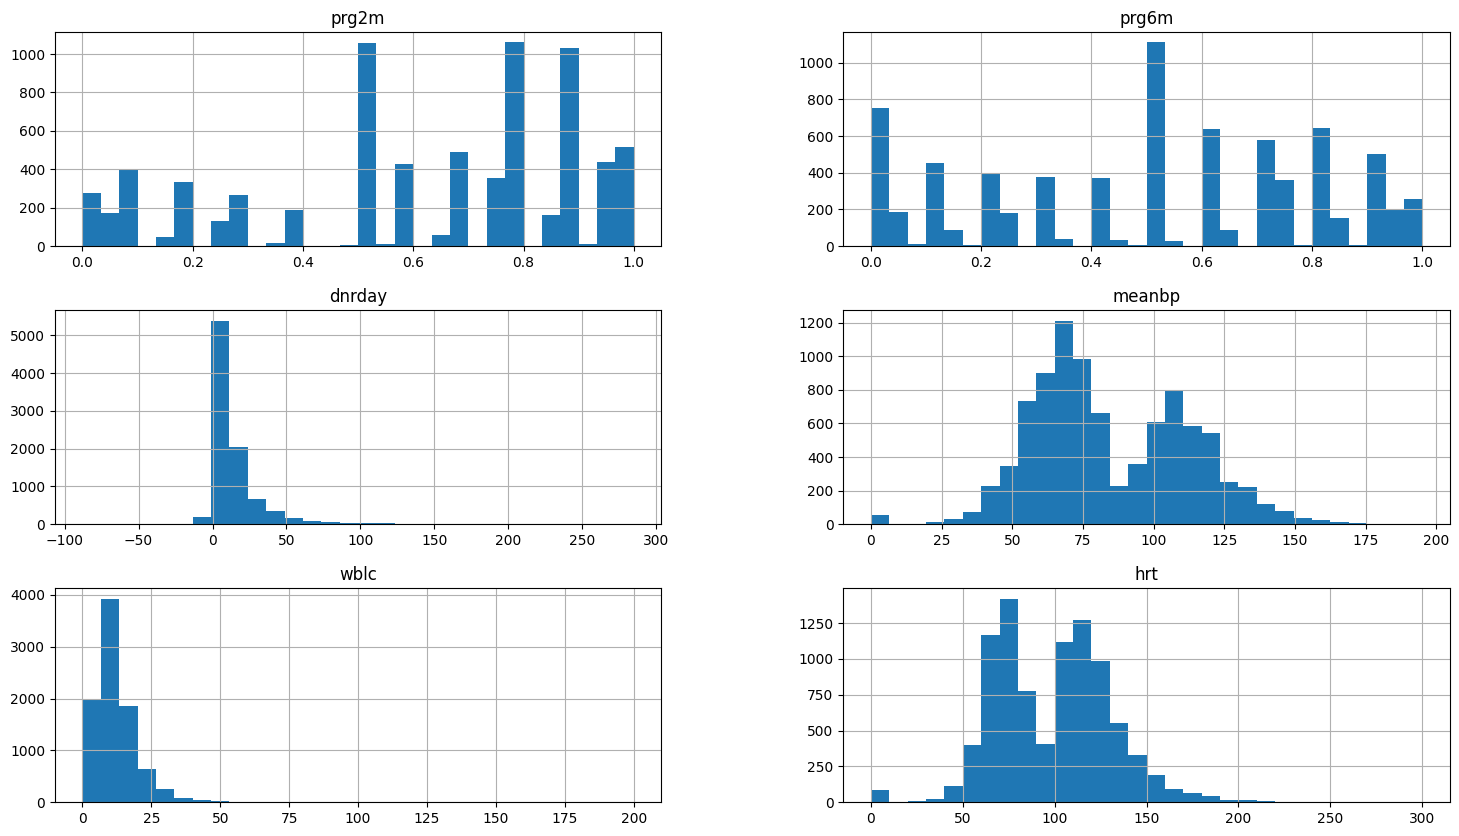

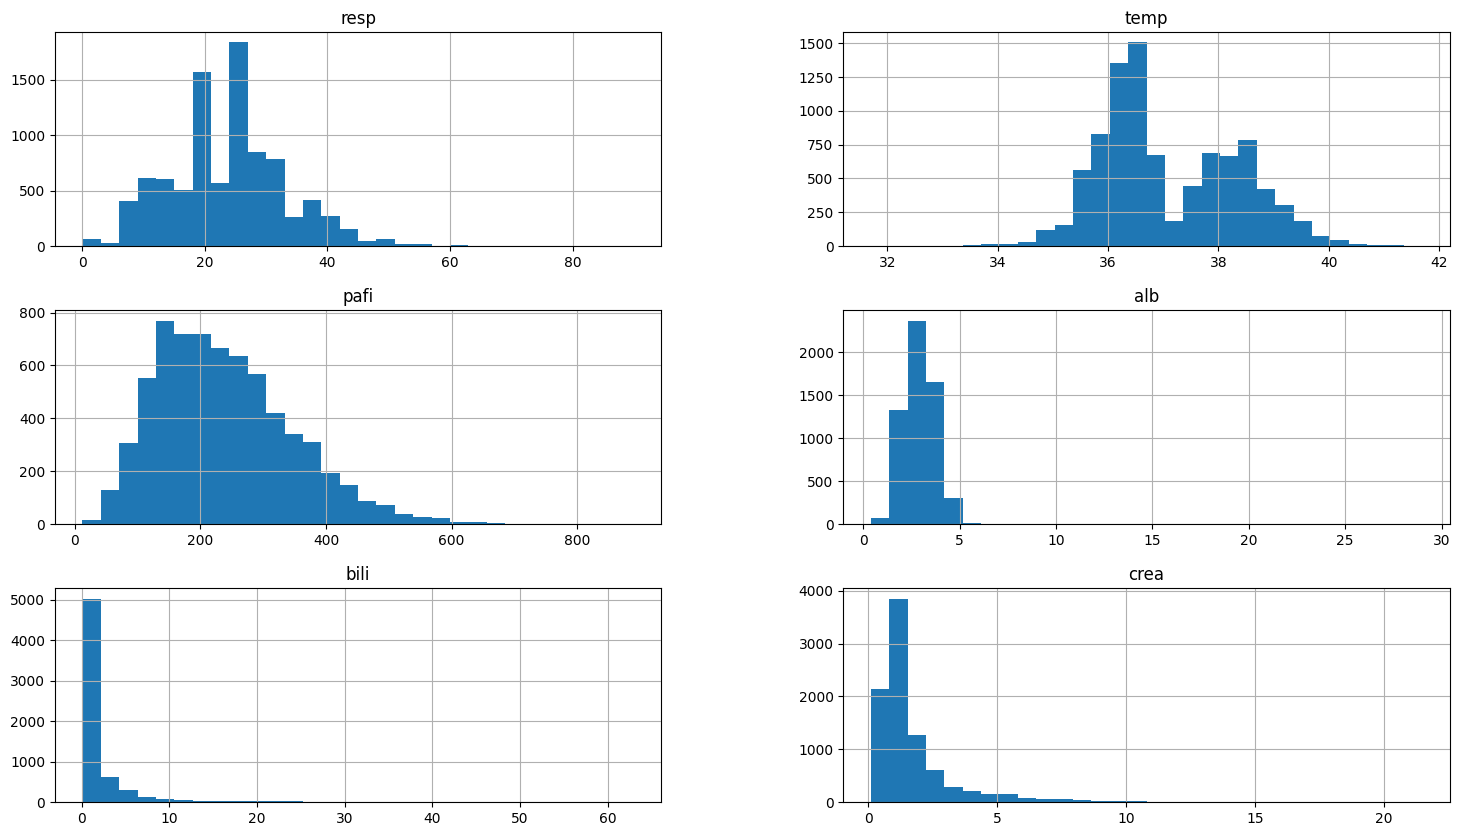

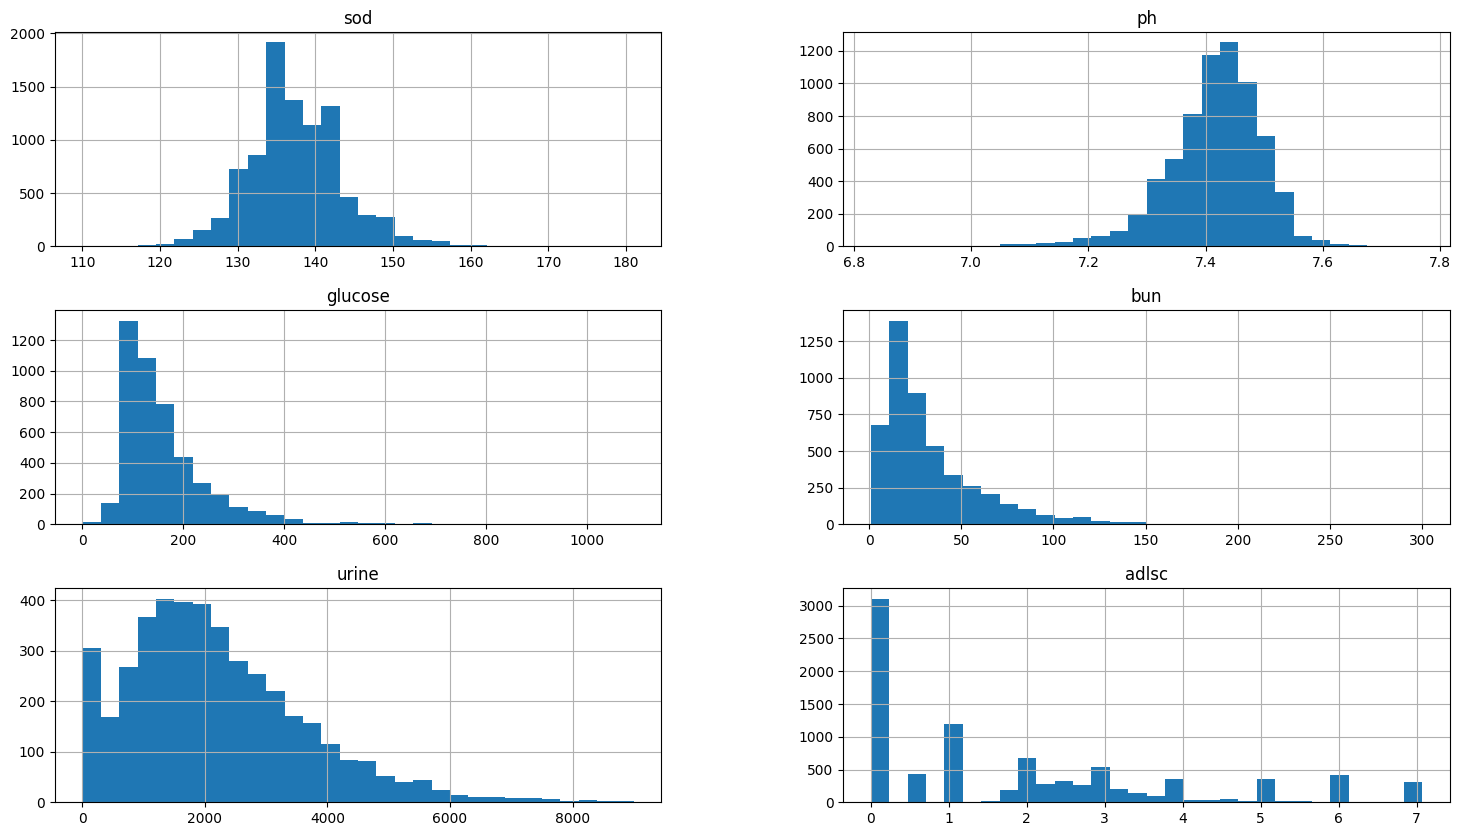

In [ ]:
# Plotting histograms of multiple columns together
cols = ['age', 'slos', 'd.time', 'scoma', 'totcst', 'totmcst', 'avtisst', 'sps',
        'aps', 'surv2m', 'surv6m', 'hday', 'prg2m',  'prg6m', 'dnrday', 'meanbp',
        'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph',
        'glucose',  'bun', 'urine', 'adlsc']

for i in range(0, len(cols), 6):
    subcols = cols[i:i+6]
    df[subcols].hist(figsize=(18,10), bins=30)

<Axes: >

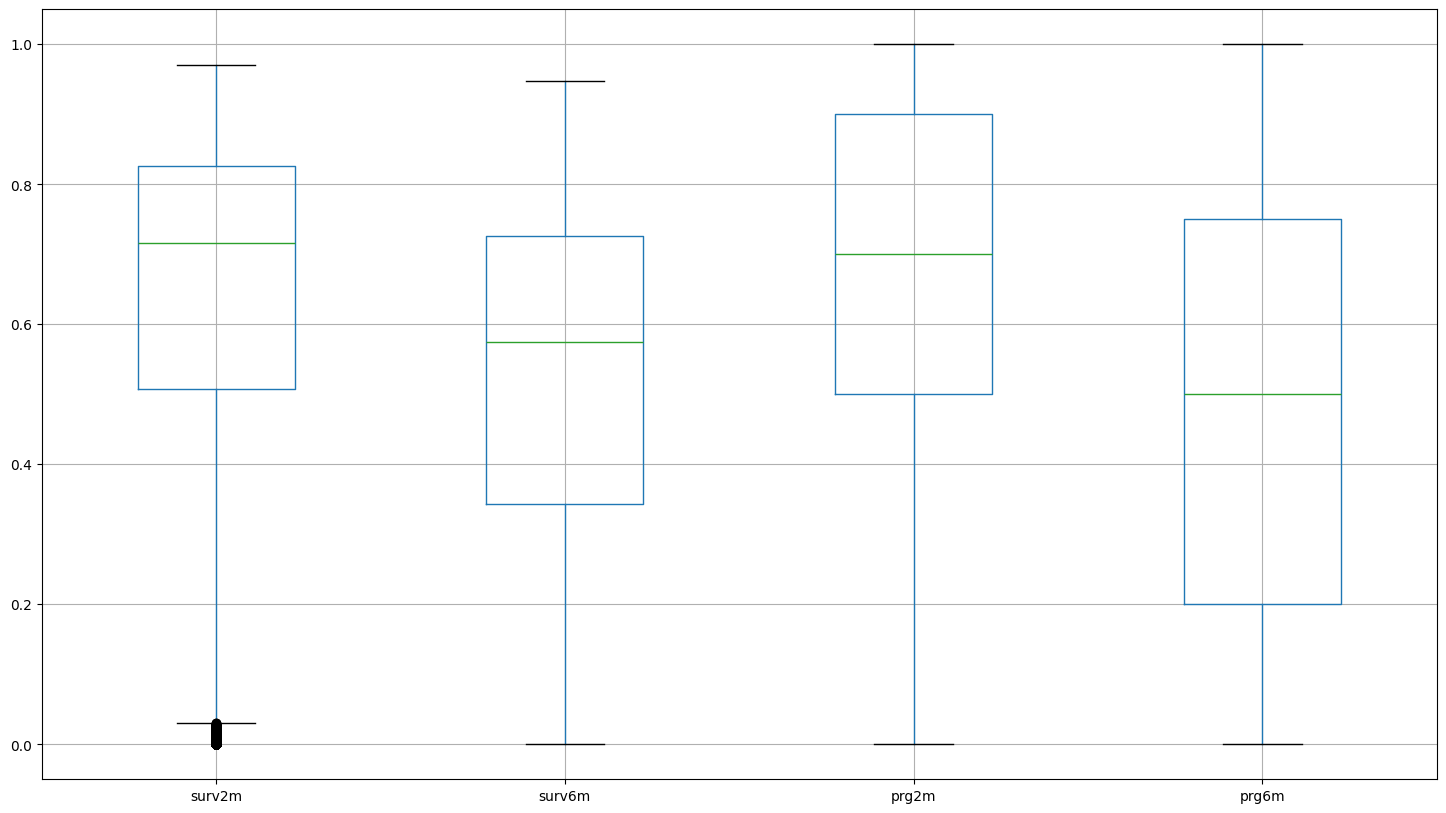

In [ ]:
# Plotting boxplot of multiple columns together to find distribution and outliers
df.boxplot(['surv2m', 'surv6m', 'prg2m', 'prg6m'], figsize=(18,10))

<Axes: >

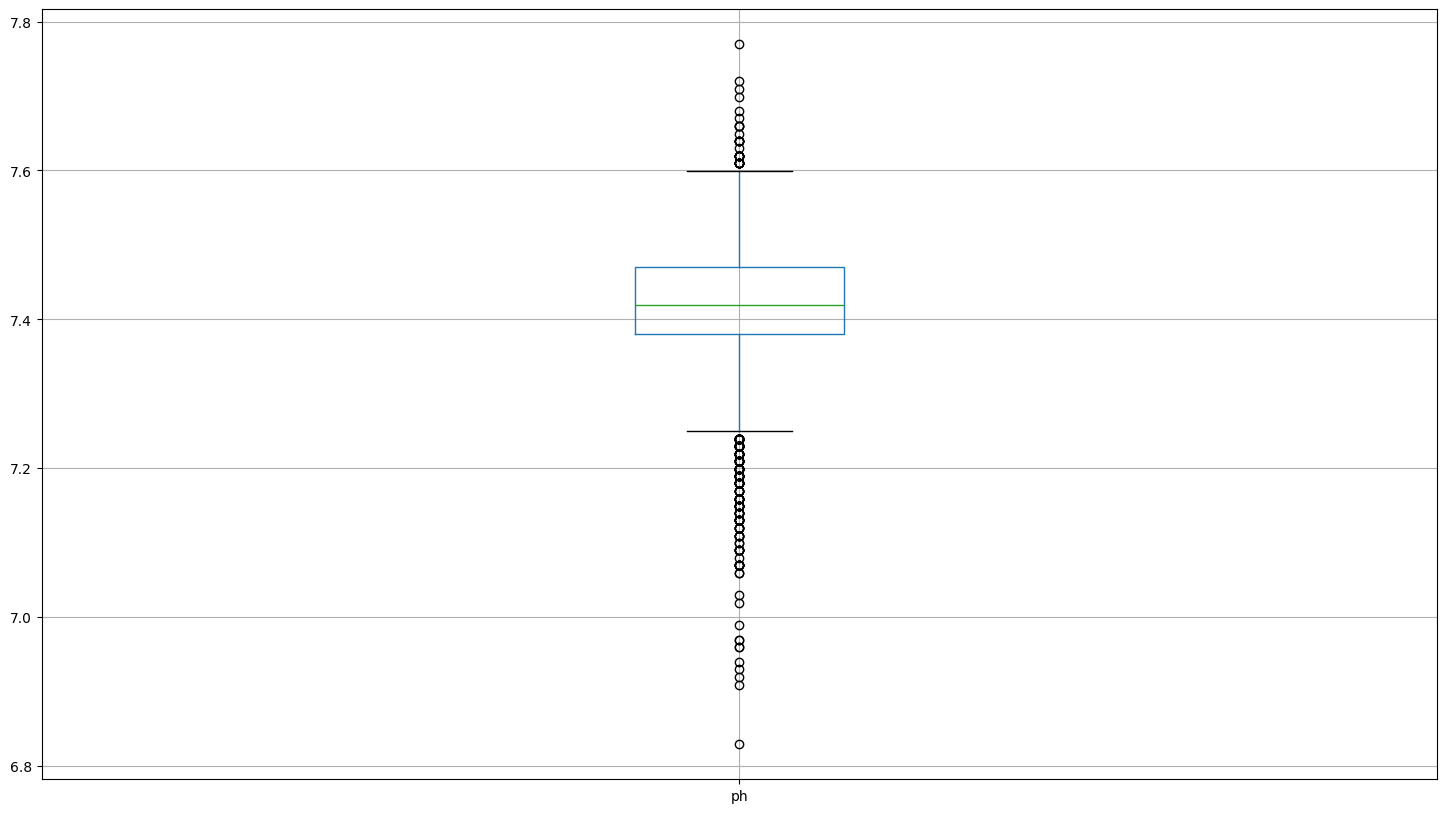

In [ ]:
df.boxplot(['ph'], figsize=(18,10))

<Axes: >

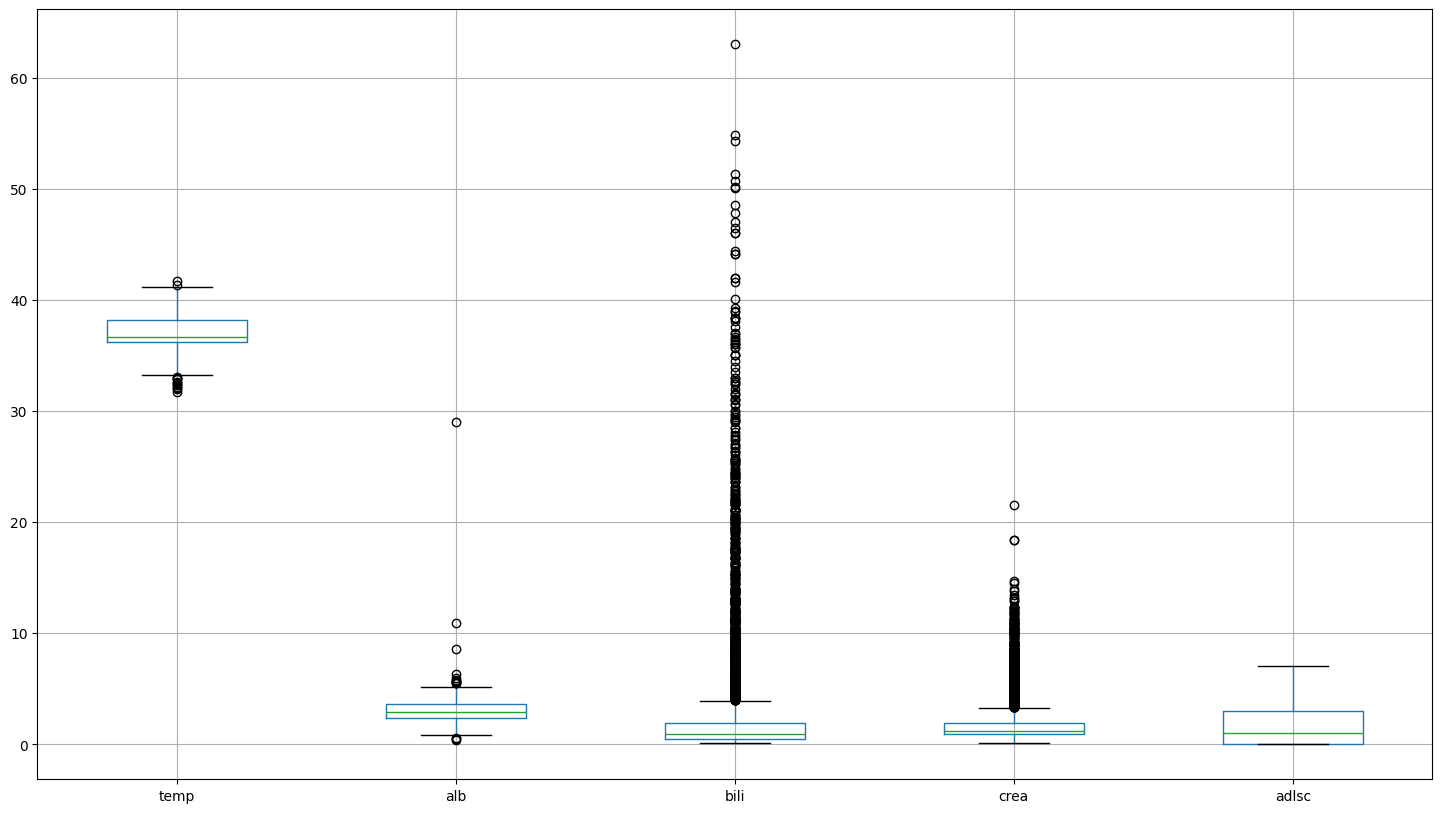

In [ ]:
df.boxplot(['temp', 'alb', 'bili', 'crea', 'adlsc'], figsize=(18,10))

<Axes: >

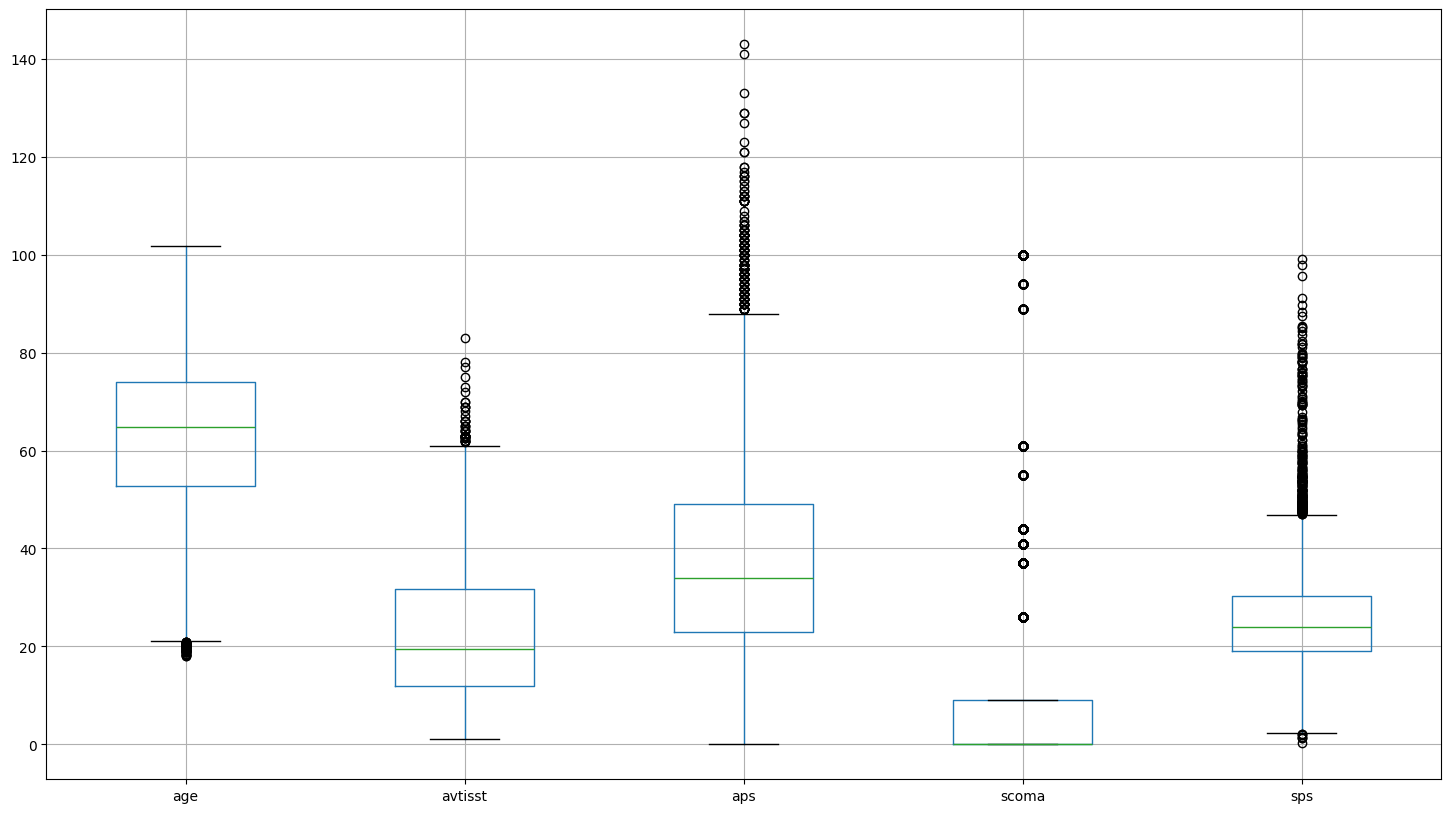

In [ ]:
df.boxplot(['age', 'avtisst', 'aps', 'scoma', 'sps'], figsize=(18,10))

<Axes: >

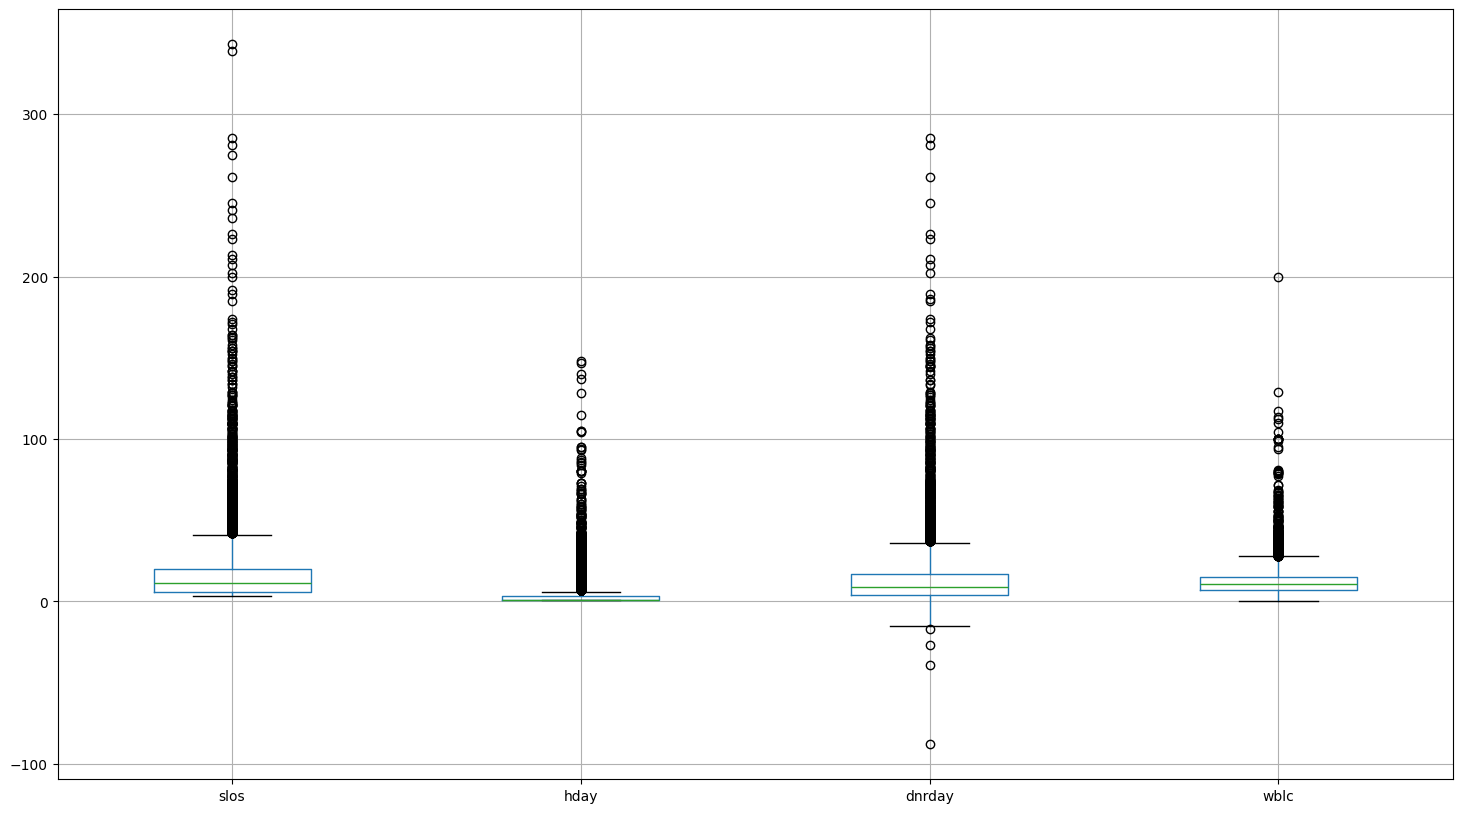

In [ ]:
df.boxplot(['slos', 'hday', 'dnrday', 'wblc'], figsize=(18,10))

<Axes: >

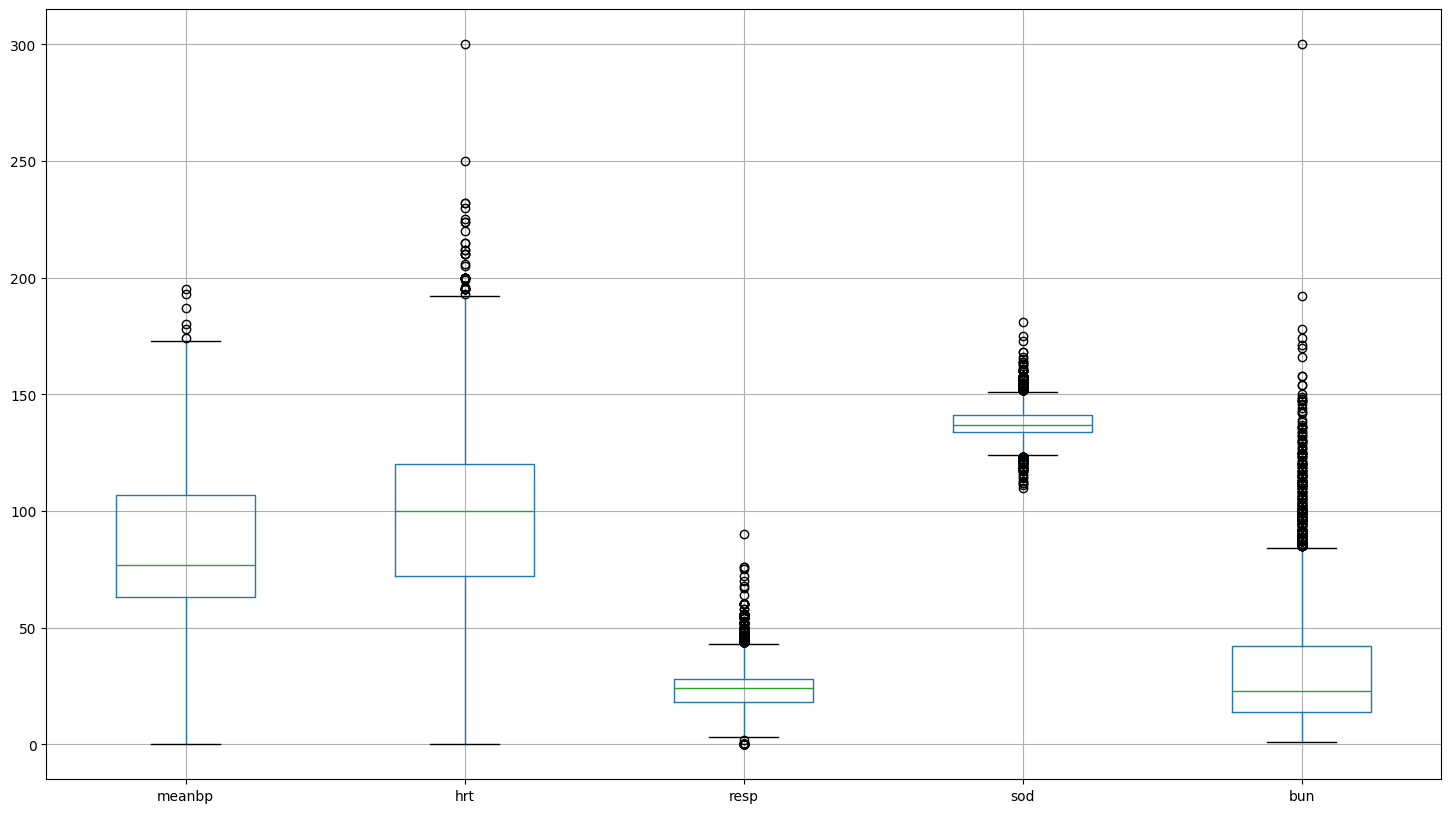

In [ ]:
df.boxplot(['meanbp', 'hrt', 'resp', 'sod', 'bun'], figsize=(18,10))

<Axes: >

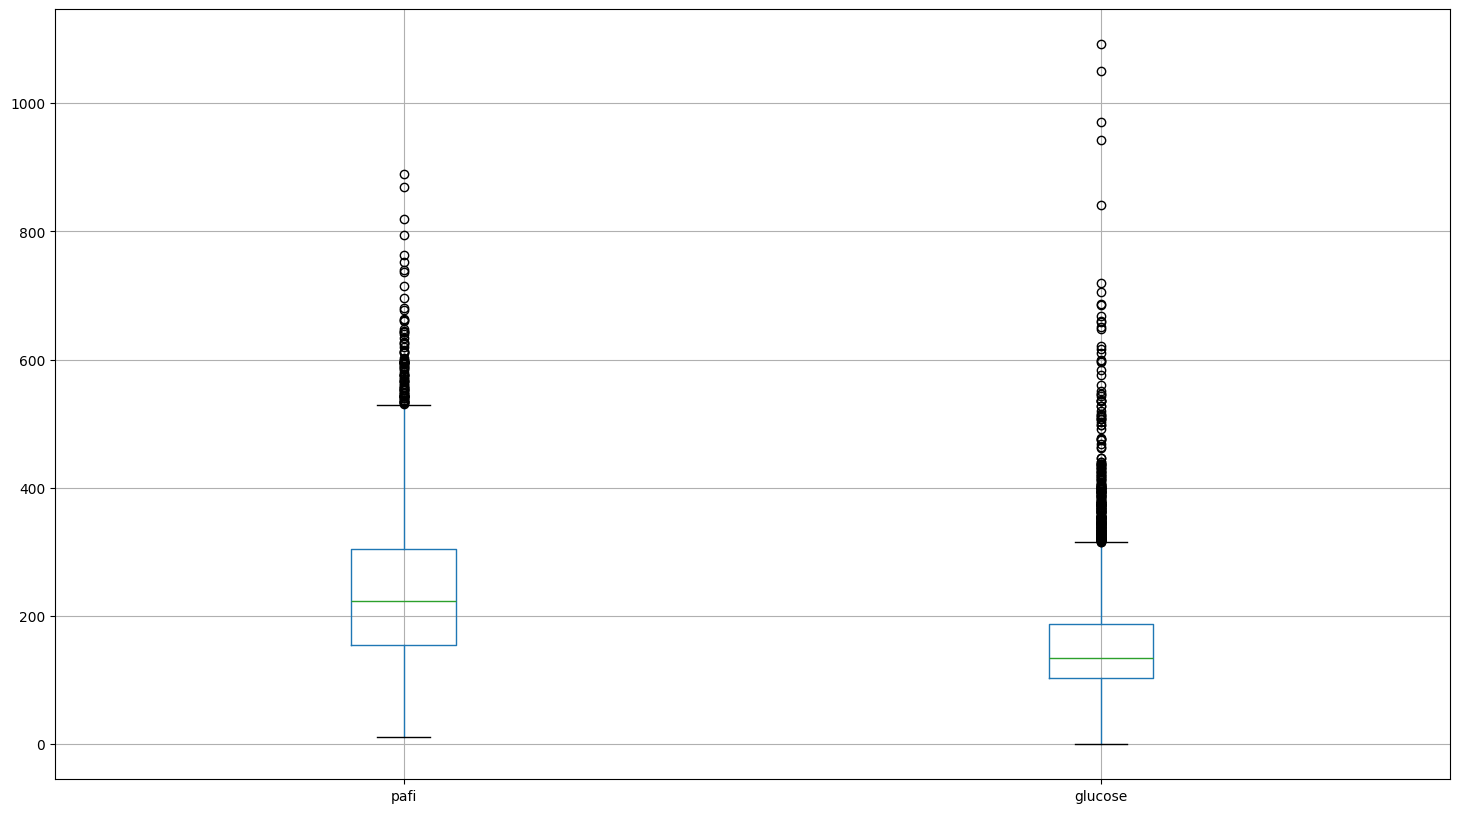

In [ ]:
df.boxplot(['pafi', 'glucose'], figsize=(18,10))

<Axes: >

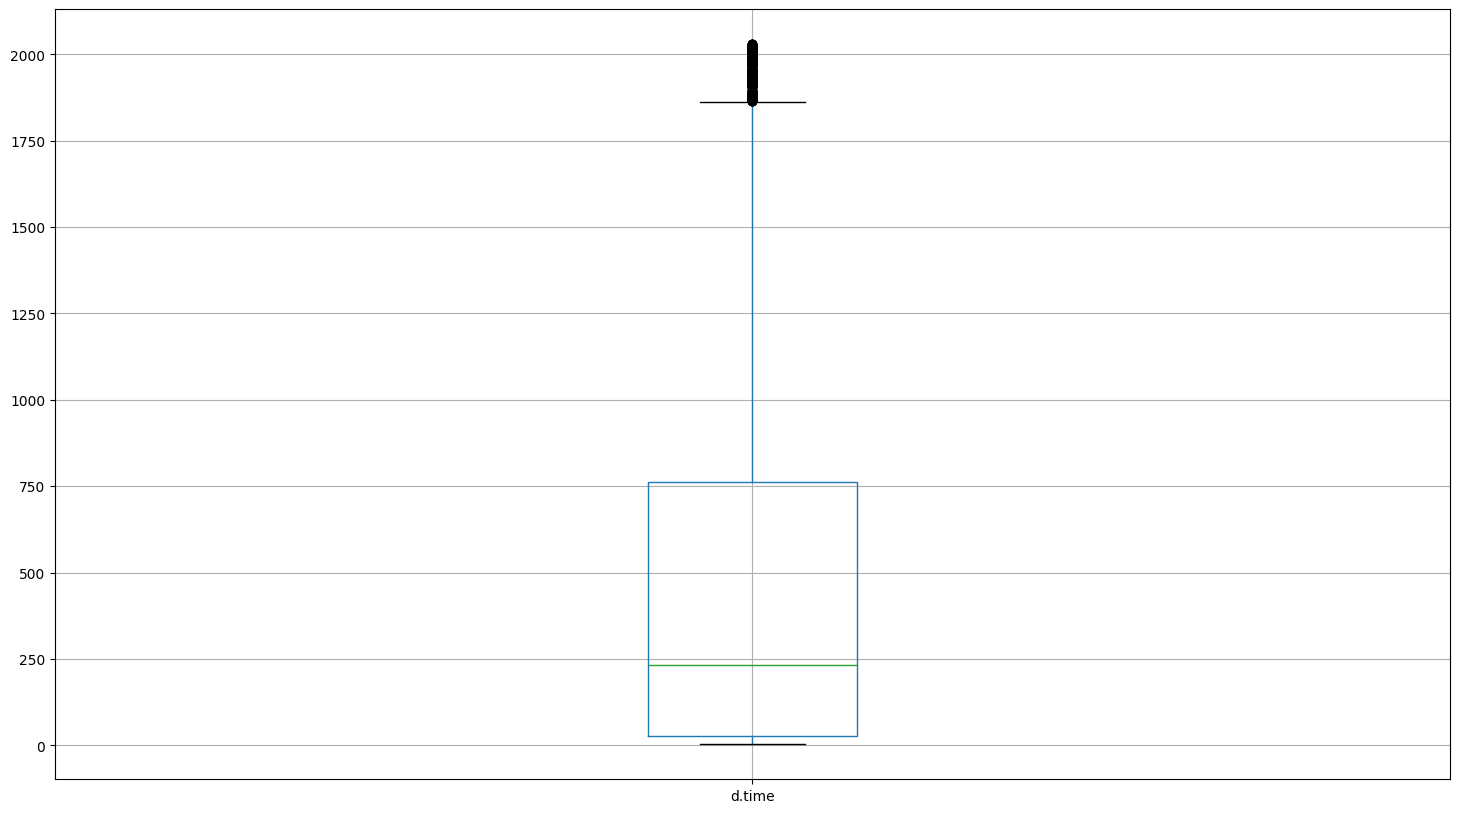

In [ ]:
df.boxplot(['d.time'], figsize=(18,10))

<Axes: >

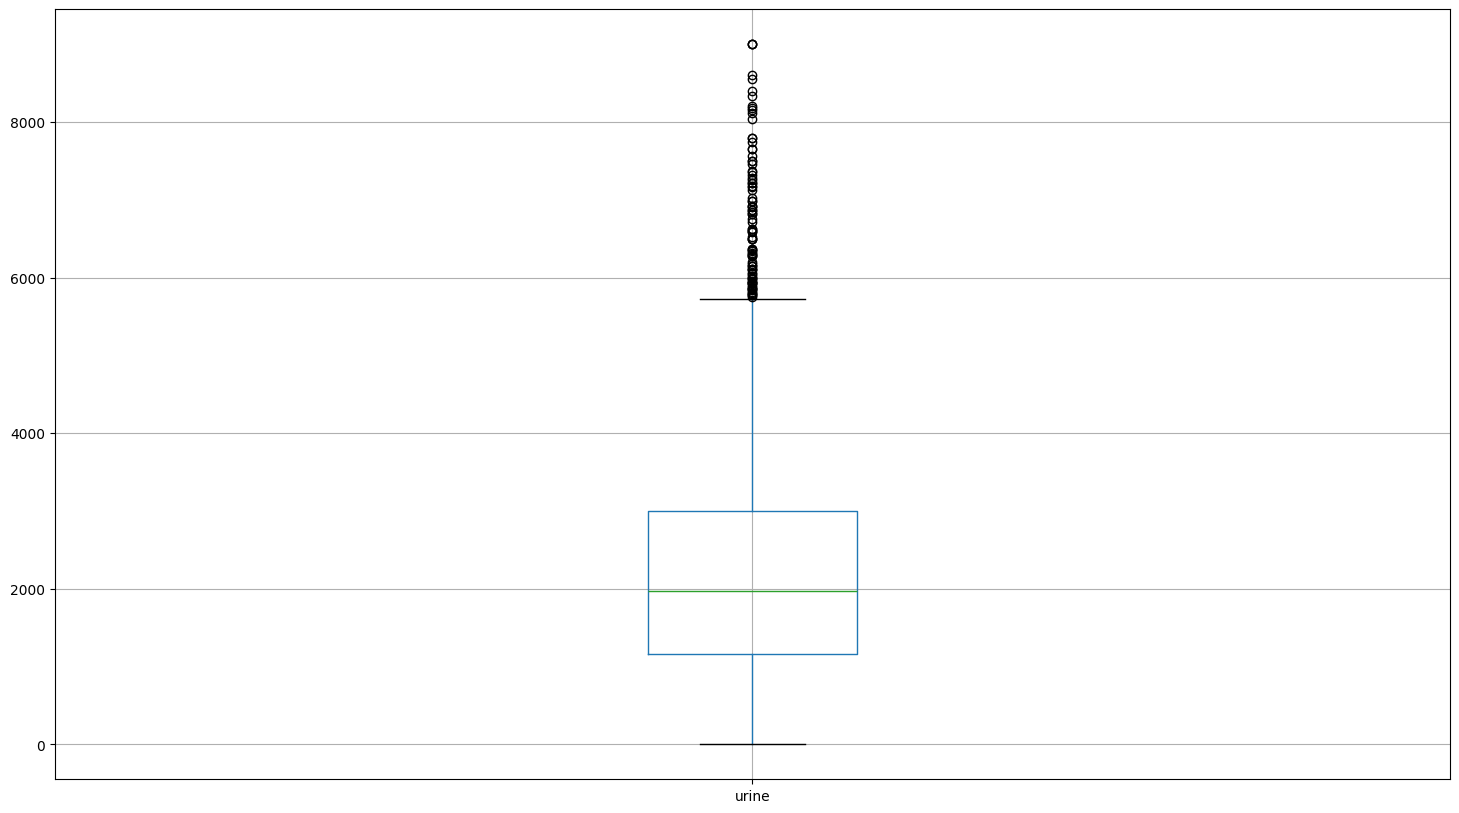

In [ ]:
df.boxplot(['urine'], figsize=(18,10))

<Axes: >

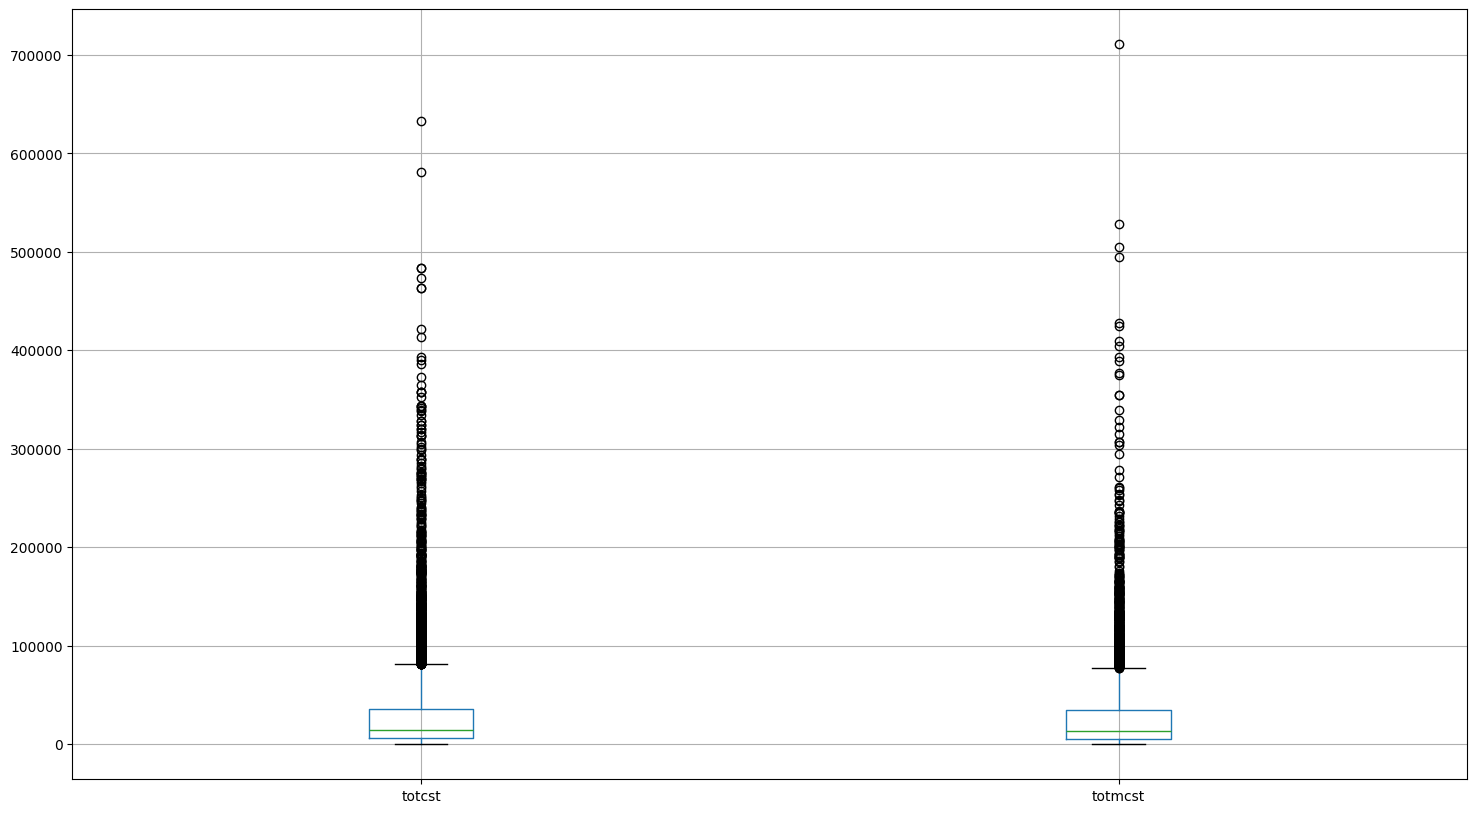

In [ ]:
df.boxplot(['totcst', 'totmcst'], figsize=(18,10))

### **Histogram Interpretation**

**Interpretation**

**Selected Continuous Variables:**

* **age :** Selected. Distribution is close to normal.
* **slos :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **d.time :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **scoma :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **totcst :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **totmcst :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **avtisst :** Selected. Right-skewed, acceptable.
* **sps :** Selected. Distribution is close to normal.
* **aps :** Selected. Right-skewed, acceptable.
* **surv2m :** Selected. Left-skewed, acceptable.
* **surv6m :** Selected. Left-skewed, acceptable.
* **hday :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **prg2m :** Selected. Multimodal distribution, acceptable. **(Doubt)**
* **prg6m :** Selected. Multimodal distribution, acceptable. **(Doubt)**
* **dnrday :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **meanbp :** Selected. Bimodal distribution, acceptable. Outliers seen, need to treat them.
* **wblc :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **hrt :** Selected. Bimodal distribution, acceptable. Outliers seen, need to treat them.
* **resp :** Selected. Multimodal distribution, acceptable.
* **temp :** Selected. Bimodal distribution, acceptable.
* **pafi :** Selected. Right-skewed, acceptable. Outliers seen, need to treat them.
* **alb :** Selected. Strongly right-skewed, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **bili :** Selected. Strongly right-skewed, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **crea :** Selected. Strongly right-skewed, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **sod :** Selected. Bimodal distribution, acceptable. Outliers seen, need to treat them.
* **ph :** Selected. Slighty left-skewed, acceptable.
* **glucose :** Selected. Strongly right-skewed, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **bun :** Selected. Strongly right-skewed, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **urine :** Selected. Bimodal distribution, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **adlsc :** Selected. Multimodal distribution, acceptable. **(Doubt)**


# **6. Outlier treatment**



By examining the boxplots of each variable, some features may appear to have statistical outliers. However, when considering the medical context and the nature of the data, these values fall within plausible ranges. Therefore, no modifications or deletions are applied to these data points. The details are as follows:

- **age** : Patient ages are within the normal human range and are not considered outliers.
- **slos** : The length of stay from admission to discharge is within a medically reasonable range based on the histogram and is considered valid data, not noise or errors.
- **d.time** : The number of days from admission to death or end of follow-up is within a medically plausible range and is not considered an outlier.
- **scoma** : Support Coma Score values, derived from the Glasgow Coma Scale (GCS), range from 0 to 100. The histogram shows all values are within a medically plausible range and are not outliers.
- **totcst** : Although some values deviate from the median, they are medically reasonable and are not noise or errors.
- **totmcst** : Although some values deviate from the median, they are medically reasonable and are not noise or errors.
- **avtisst** : Indicates the complexity of ICU treatment, generally ranging from 0–70. All observed values are within a medically reasonable range and not outliers.
- **sps** : All values are within plausible medical ranges with no abnormal or noise.
- **aps** : All values are within plausible medical ranges with no abnormal or noise.
- **surv2m** : Probability of survival at 2 months, expected between 0–1, is within the valid range, so no outliers are present.
- **surv6m** : Probability of survival at 6 months, expected between 0–1, is within the valid range, so no outliers are present.
- **hday** : Admission day values are within plausible medical ranges with no abnormalities detected.
- **prg2m** : Predicted probability of outcome at 2 months, generally between 0–1, is fully within the expected range.
- **prg6m** : Predicted probability of outcome at 6 months, generally between 0–1, is fully within the expected range.
- **dnrday** : Number of days from DNR order, which can be negative if the DNR was made before admission, is within a medically plausible range.
- **wblc** : White blood cell (WBC) count, usually between 4–11 but can be as high as 100 in some cases, is within a medically reasonable range.
- **resp** : Patient respiratory rate is within plausible medical ranges with no abnormal values.
- **temp** : Body temperature values are reasonable and do not indicate noise.
- **ph** : Although some values deviate from the median, they are clinically meaningful and may reflect disease states, so they are not considered outliers.
- **adlsc** : Derived from the Activities of Daily Living Score (ADL), which has no fixed standard range as it depends on measurement criteria and study context. No outliers are detected in the boxplot, and all values are within appropriate ranges according to IQR criteria.

For other features not mentioned above, values were found outside medically plausible ranges and are therefore considered outliers. These features will undergo outlier treatment. The features include: 'meanbp', 'hrt', 'pafi', 'alb', 'bili', 'crea', 'sod', 'glucose', 'bun' and 'urine'

## **6.1 Replacing outliers for 'meanbp'**

- Normal Range: 70 - 100 mmHg
- Abnormal Range: < 60 mmHg or > 100 - 110 mmHg
- Clinically Implausible Range: < 40 mmHg or > 200 mmHg

In [ ]:
# Count the number of outliers (< 40 or > 200)
outliers = ((df['meanbp'] < 40) | (df['meanbp'] > 200)).sum()
print(outliers)

183


In [ ]:
# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(percent_outliers)

2.009884678747941


Mean arterial pressure (meanbp) values below 40 or above 200 mmHg were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 2% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['meanbp'].between(40, 200, inclusive='both') | df['meanbp'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

array([[<Axes: title={'center': 'meanbp'}>]], dtype=object)

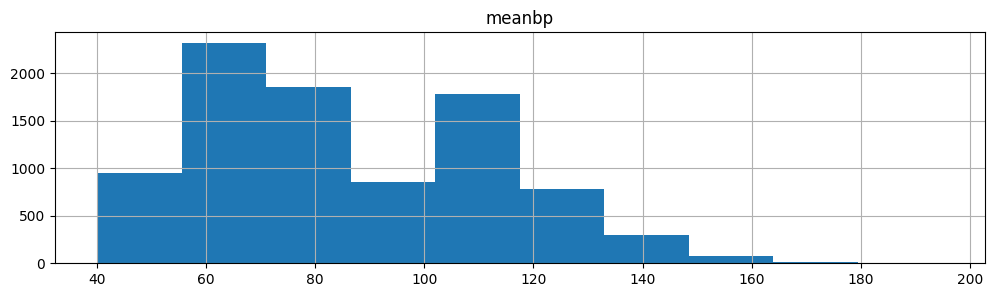

In [ ]:
df.hist(['meanbp'], figsize=(12,3))

<Axes: >

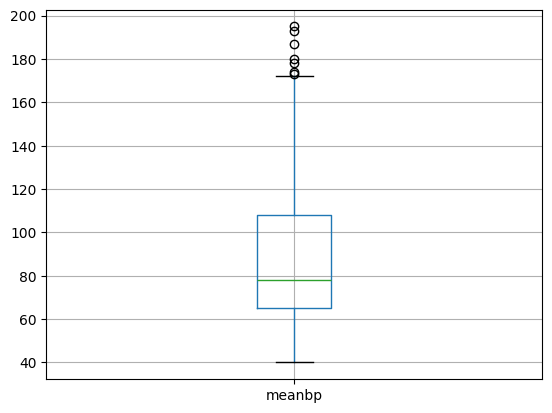

In [ ]:
df.boxplot(['meanbp'])

## **6.2 Replacing outliers for 'hrt'**

- Normal Range: 60 - 100 bpm
- Abnormal Range: 30 - 200 bpm
- Clinically Implausible Range: < 20 bpm or > 250 bpm

In [ ]:
# Count the number of outliers (< 20 or > 250)
outliers = ((df['hrt'] < 20) | (df['hrt'] > 250)).sum()
print(outliers)

25


In [ ]:
# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(percent_outliers)

0.28020623178659493


Heart rate (hrt) values below 20 or above 250 bpm were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.28% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.


In [ ]:
# Remove these outlier rows
df = df[df['hrt'].between(20, 250, inclusive='both') | df['hrt'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

array([[<Axes: title={'center': 'hrt'}>]], dtype=object)

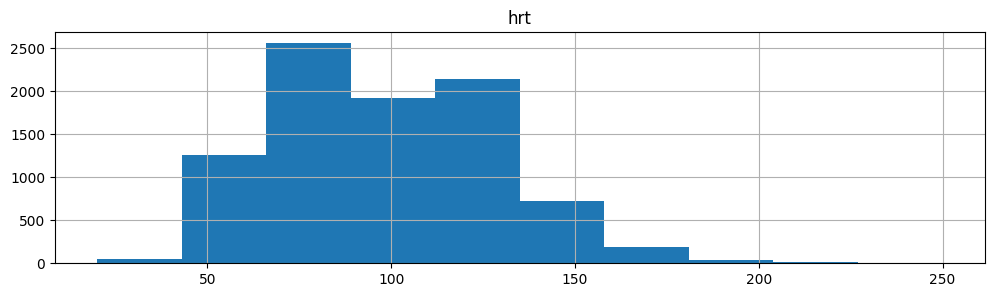

In [ ]:
df.hist(['hrt'], figsize=(12,3))

<Axes: >

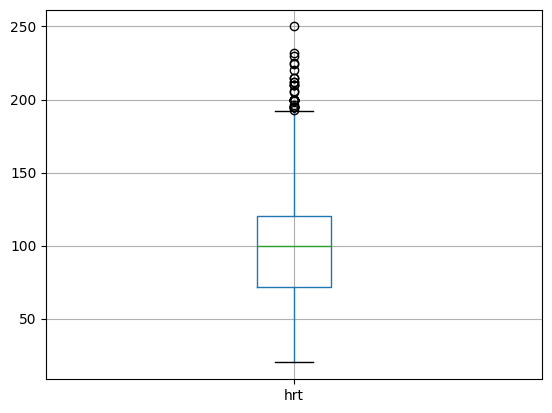

In [ ]:
df.boxplot(['hrt'])

## **6.3 Replacing outliers for 'pafi'**

- Normal Range: > 400 mmHg
- Abnormal Range: > 100 – 400 mmHg
- Clinically Implausible Range: < 40 mmHg or > 600 mmHg

In [ ]:
# Count the number of outliers (< 40 or > 600)
outliers = ((df['pafi'] < 40) | (df['pafi'] > 600)).sum()
print(outliers)

37


In [ ]:
# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(percent_outliers)

0.4158705181521861


pafi values below 40 or above 600 mmHg were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.42% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['pafi'].between(40, 600, inclusive='both') | df['pafi'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

array([[<Axes: title={'center': 'pafi'}>]], dtype=object)

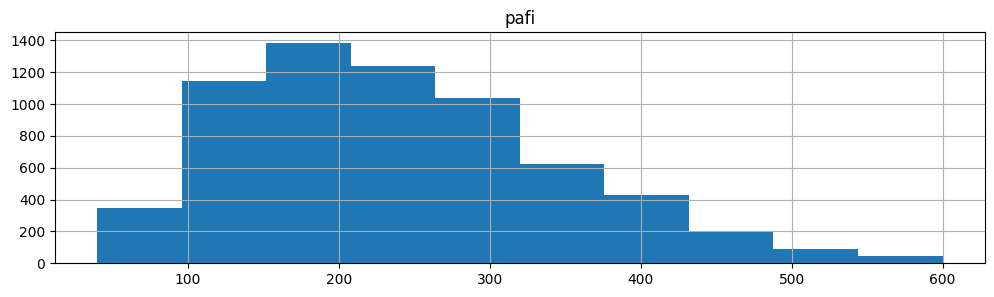

In [ ]:
df.hist(['pafi'], figsize=(12,3))

<Axes: >

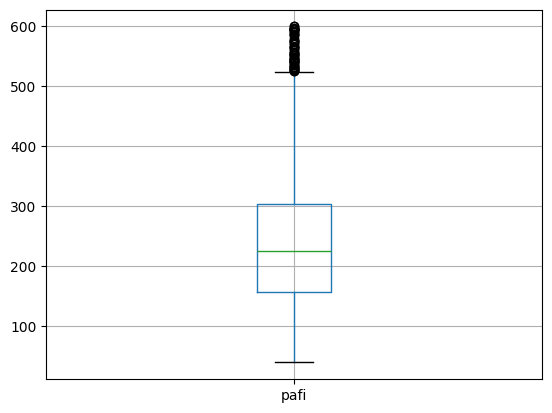

In [ ]:
df.boxplot(['pafi'])

## **6.4 Replacing outliers for 'alb'**

- Normal Range: 3.5 – 5 g/dL
- Abnormal Range: > 5 g/dL
- Clinically Implausible Range: > 6 g/dL


In [ ]:
# Count the number of outliers (> 6)
outliers = ((df['alb'] > 6)).sum()
print(outliers)

4


In [ ]:
# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(percent_outliers)

0.04514672686230248


alb values above 6 g/dL were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.045% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Replacing outliers with Med value
df = df[(df['alb'] <= 6) | (df['alb'].isna())]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.


array([[<Axes: title={'center': 'alb'}>]], dtype=object)

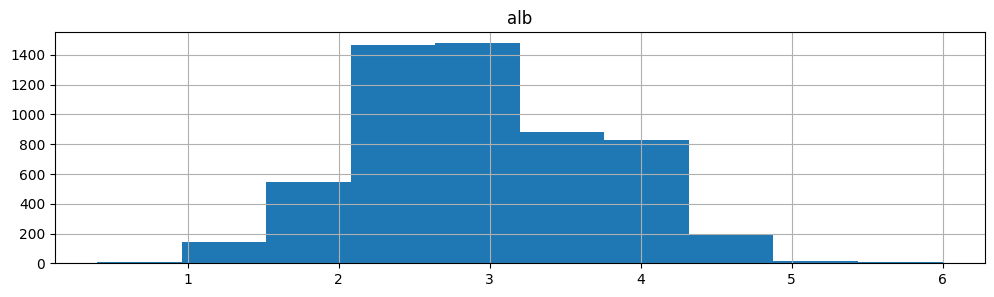

In [ ]:
df.hist(['alb'], figsize=(12,3))

<Axes: >

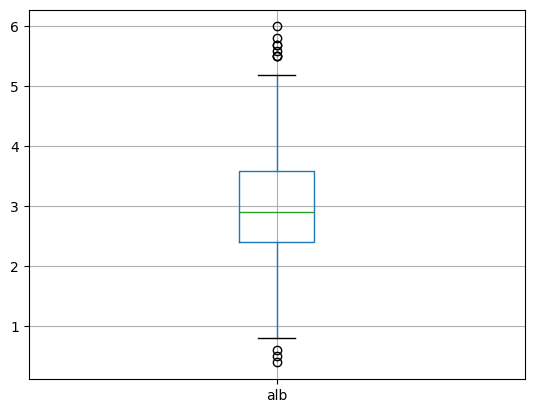

In [ ]:
df.boxplot(['alb'])

## **6.5 Replacing outliers for 'bili'**

- Normal Range: 0.3 – 1.2 mg/dL
- Abnormal Range: > 1.2 – 20 mg/dL
- Clinically Implausible Range: > 20 mg/dL

In [ ]:
# Count the number of outliers (> 20)
outliers = ((df['bili'] > 20)).sum()
print(outliers)

148


In [ ]:
# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(percent_outliers)

1.6711833785004515


bili values above 20 mg/dL were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 1.67% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[(df['bili'] <= 20) | (df['bili'].isna())]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

array([[<Axes: title={'center': 'bili'}>]], dtype=object)

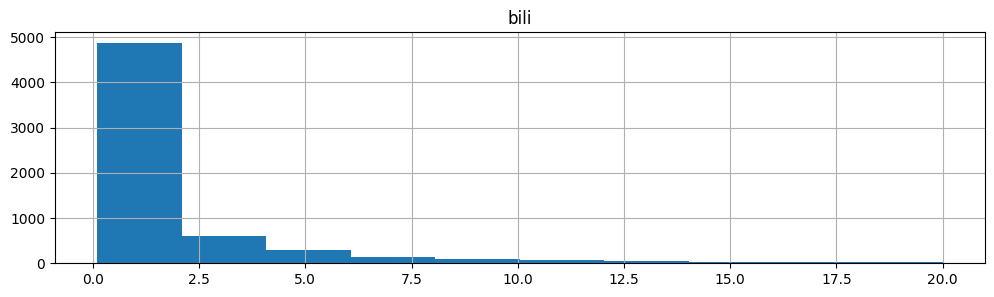

In [ ]:
df.hist(['bili'], figsize=(12,3))

<Axes: >

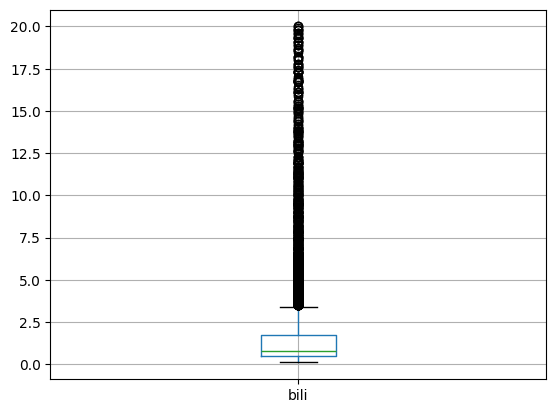

In [ ]:
df.boxplot(['bili'])

## **6.6 Replacing outliers for 'crea'**

- Normal Range: 0.6 – 1.3 mg/dL
- Abnormal Range: > 1.3 mg/dL
- Clinically Implausible Range: < 0.1 or > 15 mg/dL

In [ ]:
# Count the number of outliers (< 0.1 or > 15)
outliers = ((df['crea']<0.1) | (df['crea']>15)).sum()
print(outliers)

4


In [ ]:
# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(percent_outliers)

0.045934772622875514


crea values below 0.1 or above 15 mg/dL were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.045% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['crea'].between(0.1, 15, inclusive='both') | df['crea'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

array([[<Axes: title={'center': 'crea'}>]], dtype=object)

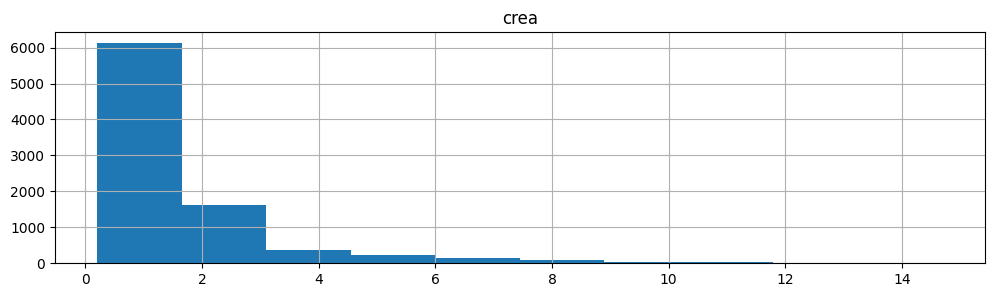

In [ ]:
df.hist(['crea'], figsize=(12,3))

<Axes: >

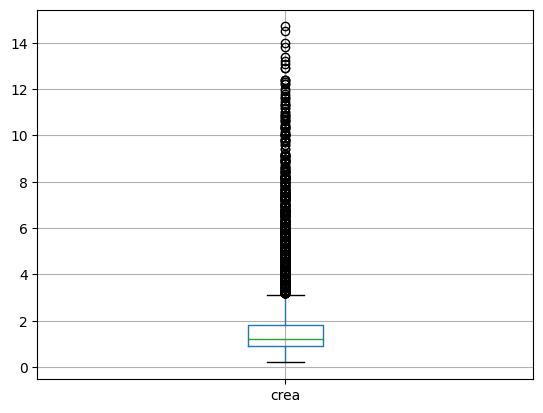

In [ ]:
df.boxplot(['crea'])

## **6.7 Replacing outliers for 'sod'**

- Normal Range: 135 - 145 mEq/L
- Abnormal Range: 100 – < 135 or >1 45 – 170 mEq/L
- Clinically Implausible Range: < 100 or > 170 mEq/L

In [ ]:
# Count the number of outliers (< 100 or > 170)
outliers = ((df['sod'] < 100) | (df['sod'] > 170)).sum()
print(outliers)

2


In [ ]:
# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(percent_outliers)

0.022977941176470586


sod values below 100 or above 170 mEq/L were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.02% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['sod'].between(100, 170, inclusive='both') | df['sod'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

array([[<Axes: title={'center': 'sod'}>]], dtype=object)

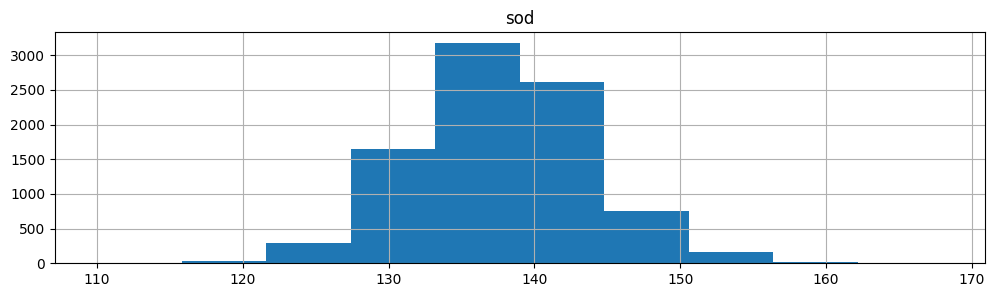

In [ ]:
df.hist(['sod'], figsize=(12,3))

<Axes: >

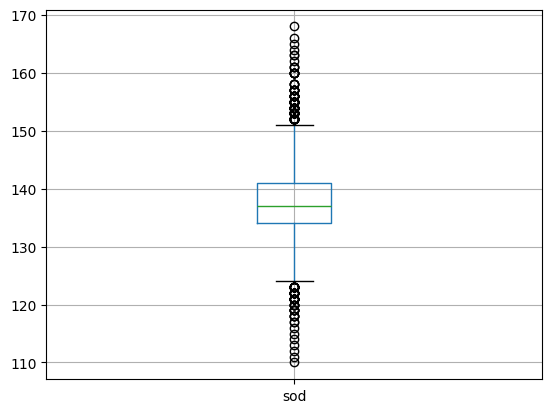

In [ ]:
df.boxplot(['sod'])

## **6.8 Replacing outliers for 'glucose'**

- Normal Range: 70 – 99 mg/dL
- Abnormal Range: < 70 mg/dL or 100 – 125 mg/dL or ≥ 126 mg/dL
- Clinically Implausible Range: < 40 or > 600 mg/dL

In [ ]:
# Count the number of outliers (< 40 or > 600)
outliers = ((df['glucose'] < 40) | (df['glucose'] > 6000)).sum()
print(outliers)

13


In [ ]:
# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(percent_outliers)

0.1493909446104344


glucose values below 40 or above 600 mg/dL were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.15% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['glucose'].between(40, 6000, inclusive='both') | df['glucose'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

array([[<Axes: title={'center': 'glucose'}>]], dtype=object)

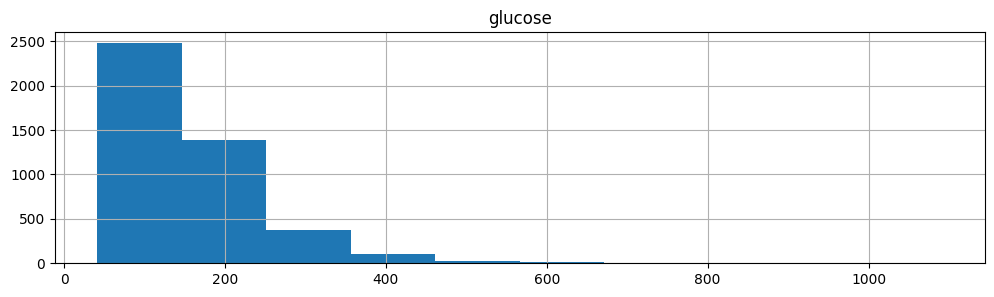

In [ ]:
df.hist(['glucose'], figsize=(12,3))

<Axes: >

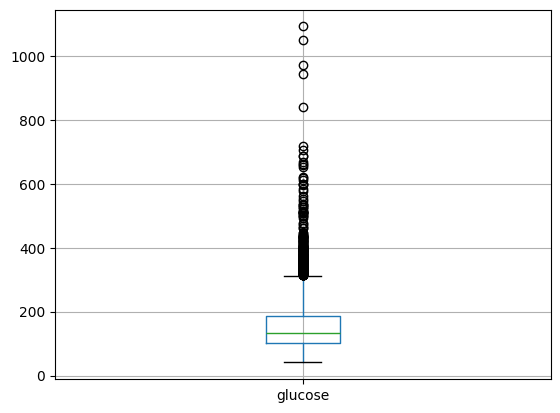

In [ ]:
df.boxplot(['glucose'])

## **6.9 Replacing outliers for 'bun'**

- Normal Range: 7 - 20 mg/dL
- Abnormal Range: 2 – < 7 or 20 - 150 mg/dL
- Clinically Implausible Range: < 2 or > 150 mg/dL

In [ ]:
# Count the number of outliers (< 2 and > 150)
outliers = ((df['bun'] < 2) | (df['bun'] > 150)).sum()
print(outliers)

11


In [ ]:
# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(percent_outliers)

0.12659684658763956


bun values below 2 or above 150 mg/dL were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.13% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['bun'].between(2, 150, inclusive='both') | df['bun'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

array([[<Axes: title={'center': 'bun'}>]], dtype=object)

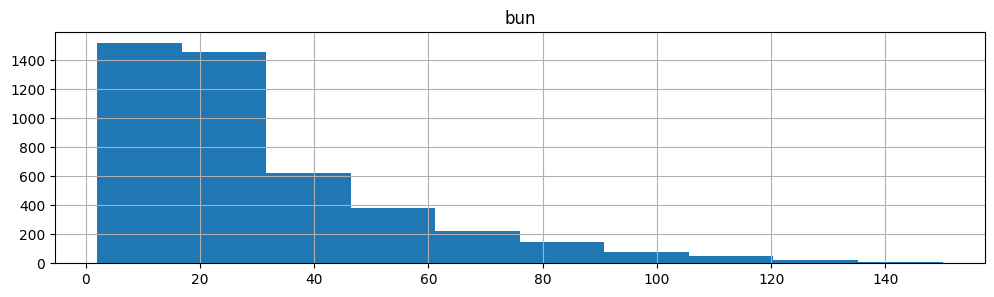

In [ ]:
df.hist(['bun'], figsize=(12,3))

<Axes: >

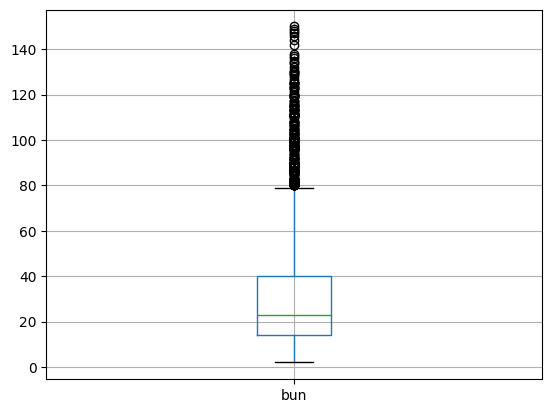

In [ ]:
df.boxplot(['bun'])

## **6.10 Replacing outliers for 'urine'**

- Normal Range: 800 – 2000 mL/day
- Abnormal Range: < 400 or > 2500 mL/day
- Clinically Implausible Range: < 50 or > 6000 mL/day

In [ ]:
# Count the number of outliers (< 50 or > 6000)
outliers = ((df['urine'] < 50) | (df['urine'] > 6000)).sum()
print(outliers)

186


In [ ]:
# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(percent_outliers)

2.1433510025351463


urine values below 50 or above 6000 mL/day were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 2% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['urine'].between(50, 6000, inclusive='both') | df['urine'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

array([[<Axes: title={'center': 'urine'}>]], dtype=object)

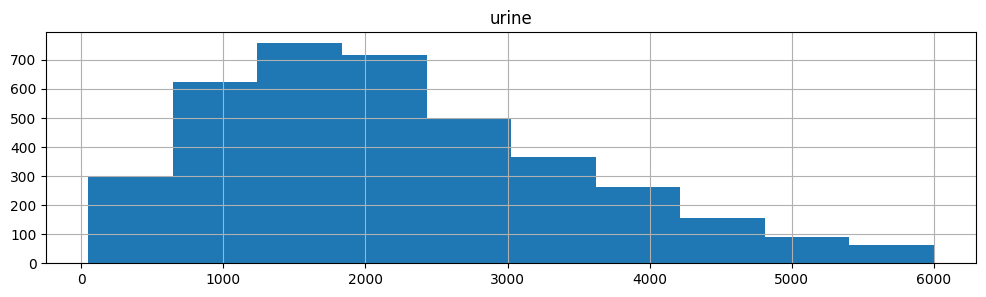

In [ ]:
df.hist(['urine'], figsize=(12,3))

<Axes: >

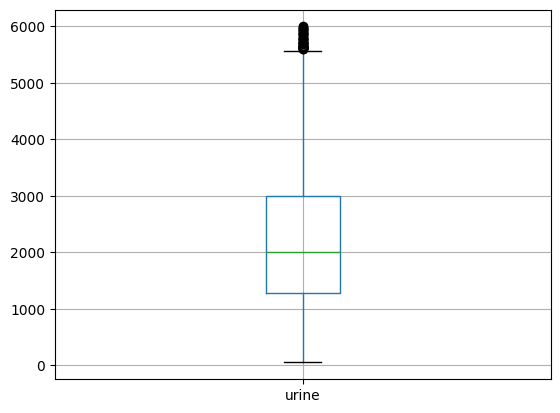

In [ ]:
df.boxplot(['urine'])

In [ ]:
# Rows remaining after outlier treatment
print(len(df))

8492


# **7. Missing values treatment**



In [ ]:
print(df)

        id       age  death     sex  hospdead  slos  d.time  \
0        1  62.84998      0    male         0     5    2029   
1        2  60.33899      1  female         1     4       4   
2        3  52.74698      1  female         0    17      47   
3        4  42.38498      1  female         0     3     133   
4        5  79.88495      0  female         0    16    2029   
...    ...       ...    ...     ...       ...   ...     ...   
9099  9100  68.61597      0  female         0     4     353   
9100  9101  66.07300      0    male         0    23     350   
9102  9103  70.38196      0    male         0     8     346   
9103  9104  47.01999      1    male         1     7       7   
9104  9105  81.53894      1  female         0    12     198   

                dzgroup             dzclass  num.co  ...      crea    sod  \
0           Lung Cancer              Cancer       0  ...  1.199951  141.0   
1             Cirrhosis  COPD/CHF/Cirrhosis       2  ...  5.500000  132.0   
2           

In [ ]:
# Finding how many missing values are there for each column
df.isnull().sum()

id             0
age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu         1500
income      2785
scoma          1
charges      146
totcst       817
totmcst     3274
avtisst       78
race          39
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1512
prg6m       1497
dnr           26
dnrday        26
meanbp         1
wblc         205
hrt            1
resp           1
temp           1
pafi        2247
alb         3167
bili        2479
crea          66
sod            1
ph          2207
glucose     4290
bun         4163
urine       4661
adlp        5195
adls        2645
sfdm2       1336
adlsc          0
dtype: int64

From the missing values above, we can see that several features have only a single missing value. However, upon examining the data, it is evident that patient IDs 5394 and 5441 are rows with a large number of missing values. Filling in these values could lead to data distortion or cause the data to inaccurately reflect reality. Therefore, these two rows will be removed.

In [ ]:
# Remove patient id 5394 and 5441
df = df[(df['id'] != 5394) & (df['id'] != 5441)]
df.isnull().sum()

id             0
age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu         1500
income      2784
scoma          0
charges      145
totcst       815
totmcst     3272
avtisst       77
race          39
sps            0
aps            0
surv2m         0
surv6m         0
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1511
prg6m       1496
dnr           25
dnrday        25
meanbp         0
wblc         204
hrt            0
resp           0
temp           0
pafi        2245
alb         3165
bili        2477
crea          65
sod            0
ph          2205
glucose     4289
bun         4162
urine       4660
adlp        5193
adls        2645
sfdm2       1336
adlsc          0
dtype: int64

**Columns removed due to missing values greater than 30%:** income, totmcst, alb, glucose, bun, urine, adlp, adls

In [ ]:
# remove column with missing value greater than 30%
df = df.drop(columns=['income', 'totmcst', 'alb', 'glucose', 'bun', 'urine', 'adlp', 'adls'])

**Columns removed since basic data exploration**

In [ ]:
# remove 'id', 'edu', 'race'
df = df.drop(columns=['id', 'edu', 'race'])
print(len(df))

8490


## **7.1 Missing values treatment in Feature**

### **Treatment of Missing Values for Continuous Variables**

Choose imputation with 'Mean' if data is normally distributed

Feature with normal distribution : 'pafi', 'ph'

In [ ]:
# Calculate Mean and Replace that value in Missing values
df['pafi'] = df['pafi'].fillna(df['pafi'].mean())   # pafi
df['ph'] = df['ph'].fillna(df['ph'].mean())         # ph

Choose imputation with 'Median' if data is skewed or non-normal

Features that are not normally distributed : 'totcst', 'avtisst', 'prg2m', 'prg6m', 'dnrday', 'wblc', 'bili', 'crea', 'adlsc'

In [ ]:
# Calculate Median and Replace that value in Missing values
df['totcst'] = df['totcst'].fillna(df['totcst'].median())        # totcst
df['avtisst'] = df['avtisst'].fillna(df['avtisst'].median())     # avtisst
df['prg2m'] = df['prg2m'].fillna(df['prg2m'].median())           # prg2m
df['prg6m'] = df['prg6m'].fillna(df['prg6m'].median())           # prg6m
df['dnrday'] = df['dnrday'].fillna(df['dnrday'].median())        # dnrday
df['wblc'] = df['wblc'].fillna(df['wblc'].median())              # wblc
df['bili'] = df['bili'].fillna(df['bili'].median())              # bili
df['crea'] = df['crea'].fillna(df['crea'].median())              # crea
df['adlsc'] = df['adlsc'].fillna(df['adlsc'].median())           # adlsc

### **Treatment of Missing Values for Categorical Variables**

Choose imputation with 'Mode' for categorical variables.

Categorical Feature : 'dnr', 'sfdm2'

In [ ]:
# Calculate Mode and Replace that value in Missing values
df['dnr'] = df['dnr'].fillna(df['dnr'].mode()[0])           # dnr
df['sfdm2'] = df['sfdm2'].fillna(df['sfdm2'].mode()[0])     # sfdm2

## **7.2 Missing values treatment in Target**

The missing values in the target variable will be removed, as imputing the target variable is generally not recommended unless the true values are known with high confidence. This is because the target variable directly influences how the learning algorithm learns. If the target values were already known, there would be no need to train a machine learning model. Therefore, the most appropriate approach to handle missing target values is to delete those records.

In [ ]:
# Remove Missing Value
df = df.dropna(subset=["charges"])

In [ ]:
# Recheck if there are any missing values left
df.isnull().sum()

age         0
death       0
sex         0
hospdead    0
slos        0
d.time      0
dzgroup     0
dzclass     0
num.co      0
scoma       0
charges     0
totcst      0
avtisst     0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
bili        0
crea        0
sod         0
ph          0
sfdm2       0
adlsc       0
dtype: int64

In [ ]:
# Check the number of row
print(len(df))

8345


# **8. Feature selection by Visual correlation analysis and Statistical measurement**



## **8.1 Split data for Train (80%) & Test (20%)**

In [ ]:
# Split the data into training and testing set
y = df["charges"]
X = df.drop(columns=['charges'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6676, 36)
(6676,)
(1669, 36)
(1669,)


Check if train and test data have the same distribution.

<Axes: >

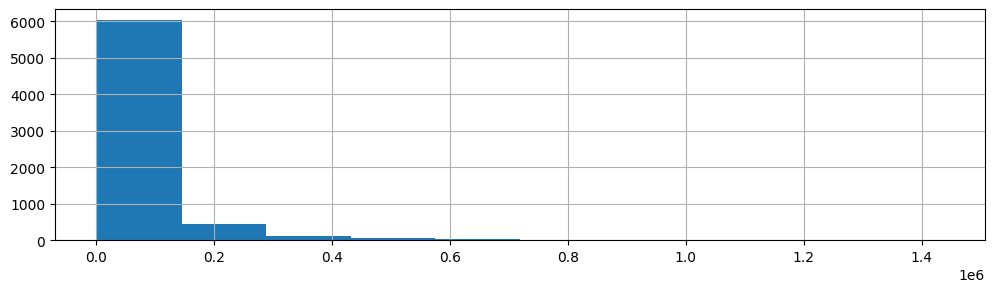

In [ ]:
y_train.hist(figsize=(12,3))

<Axes: >

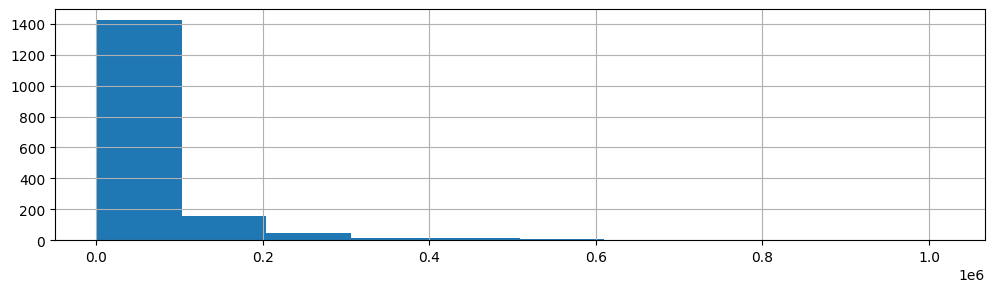

In [ ]:
y_test.hist(figsize=(12,3))

## **8.2 Relationship exploration: Continuous Vs Continuous -- Scatter Charts**





### **8.2.1 Visual exploration**

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


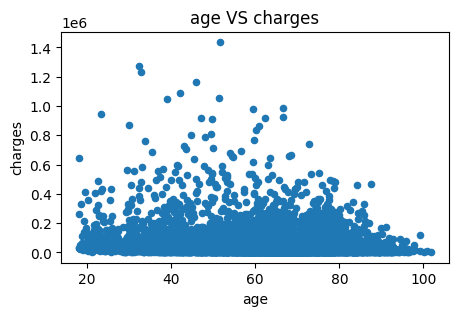

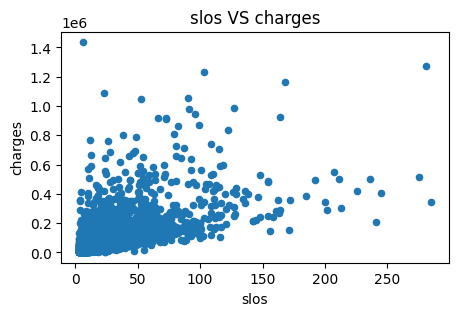

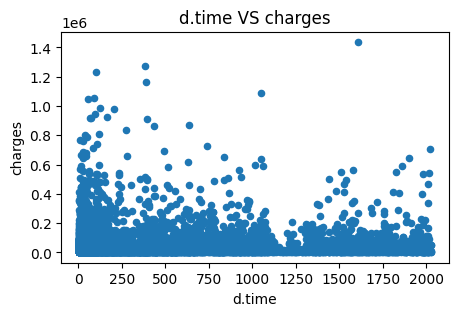

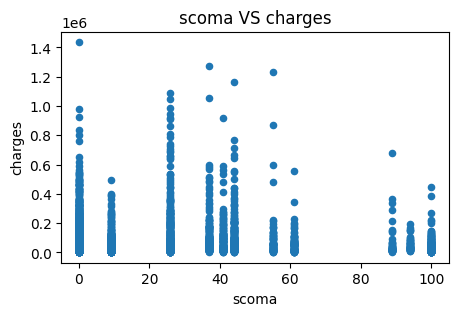

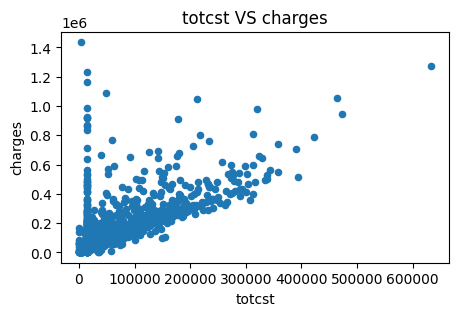

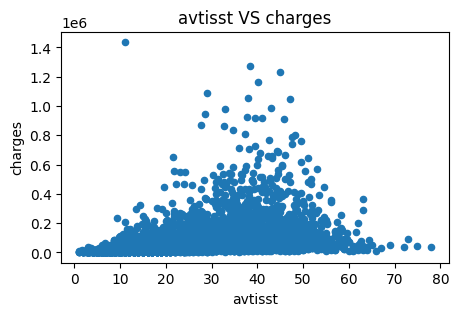

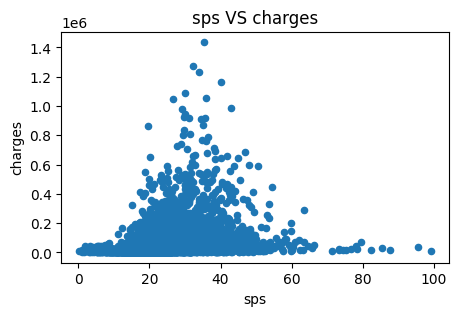

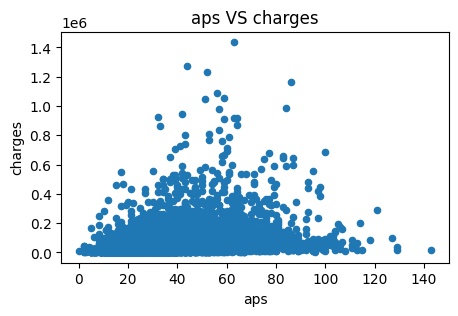

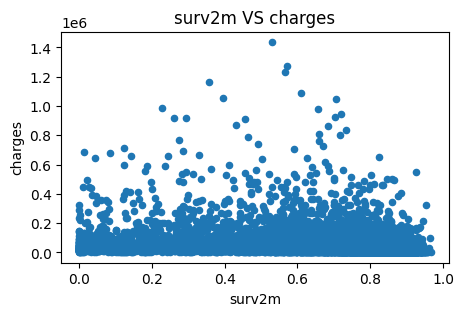

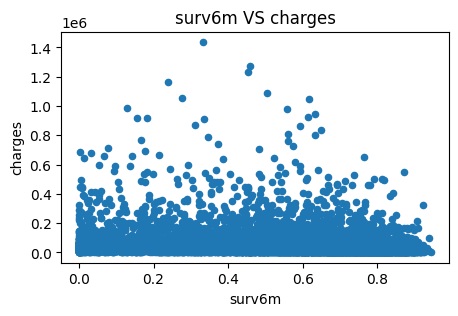

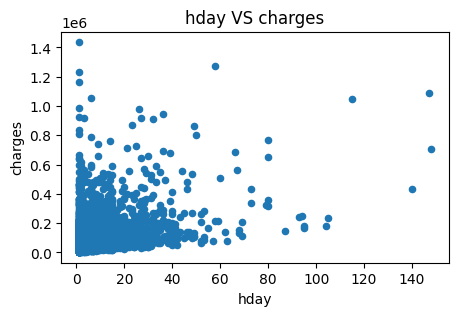

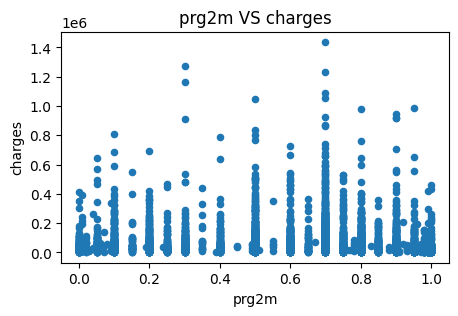

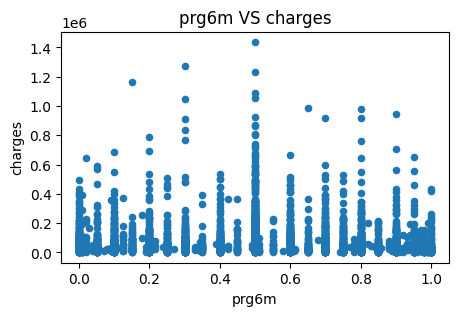

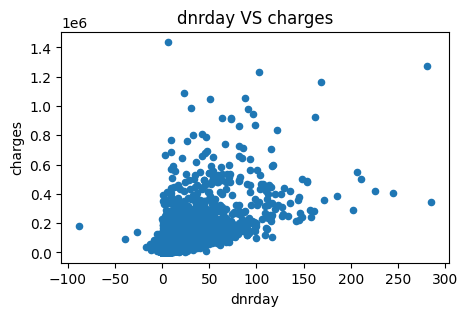

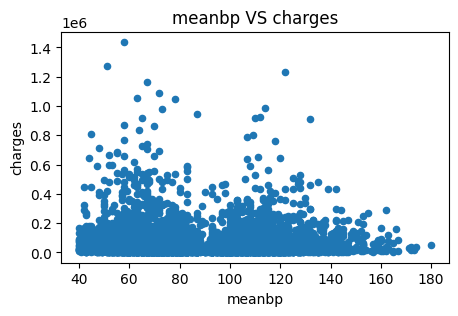

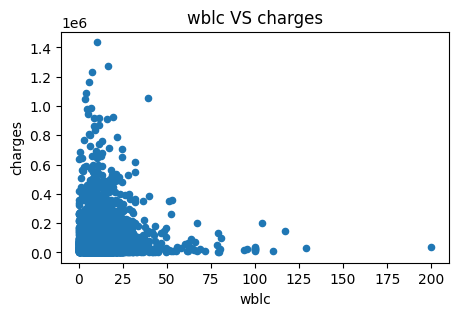

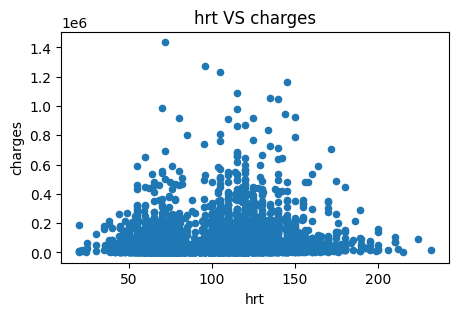

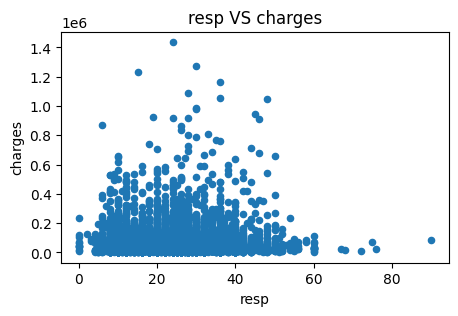

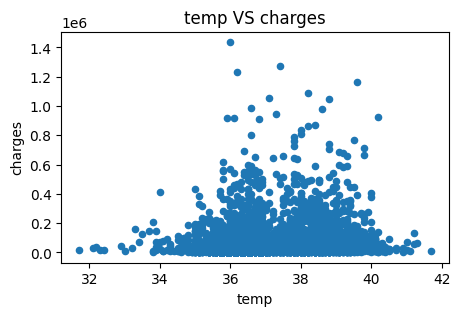

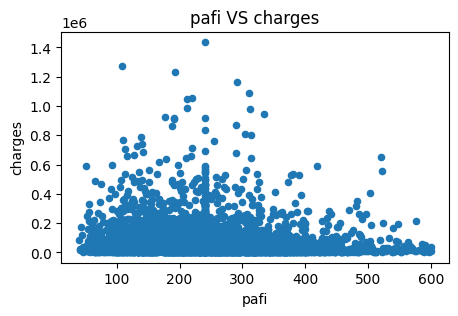

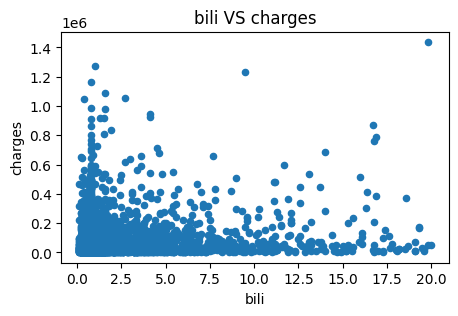

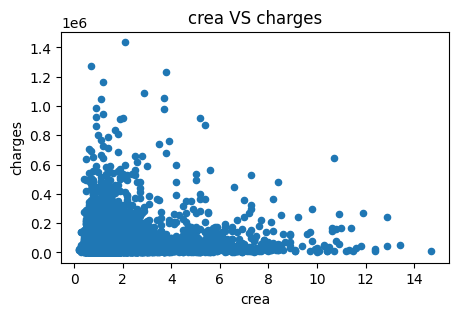

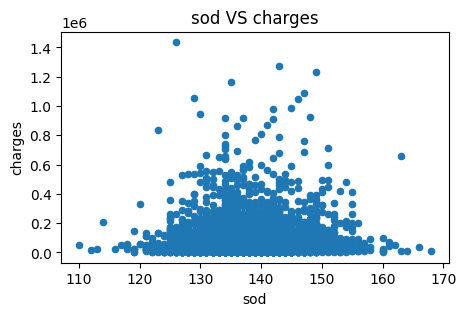

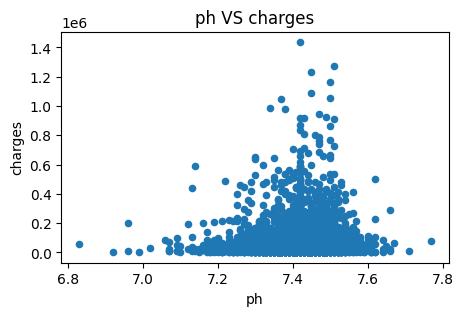

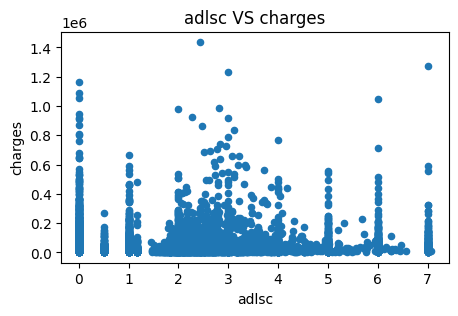

In [ ]:
ContinuousCols=['age', 'slos', 'd.time', 'scoma', 'totcst', 'avtisst', 'sps' , 'aps', 'surv2m',
                'surv6m', 'hday', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp',
                'temp', 'pafi', 'bili', 'crea', 'sod', 'ph', 'adlsc']

data_train = pd.concat([X_train, y_train], axis=1)

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data_train.plot.scatter(x=predictor, y='charges', figsize=(5,3), title=predictor+" VS "+ 'charges')

####**Scatter charts interpretation**

**Interpretation**

**Selected Continuous Variables:**

* **age :** Unselected. No Trend.
* **slos :** Selected. Weakly increasing Trend. **(Doubt)**
* **d.time :** Unselected. No Trend.
* **scoma :** Selected. Weakly decreasing Trend. **(Doubt)**
* **totcst :** Selected. Strongly increasing Trend.
* **avtisst :** Selected. Weakly increasing Trend. **(Doubt)**
* **sps :** Selected. Weakly increasing Trend. **(Doubt)**
* **aps :** Selected. Weakly increasing Trend. **(Doubt)**
* **surv2m :** Unselected. No Trend.
* **surv6m :** Unselected. No Trend.
* **hday :** Selected. Weakly increasing Trend. **(Doubt)**
* **prg2m :** Selected. Weakly increasing Trend. **(Doubt)**
* **prg6m :** Selected. Weakly increasing Trend. **(Doubt)**
* **dnrday :** Selected. Weakly increasing Trend. **(Doubt)**
* **meanbp :** Unselected. No Trend.
* **wblc :** Selected. Weakly decreasing Trend. **(Doubt)**
* **hrt :** Unselected. No Trend.
* **resp :** Unselected. No Trend.
* **temp :** Selected. Weakly increasing Trend. **(Doubt)**
* **pafi :** Unselected. No Trend.
* **bili :** Selected. Weakly decreasing Trend. **(Doubt)**
* **crea :** Selected. Weakly decreasing Trend. **(Doubt)**
* **sod :** Unselected. No Trend.
* **ph :** Selected. Weakly increasing Trend. **(Doubt)**
* **adlsc :** Unselected. No Trend.

Measure the strength of relation using pearson's correlation value.

### **8.2.2 Statistical Feature Selection**

In [ ]:
# Calculating correlation matrix
data_train = pd.concat([X_train, y_train], axis=1)
ContinuousCols=['charges', 'age', 'slos', 'd.time', 'scoma', 'totcst', 'avtisst', 'sps' , 'aps', 'surv2m',
                'surv6m', 'hday', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp',
                'temp', 'pafi', 'bili', 'crea', 'sod', 'ph', 'adlsc']

# Creating the correlation matrix
CorrelationData=data_train[ContinuousCols].corr()
CorrelationData

charges       age      slos    d.time     scoma    totcst   avtisst  \
charges  1.000000 -0.165596  0.648040 -0.039854  0.137379  0.765933  0.458940   
age     -0.165596  1.000000 -0.085903 -0.134226  0.020369 -0.140192 -0.125544   
slos     0.648040 -0.085903  1.000000  0.074777  0.054733  0.710329  0.321148   
d.time  -0.039854 -0.134226  0.074777  1.000000 -0.190174 -0.010960 -0.214727   
scoma    0.137379  0.020369  0.054733 -0.190174  1.000000  0.123375  0.298623   
totcst   0.765933 -0.140192  0.710329 -0.010960  0.123375  1.000000  0.478836   
avtisst  0.458940 -0.125544  0.321148 -0.214727  0.298623  0.478836  1.000000   
sps      0.283780 -0.108197  0.152657 -0.216139  0.214246  0.271728  0.563125   
aps      0.310351 -0.013075  0.170714 -0.202337  0.230399  0.289095  0.581879   
surv2m  -0.207833 -0.178983 -0.063578  0.384295 -0.580210 -0.197085 -0.469125   
surv6m  -0.157511 -0.215139 -0.026633  0.424655 -0.487441 -0.144067 -0.361088   
hday     0.469958 -0.064102  0.207926 -0.077191  0.117936  0.461416  0.289422   
prg2m   -0.096260 -0.075516 -0.029118  0.348486 -0.338973 -0.110346 -0.344353   
prg6m   -0.033537 -0.119057  0.026325  0.383910 -0.273542 -0.043958 -0.213436   
dnrday   0.628185 -0.162073  0.885263  0.138841  0.007715  0.666501  0.317022   
meanbp  -0.034519 -0.056478 -0.000236  0.032150  0.016995 -0.029009 -0.070454   
wblc     0.045646  0.006797  0.077008 -0.032055  0.067826  0.080003  0.090343   
hrt      0.142669 -0.148419  0.097258 -0.060939  0.065504  0.160771  0.210013   
resp     0.030428 -0.018947  0.000247 -0.003505  0.024776  0.020313  0.031320   
temp     0.140277 -0.090742  0.114841  0.013858  0.114307  0.149582  0.187269   
pafi    -0.084176  0.014017 -0.070500  0.039004  0.005570 -0.104994 -0.172854   
bili     0.170785 -0.124181  0.050399 -0.034492  0.069851  0.147875  0.136806   
crea     0.090504  0.004167  0.071359 -0.031725  0.048116  0.113086  0.116483   
sod      0.041197  0.023257  0.031925  0.005150  0.072104  0.036153  0.050888   
ph       0.040812 -0.031496  0.012981  0.001350  0.034954  0.041446 -0.016248   
adlsc    0.009964  0.117031  0.021927 -0.145506  0.133985  0.010900  0.035286   

              sps       aps    surv2m  ...      wblc       hrt      resp  \
charges  0.283780  0.310351 -0.207833  ...  0.045646  0.142669  0.030428   
age     -0.108197 -0.013075 -0.178983  ...  0.006797 -0.148419 -0.018947   
slos     0.152657  0.170714 -0.063578  ...  0.077008  0.097258  0.000247   
d.time  -0.216139 -0.202337  0.384295  ... -0.032055 -0.060939 -0.003505   
scoma    0.214246  0.230399 -0.580210  ...  0.067826  0.065504  0.024776   
totcst   0.271728  0.289095 -0.197085  ...  0.080003  0.160771  0.020313   
avtisst  0.563125  0.581879 -0.469125  ...  0.090343  0.210013  0.031320   
sps      1.000000  0.785850 -0.738654  ...  0.095488  0.228696  0.086036   
aps      0.785850  1.000000 -0.614351  ...  0.076847  0.206818  0.142583   
surv2m  -0.738654 -0.614351  1.000000  ... -0.089688 -0.173141 -0.067020   
surv6m  -0.668014 -0.515084  0.959019  ... -0.073225 -0.155308 -0.056572   
hday     0.212764  0.229344 -0.254311  ...  0.013682  0.108995  0.038930   
prg2m   -0.355002 -0.346416  0.495068  ... -0.056929 -0.112506 -0.044740   
prg6m   -0.260734 -0.240227  0.454131  ... -0.029852 -0.076489 -0.028944   
dnrday   0.134857  0.147963  0.004288  ...  0.067386  0.099417 -0.000312   
meanbp  -0.123280 -0.107700  0.092516  ... -0.000376  0.027995  0.041636   
wblc     0.095488  0.076847 -0.089688  ...  1.000000  0.138320  0.036379   
hrt      0.228696  0.206818 -0.173141  ...  0.138320  1.000000  0.196662   
resp     0.086036  0.142583 -0.067020  ...  0.036379  0.196662  1.000000   
temp     0.068187  0.088125 -0.082718  ...  0.108210  0.302401  0.096104   
pafi    -0.167564 -0.125698  0.131029  ... -0.092903 -0.151777 -0.067406   
bili     0.191910  0.208026 -0.139545  ...  0.033119  0.122999  0.013255   
crea     0.160241  0.228259 -0.112907  ...  0.088958  0.024952 -0.032179  

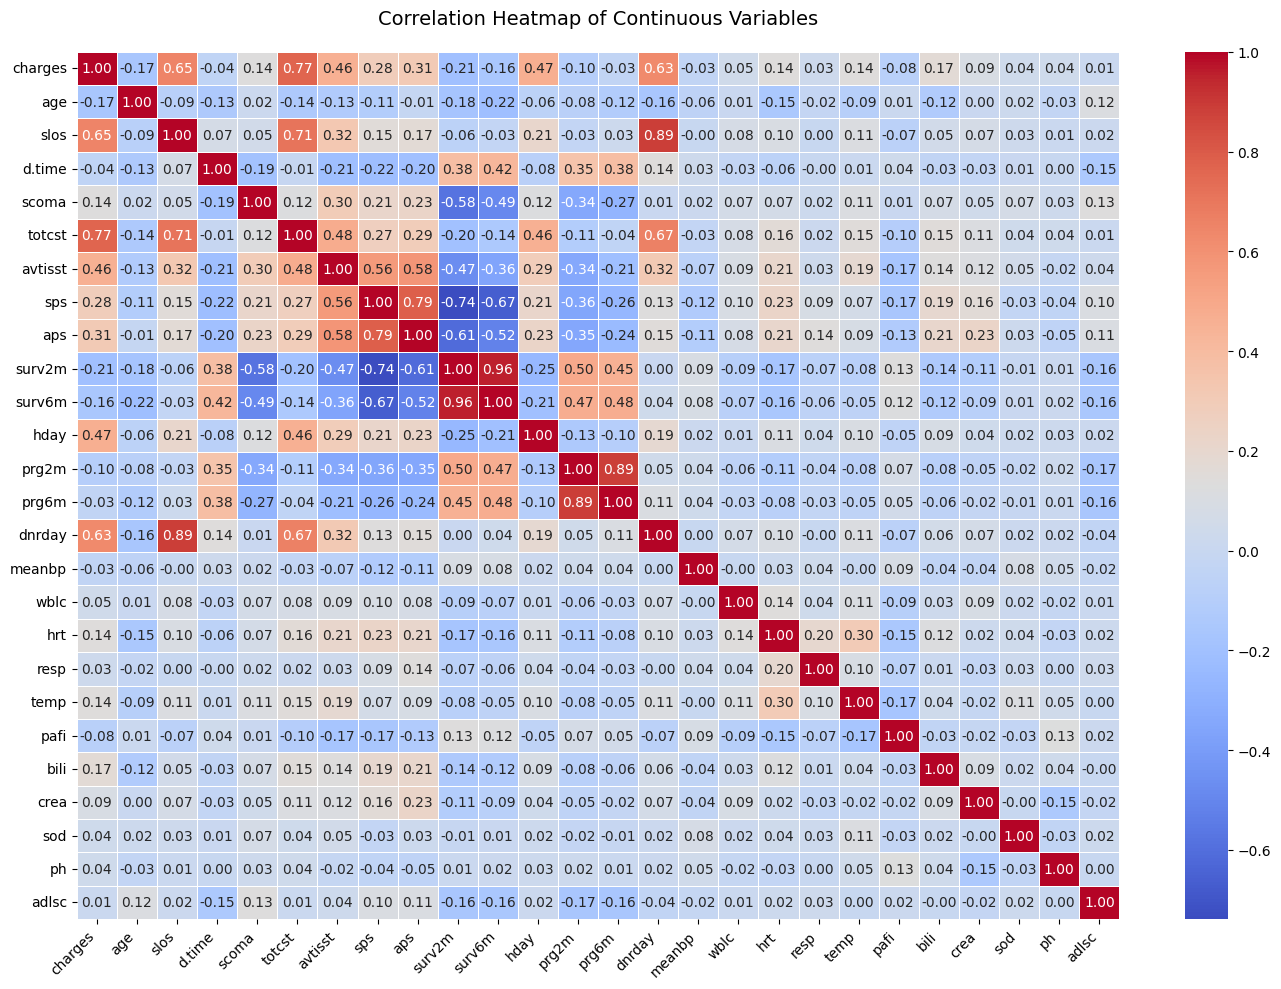

In [ ]:
import seaborn as sns

# สร้างกราฟ heatmap ของ correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(CorrelationData,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)

plt.title('Correlation Heatmap of Continuous Variables', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['charges'][abs(CorrelationData['charges']) > 0.5 ]

charges    1.000000
slos       0.648040
totcst     0.765933
dnrday     0.628185
Name: charges, dtype: float64

**Final selected Continuous columns from Visual exploration and Statistical Feature Selection:**

From the analysis of the correlation heatmap, it was found that the features ‘slos’, ‘totcst’, and ‘dnrday’ have a correlation with the target variable ‘charges’ greater than 0.5, indicating that they are potential features for model building. However, ‘slos’ and ‘dnrday’ are highly correlated with each other (corr = 0.89), which may cause multicollinearity issues. Therefore, only one of these variables, ‘slos’, is retained because it has a higher correlation with ‘charges’. To avoid redundancy in the data, the regression model will use only the features ‘slos’ and ‘totcst’.

## **8.3 Relationship exploration: Categorical Vs Continuous -- Box Plots**


### **8.3.1 Visual exploration**

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test.



<Figure size 600x400 with 0 Axes>

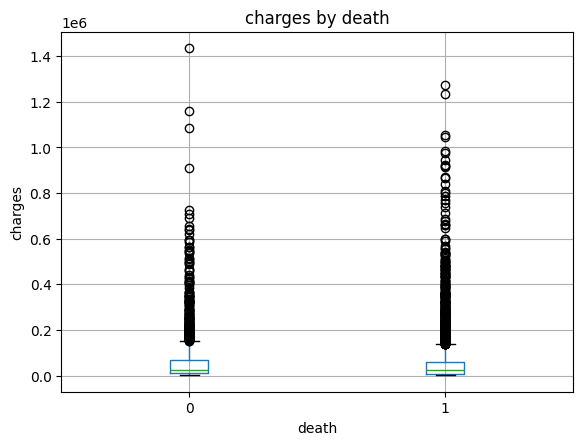

<Figure size 600x400 with 0 Axes>

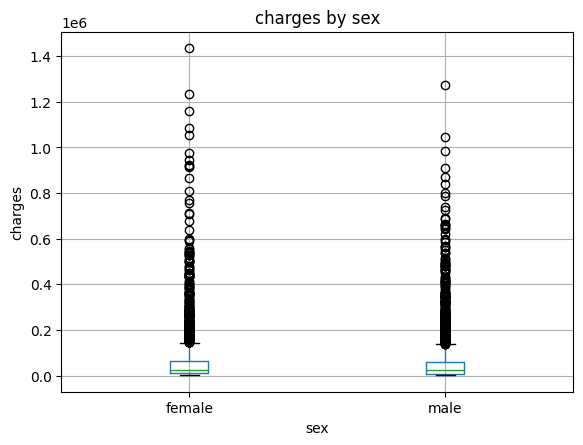

<Figure size 600x400 with 0 Axes>

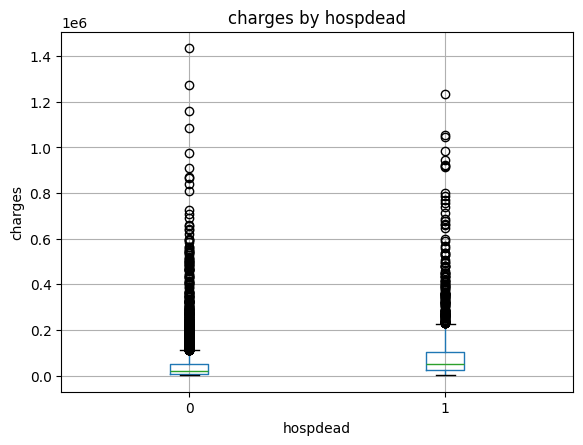

<Figure size 600x400 with 0 Axes>

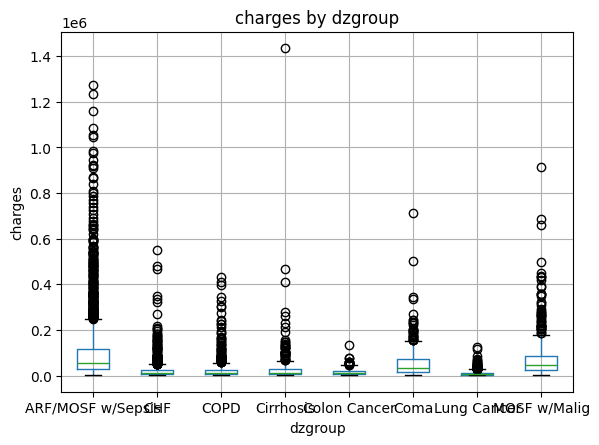

<Figure size 600x400 with 0 Axes>

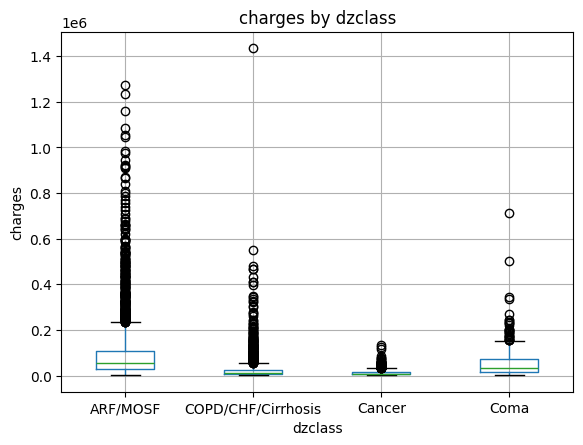

<Figure size 600x400 with 0 Axes>

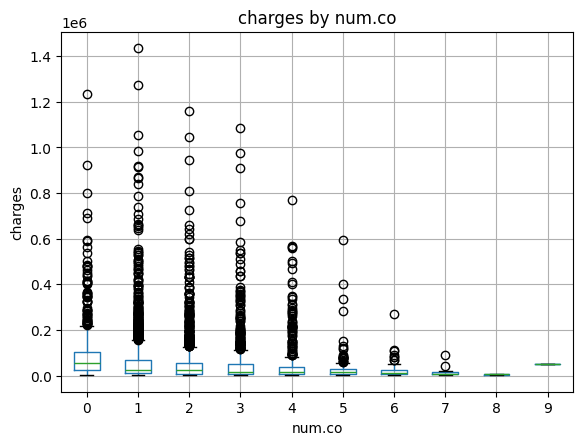

<Figure size 600x400 with 0 Axes>

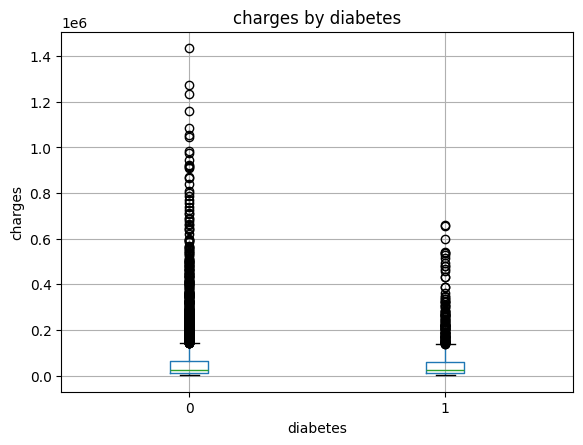

<Figure size 600x400 with 0 Axes>

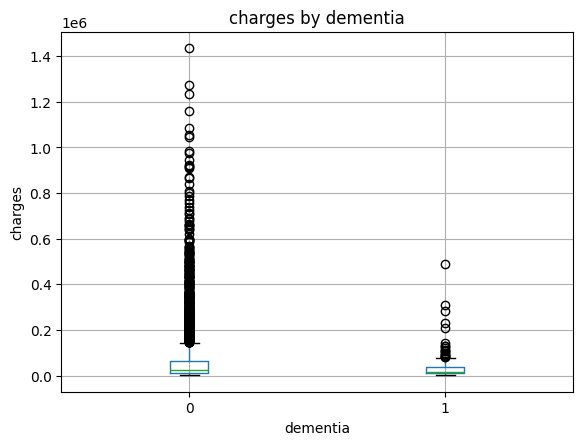

<Figure size 600x400 with 0 Axes>

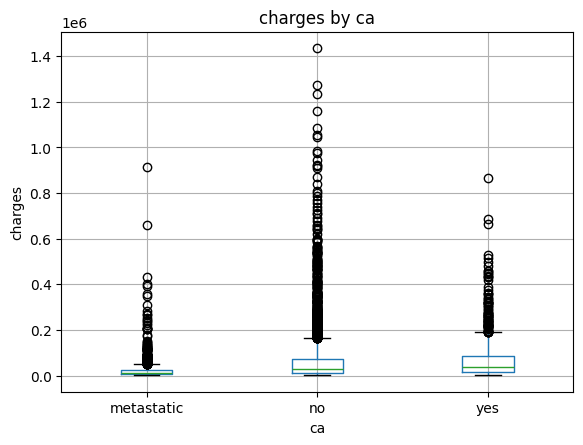

<Figure size 600x400 with 0 Axes>

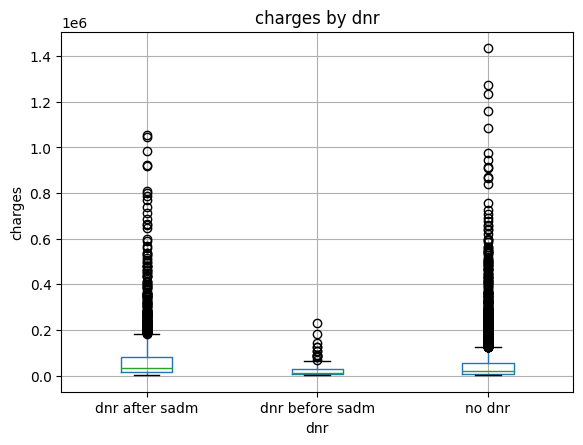

<Figure size 600x400 with 0 Axes>

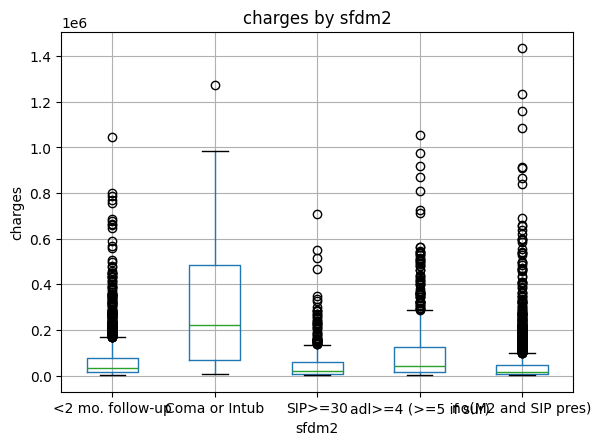

In [ ]:
# Box plots for continuous Target Variable "charges" and Categorical predictors
CategoricalColsList=['death', 'sex', 'hospdead','dzgroup', 'dzclass', 'num.co', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']

import matplotlib.pyplot as plt

for PredictorCol in CategoricalColsList:
    plt.figure(figsize=(6,4))
    data_train.boxplot(column='charges', by=PredictorCol, vert=True)
    plt.title(f'charges by {PredictorCol}')
    plt.suptitle('')
    plt.xlabel(PredictorCol)
    plt.ylabel("charges")
    plt.show()


#### **Box-Plots interpretation**

**Interpretation**

**Selected Categorical Variables:**

* **death :** Selected. The boxes are closly in the same line. **(Doubt)**
* **sex :** Selected. The boxes are closly in the same line. **(Doubt)**
* **hospdead :** Selected. The boxes are not in the same line.
* **dzgroup :** Selected. The boxes are not in the same line.
* **dzclass :** Selected. The boxes are not in the same line.
* **num.co :** Selected. The boxes are not in the same line.
* **diabetes :** Selected. The boxes are closly in the same line. **(Doubt)**
* **dementia :** Selected. The boxes are not in the same line.
* **ca :** Selected. The boxes are not in the same line.
* **dnr :** Selected. The boxes are not in the same line.
* **sfdm2 :** Selected. The boxes are not in the same line.


### **8.3.2 Statistical Feature Selection**

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* If the ANOVA P-Value is <0.05, that means we reject H0

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['death', 'sex', 'hospdead','dzgroup', 'dzclass', 'num.co', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']

FunctionAnova(inpData=data_train,
              TargetVariable='charges',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

death is NOT correlated with charges | P-Value: 0.3282126738572424
sex is NOT correlated with charges | P-Value: 0.1873433618487925
hospdead is correlated with charges | P-Value: 3.93833360014481e-57
dzgroup is correlated with charges | P-Value: 3.9177884492553734e-210
dzclass is correlated with charges | P-Value: 1.2854407033332067e-207
num.co is correlated with charges | P-Value: 5.54513803545154e-24
diabetes is correlated with charges | P-Value: 0.037941792487796305
dementia is correlated with charges | P-Value: 0.0003024045901394501
ca is correlated with charges | P-Value: 1.3010507241497794e-45
dnr is correlated with charges | P-Value: 5.223836058494744e-16
sfdm2 is correlated with charges | P-Value: 1.7360803655919153e-99


['hospdead',
 'dzgroup',
 'dzclass',
 'num.co',
 'diabetes',
 'dementia',
 'ca',
 'dnr',
 'sfdm2']

**Check multicollinearity between categorical features by using Chi-square**

In [ ]:
from scipy.stats import chi2_contingency
import itertools

# รายการ column ที่ต้องการตรวจสอบ
cols = ['hospdead','dzgroup', 'dzclass', 'num.co', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']

# สร้าง DataFrame เก็บผลลัพธ์
results = []

# วนเช็กทุกคู่ของตัวแปร
for col1, col2 in itertools.combinations(cols, 2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({
        'Feature_1': col1,
        'Feature_2': col2,
        'Chi2': chi2,
        'p_value': p
    })

# แปลงผลเป็น DataFrame
chi2_results = pd.DataFrame(results)

# เพิ่มคอลัมน์แปลผลเบื้องต้น
chi2_results['Relationship'] = chi2_results['p_value'].apply(
    lambda p: 'Significant (Possible multicollinearity)' if p < 0.05 else 'Not significant'
)

# แสดงเฉพาะคู่ที่มีนัยสำคัญ (p < 0.05)
chi2_results.sort_values('p_value').reset_index(drop=True)

Feature_1 Feature_2          Chi2        p_value  \
0   hospdead       dnr   2717.484268   0.000000e+00   
1   hospdead     sfdm2   4810.122088   0.000000e+00   
2    dzgroup    num.co   2875.923667   0.000000e+00   
3    dzgroup   dzclass  25035.000000   0.000000e+00   
4    dzgroup        ca   8138.051120   0.000000e+00   
5    dzclass    num.co   2441.782326   0.000000e+00   
6    dzclass        ca   6329.323095   0.000000e+00   
7        dnr     sfdm2   2940.846942   0.000000e+00   
8     num.co  diabetes   1283.088837  1.389378e-270   
9   hospdead   dzgroup   1214.731601  4.604921e-258   
10    num.co        ca   1164.513956  4.470978e-236   
11   dzgroup     sfdm2   1200.126555  5.340807e-235   
12  hospdead   dzclass   1074.332583  1.347587e-232   
13   dzclass     sfdm2    900.692837  4.077798e-185   
14   dzgroup       dnr    733.067940  2.242954e-147   
15   dzclass       dnr    478.000694  4.601182e-100   
16   dzgroup  diabetes    321.426328   1.597637e-65   
17  dementia       dnr    162.896247   4.241598e-36   
18    num.co  dementia    179.747509   5.720675e-34   
19  dementia     sfdm2    145.201676   2.171398e-30   
20  diabetes        ca    131.321733   3.046828e-29   
21  hospdead        ca    127.614909   1.944350e-28   
22   dzclass  diabetes    126.204778   3.555166e-27   
23        ca     sfdm2    134.324519   3.585627e-25   
24        ca       dnr    114.987080   6.280306e-24   
25   dzgroup  dementia    109.947427   9.415967e-21   
26   dzclass  dementia     75.585457   2.714073e-16   
27    num.co     sfdm2    144.074348   7.188271e-15   
28  dementia        ca     55.656396   8.210455e-13   
29  hospdead    num.co     60.889452   9.031831e-10   
30  diabetes     sfdm2     26.127435   2.982632e-05   
31    num.co       dnr     52.017275   3.718726e-05   
32  diabetes  dementia      9.265023   2.335715e-03   
33  hospdead  dementia      6.224364   1.260041e-02   
34  diabetes       dnr      3.433431   1.796552e-01   
35  hospdead  diabetes      0.981753   3.217665e-01   

                                Relationship  
0   Significant (Possible multicollinearity)  
1   Significant (Possible multicollinearity)  
2   Significant (Possible multicollinearity)  
3   Significant (Possible multicollinearity)  
4   Significant (Possible multicollinearity)  
5   Significant (Possible multicollinearity)  
6   Significant (Possible multicollinearity)  
7   Significant (Possible multicollinearity)  
8   Significant (Possible multicollinearity)  
9   Significant (Possible multicollinearity)  
10  Significant (Possible multicollinearity)  
11  Significant (Possible multicollinearity)  
12  Significant (Possible multicollinearity)  
13  Significant (Possible multicollinearity)  
14  Significant (Possible multicollinearity)  
15  Significant (Possible multicollinearity)  
16  Significant (Possible multicollinearity)  
17  Significant (Possible multicollinearity)  
18  Significant (Possible multicollinearity)  
19  Significant (Possible multicollinearity)  
20  Significant (Possible multicollinearity)  
21  Significant (Possible multicollinearity)  
22  Significant (Possible multicollinearity)  
23  Significant (Possible multicollinearity)  
24  Significant (Possible multicollinearity)  
25  Significant (Possible multicollinearity)  
26  Significant (Possible multicollinearity)  
27  Significant (Possible multicollinearity)  
28  Significant (Possible multicollinearity)  
29  Significant (Possible multicollinearity)  
30  Significant (Possible multicollinearity)  
31  Significant (Possible multicollinearity)  
32  Significant (Possible multicollinearity)  
33  Significant (Possible multicollinearity)  
34                           Not significant  
35                           Not significant

The results of the Chi-square test indicate that almost all pairs of categorical features have a p-value of 0.000, demonstrating statistically significant relationships. This suggests the potential presence of multicollinearity within the dataset. To mitigate this issue, feature selection was performed based on the logical relationships among the data, as follows:

- dzgroup and dzclass: Both represent disease groupings at different levels. Only dzclass was retained, as it provides more detailed information.
- dnr and hospdead: Patients with a DNR order are more likely to die. Therefore, only dnr was retained.
- num.co and diabetes, dementia, ca: These conditions are often included in the "number of comorbidities." Only num.co was retained.
- sfdm2 with dnr and dzclass: While sfdm2 may reflect disease severity and could correlate with dnr and dzclass, it carries unique clinical meaning and is therefore retained.

**Final selected Categorical columns from Visual exploration and Statistical Feature Selection:**

'dzclass', 'dnr', 'num.co', 'sfdm2'

# **9. Selecting final predictors for Machine Learning summary**

Based on the above tests, selecting the final columns for machine learning

In [ ]:
SelectedColumns=['dzclass', 'dnr', 'num.co', 'sfdm2', 'slos', 'totcst']

# Selecting final columns
DataForML=X_train[SelectedColumns]
DataForML.head()

dzclass             dnr  num.co                sfdm2  slos  \
1295            ARF/MOSF  dnr after sadm       0     <2 mo. follow-up     4   
212             ARF/MOSF          no dnr       3  no(M2 and SIP pres)     9   
3115  COPD/CHF/Cirrhosis  dnr after sadm       3  no(M2 and SIP pres)     9   
4185  COPD/CHF/Cirrhosis  dnr after sadm       3     <2 mo. follow-up    15   
5515  COPD/CHF/Cirrhosis  dnr after sadm       1  no(M2 and SIP pres)    30   

          totcst  
1295   8908.1250  
212   22028.3438  
3115   5471.4766  
4185  24318.8906  
5515  14074.9141

# **10. Data Pre-processing for Machine Learning**



## **10.1 Converting the ordinal variable to numeric**
In this dataset, there is only one ordinal categorical variable : 'num.co'. Since it is already stored as an integer, no additional transformation or encoding is required for this variable.

In [ ]:
print(DataForML[['num.co']].dtypes)
print(DataForML[['num.co']].head())

num.co    int64
dtype: object
      num.co
1295       0
212        3
3115       3
4185       3
5515       1


## **10.2 Converting the nominal variable to numeric using get_dummies()**
In this dataset, there are three nominal categorical variable : 'dzclass', 'dnr' and 'sfdm2'. These variables will be converted into one-hot encoded variables using the get_dummies() method.

In [ ]:
# รายชื่อคอลัมน์หมวดหมู่
cat_cols = ['dzclass', 'dnr', 'sfdm2']

# --- TRAIN ---
# one-hot เฉพาะคอลัมน์หมวดหมู่
dummies_train = pd.get_dummies(
    X_train[cat_cols],
    prefix=cat_cols,
    prefix_sep='__',
    drop_first=False,
    dtype='int8'
)

# ดรอปคอลัมน์หมวดหมู่จาก X_train แล้วค่อยต่อกับ dummies
X_train_encode = pd.concat(
    [DataForML.drop(columns=cat_cols).reset_index(drop=True),
     dummies_train.reset_index(drop=True)],
    axis=1
)

# --- TEST ---
dummies_test = pd.get_dummies(
    X_test[cat_cols],
    prefix=cat_cols,
    prefix_sep='__',
    drop_first=False,
    dtype='int8'
)

# จัดคอลัมน์ของ test ให้ตรงกับ train (ที่ขาดให้เติม 0)
dummies_test = dummies_test.reindex(columns=dummies_train.columns, fill_value=0)

X_test = X_test[SelectedColumns]

X_test_encode = pd.concat(
    [X_test.drop(columns=cat_cols).reset_index(drop=True),
     dummies_test.reset_index(drop=True)],
    axis=1
)

In [ ]:
X_test_encode.head()

num.co  slos      totcst  dzclass__ARF/MOSF  dzclass__COPD/CHF/Cirrhosis  \
0       1     7  29697.0312                  1                            0   
1       1     3  14074.9141                  0                            0   
2       1     6   3002.5547                  0                            0   
3       2     9   7164.4805                  0                            0   
4       1     7   4324.2930                  0                            0   

   dzclass__Cancer  dzclass__Coma  dnr__dnr after sadm  dnr__dnr before sadm  \
0                0              0                    1                     0   
1                1              0                    0                     0   
2                1              0                    0                     0   
3                1              0                    1                     0   
4                1              0                    0                     0   

   dnr__no dnr  sfdm2__<2 mo. follow-up  sfdm2__Coma or Intub  sfdm2__SIP>=30  \
0            0                        1                     0               0   
1            1                        0                     0               0   
2            1                        1                     0               0   
3            0                        1                     0               0   
4            1                        0                     0               0   

   sfdm2__adl>=4 (>=5 if sur)  sfdm2__no(M2 and SIP pres)  
0                           0                           0  
1                           0                           1  
2                           0                           0  
3                           0                           0  
4                           0                           1

In [ ]:
X_train_encode.head()

num.co  slos      totcst  dzclass__ARF/MOSF  dzclass__COPD/CHF/Cirrhosis  \
0       0     4   8908.1250                  1                            0   
1       3     9  22028.3438                  1                            0   
2       3     9   5471.4766                  0                            1   
3       3    15  24318.8906                  0                            1   
4       1    30  14074.9141                  0                            1   

   dzclass__Cancer  dzclass__Coma  dnr__dnr after sadm  dnr__dnr before sadm  \
0                0              0                    1                     0   
1                0              0                    0                     0   
2                0              0                    1                     0   
3                0              0                    1                     0   
4                0              0                    1                     0   

   dnr__no dnr  sfdm2__<2 mo. follow-up  sfdm2__Coma or Intub  sfdm2__SIP>=30  \
0            0                        1                     0               0   
1            1                        0                     0               0   
2            0                        0                     0               0   
3            0                        1                     0               0   
4            0                        0                     0               0   

   sfdm2__adl>=4 (>=5 if sur)  sfdm2__no(M2 and SIP pres)  
0                           0                           0  
1                           0                           1  
2                           0                           1  
3                           0                           0  
4                           0                           1

# **11. Model construction**



## **Linear Regression**

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable = 'charges'
Predictors = list(X_train_encode.columns)

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

LinearRegression()


In [ ]:
# Creating the model on Training Data
LREG=RegModel.fit(X_train_encode,y_train)

In [ ]:
LREG.coef_

array([ 1.91647701e+02,  9.98652638e+02,  1.36094123e+00,  1.24240267e+04,
       -3.60996340e+03, -5.24614152e+03, -3.56792179e+03,  5.91066642e+02,
       -4.69042892e+03,  4.09936228e+03, -1.05675905e+04,  8.02676985e+04,
       -2.66816540e+04, -2.43551990e+04, -1.86632550e+04])

In [ ]:
LREG.intercept_

np.float64(11545.362218937655)

In [ ]:
LREG.n_features_in_

15

In [ ]:
# Printing some sample values of prediction
print("Training result prediction of Model")
TrainingPrediction = LREG.predict(X_train_encode)
TrainingDataResults = pd.DataFrame(data=X_train_encode, columns=Predictors)
TrainingDataResults[TargetVariable] = y_train
TrainingDataResults[('Predicted'+TargetVariable)] = np.round(TrainingPrediction)

# Printing sample prediction values
print(TrainingDataResults.head())

Training result prediction of Model
   num.co  slos      totcst  dzclass__ARF/MOSF  dzclass__COPD/CHF/Cirrhosis  \
0       0     4   8908.1250                  1                            0   
1       3     9  22028.3438                  1                            0   
2       3     9   5471.4766                  0                            1   
3       3    15  24318.8906                  0                            1   
4       1    30  14074.9141                  0                            1   

   dzclass__Cancer  dzclass__Coma  dnr__dnr after sadm  dnr__dnr before sadm  \
0                0              0                    1                     0   
1                0              0                    0                     0   
2                0              0                    1                     0   
3                0              0                    1                     0   
4                0              0                    1                     0   

   dnr__

In [ ]:
# Printing some sample values of prediction
X_test_encode_aligned = X_test_encode.reindex(columns=Predictors, fill_value=0)

print("Testing result prediction of Model")
TestingPrediction = LREG.predict(X_test_encode)
TestingDataResults = pd.DataFrame(data=X_test_encode, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted'+TargetVariable)] = np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())

Testing result prediction of Model
   num.co  slos      totcst  dzclass__ARF/MOSF  dzclass__COPD/CHF/Cirrhosis  \
0       1     7  29697.0312                  1                            0   
1       1     3  14074.9141                  0                            0   
2       1     6   3002.5547                  0                            0   
3       2     9   7164.4805                  0                            0   
4       1     7   4324.2930                  0                            0   

   dzclass__Cancer  dzclass__Coma  dnr__dnr after sadm  dnr__dnr before sadm  \
0                0              0                    1                     0   
1                1              0                    0                     0   
2                1              0                    0                     0   
3                1              0                    1                     0   
4                1              0                    0                     0   

   dnr__n

In [ ]:
from sklearn import metrics
# Measuring Goodness of fit in Training data by R square
print('R2 Value of training set :',metrics.r2_score(y_train, LREG.predict(X_train_encode)))
print('R2 Value of testing set :',metrics.r2_score(y_test, LREG.predict(X_test_encode)))

R2 Value of training set : 0.6212599338981342
R2 Value of testing set : 0.5954318613531391


In [ ]:
# Measuring Goodness of fit in Training data by MAPE
TrainingDataResults['APE'] = 100 * ((abs(TrainingDataResults['charges']-TrainingDataResults['Predictedcharges']))/TrainingDataResults['charges'])
MAPE_training = np.mean(TrainingDataResults['APE'])
RMSE_training = np.sqrt(np.mean((TrainingDataResults['charges']-TrainingDataResults['Predictedcharges'])**2))
MAE_training = np.mean(abs(TrainingDataResults['charges']-TrainingDataResults['Predictedcharges']))

In [ ]:
print('MAPE on training data :', MAPE_training)
print('RMSE on training data :', RMSE_training)
print('MAE on training data :', MAE_training)
print('% difference between MAE and RMSE :',(RMSE_training-MAE_training)*100/MAE_training)
print('Accuracy on training data :', 100-MAPE_training)

MAPE on training data : 348.55874568591145
RMSE on training data : 135251.65145084437
MAE on training data : 75650.3382704935
% difference between MAE and RMSE : 78.78525667293364
Accuracy on training data : -248.55874568591145


In [ ]:
# Measuring Goodness of fit in Testing data by MAPE
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE_testing = np.mean(TestingDataResults['APE'])
RMSE_testing = np.sqrt(np.mean((TestingDataResults['charges']-TestingDataResults['Predictedcharges'])**2))
MAE_testing = np.mean(abs(TestingDataResults['charges']-TestingDataResults['Predictedcharges']))

In [ ]:
print('MAPE on test data:', MAPE_testing)
print('RMSE on test data:', RMSE_testing)
print('MAPE on test data:', MAPE_testing)
print('% difference between MAE and RMSE',(RMSE_testing-MAE_testing)*100/MAE_testing)
print('Accuracy on test data:', 100-MAPE_testing)

MAPE on test data: 195.54390238706063
RMSE on test data: 176710.6160100227
MAPE on test data: 195.54390238706063
% difference between MAE and RMSE 72.07168118892514
Accuracy on test data: -95.54390238706063


In [ ]:
#y = theta0 + theta1*x1 +theta2*x2+...+theta5*x5
print("Theta0: ",LREG.intercept_)
for i in range(len(Predictors)):
  print("Theta{} x {}: ".format(i+1,Predictors[i]),LREG.coef_[i])

Theta0:  11545.362218937655
Theta1 x num.co:  191.64770092978605
Theta2 x slos:  998.6526375250393
Theta3 x totcst:  1.3609412250943933
Theta4 x dzclass__ARF/MOSF:  12424.026705616607
Theta5 x dzclass__COPD/CHF/Cirrhosis:  -3609.9634027669235
Theta6 x dzclass__Cancer:  -5246.1415154839715
Theta7 x dzclass__Coma:  -3567.921787365702
Theta8 x dnr__dnr after sadm:  591.0666422995714
Theta9 x dnr__dnr before sadm:  -4690.42891876397
Theta10 x dnr__no dnr:  4099.362276464418
Theta11 x sfdm2__<2 mo. follow-up:  -10567.590548348458
Theta12 x sfdm2__Coma or Intub:  80267.6985309949
Theta13 x sfdm2__SIP>=30:  -26681.654022565606
Theta14 x sfdm2__adl>=4 (>=5 if sur):  -24355.19896624294
Theta15 x sfdm2__no(M2 and SIP pres):  -18663.25499383785


In [ ]:
TrainingDataResults[['Predictedcharges','charges']].sort_values(by="charges").reset_index(drop=True)

Predictedcharges   charges
0              25013.0  1314.449
1             201523.0  1661.000
2             103045.0  1672.449
3               9620.0  1680.000
4              58822.0  1705.000
...                ...       ...
6671            5188.0       NaN
6672           82639.0       NaN
6673           42542.0       NaN
6674           48845.0       NaN
6675           34050.0       NaN

[6676 rows x 2 columns]

In [ ]:
TrainingDataResults[['Predictedcharges','charges']]

Predictedcharges   charges
0              30111.0    9715.0
1              48948.0   34496.0
2               6872.0   41094.0
3              46610.0    3075.0
4              39170.0   50127.0
...                ...       ...
6671           70257.0    4510.0
6672           40330.0  133305.0
6673           34050.0       NaN
6674          108341.0   17560.0
6675           11025.0  281985.0

[6676 rows x 2 columns]

<Axes: title={'center': 'Actual vs Predected on training'}>

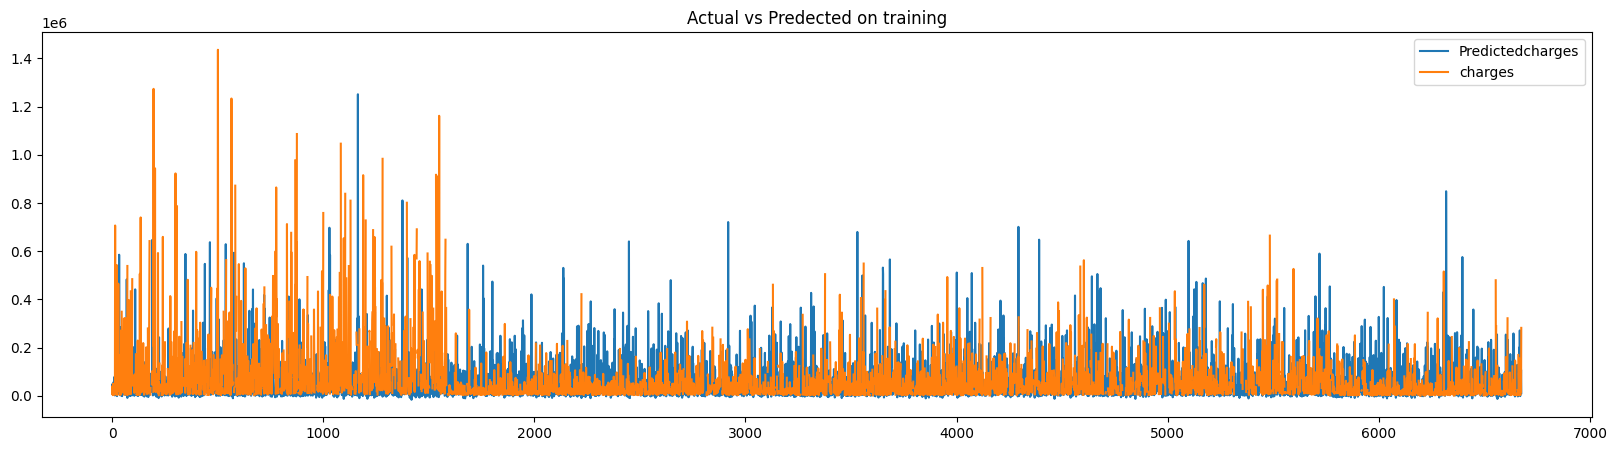

In [ ]:
(TrainingDataResults[['Predictedcharges','charges']]).plot(kind="line",figsize = (20,5),title="Actual vs Predected on training")

<Axes: title={'center': 'Actual vs Predected on training'}>

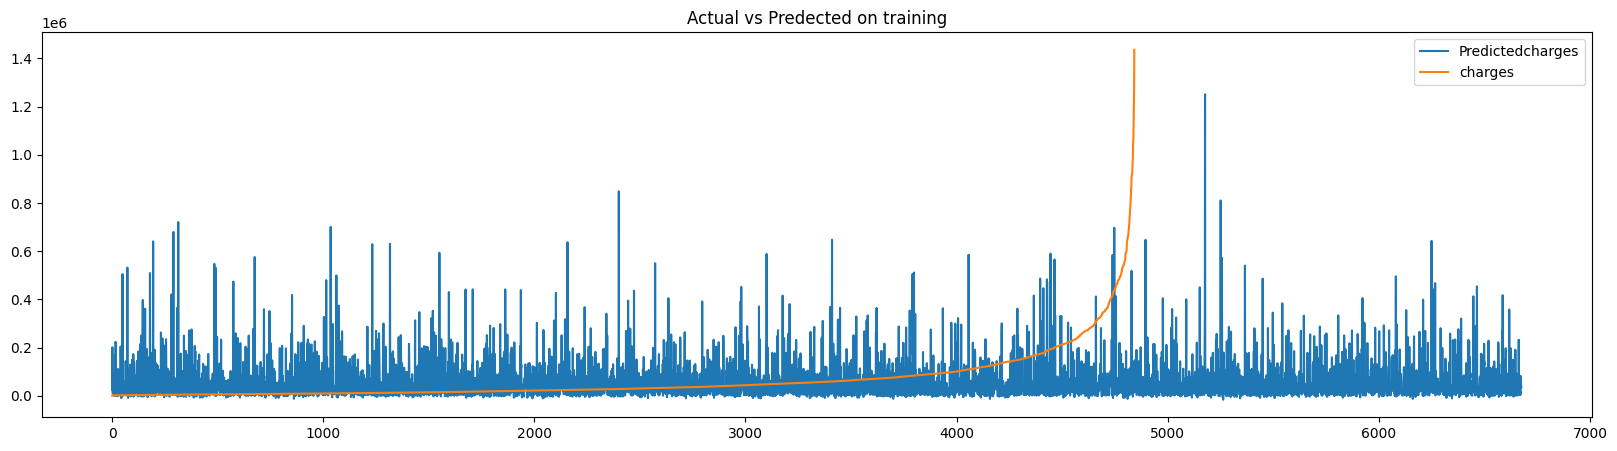

In [ ]:
(TrainingDataResults[['Predictedcharges','charges']].sort_values(by="charges").reset_index(drop=True)).plot(kind="line",figsize = (20,5),title="Actual vs Predected on training")

<Axes: title={'center': 'Residual test on training'}>

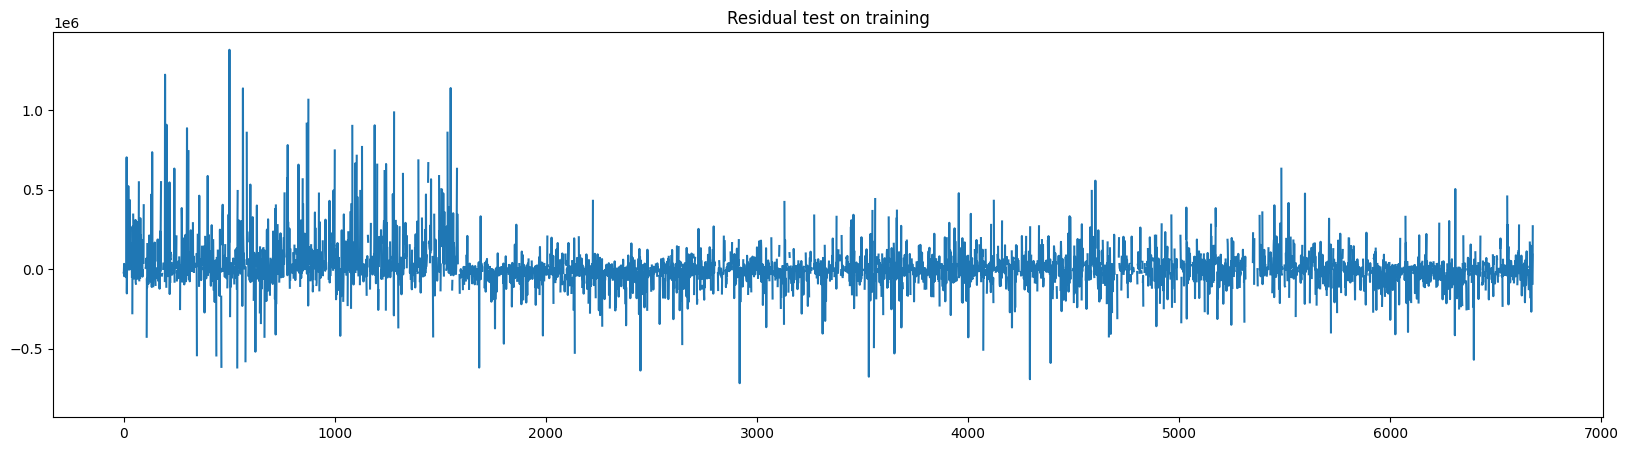

In [ ]:
(TrainingDataResults['charges']-TrainingDataResults['Predictedcharges']).plot(kind="line",figsize = (20,5),title="Residual test on training")

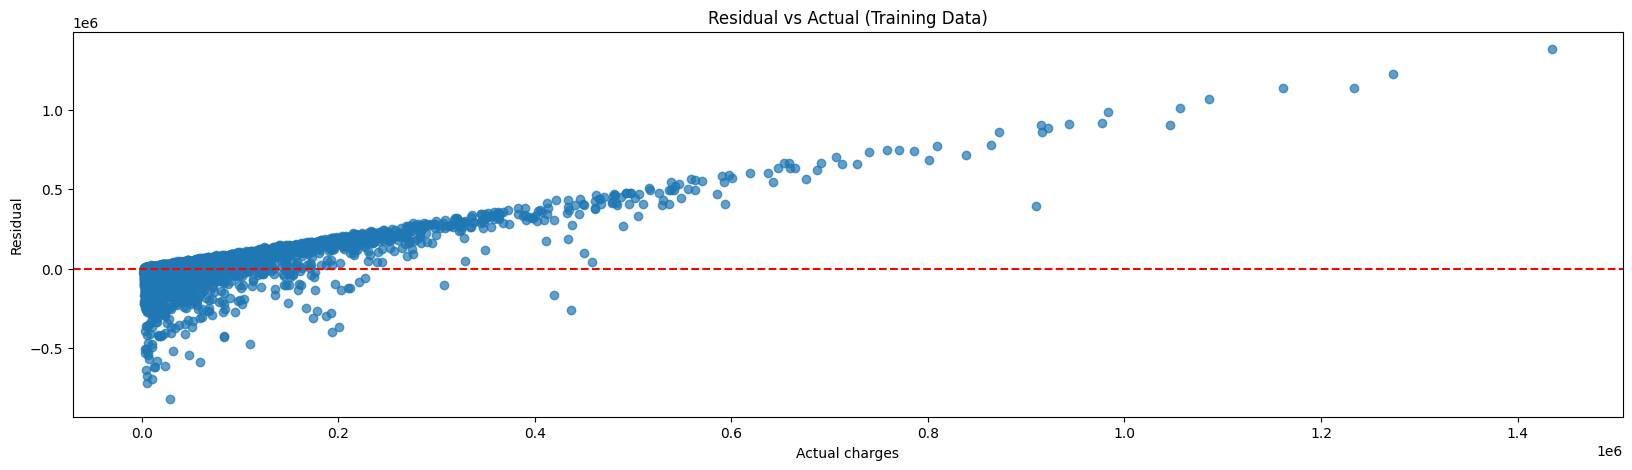

In [ ]:
import matplotlib.pyplot as plt

# คำนวณ residual
residual = TrainingDataResults['charges'] - TrainingDataResults['Predictedcharges']

# สร้าง scatter plot เพื่อแสดงความสัมพันธ์ระหว่าง residual กับค่าจริง
plt.figure(figsize=(20, 5))
plt.scatter(TrainingDataResults['charges'], residual, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # เส้นแกน y=0 เพื่อให้เห็น residual ที่ศูนย์
plt.title('Residual vs Actual (Training Data)')
plt.xlabel('Actual charges')
plt.ylabel('Residual')
plt.show()

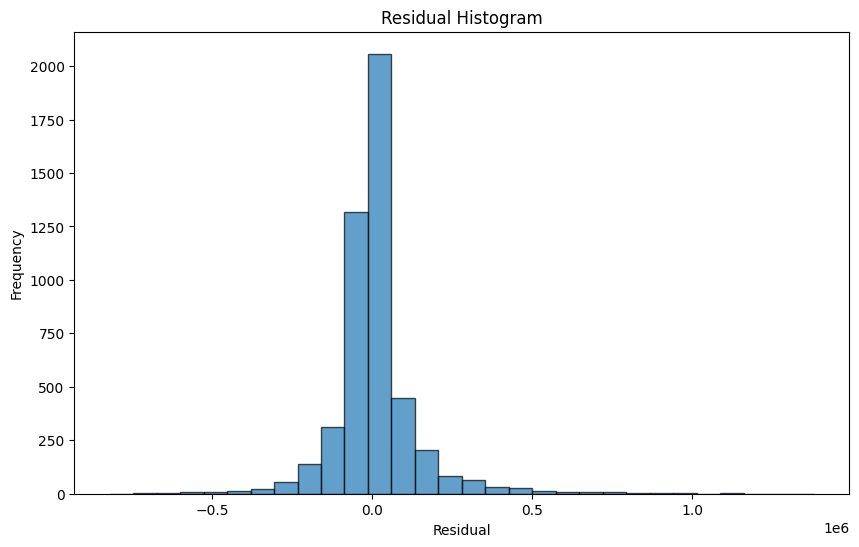

In [ ]:
# สร้าง histogram ของ residual
plt.figure(figsize=(10, 6))
plt.hist(residual, bins=30, edgecolor='black', alpha=0.7)
plt.title('Residual Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

{'n': 1669, 'nan': np.int64(0), 'min': -416293.91497217503, 'max': 860974.2210510842, 'unique': 1669}


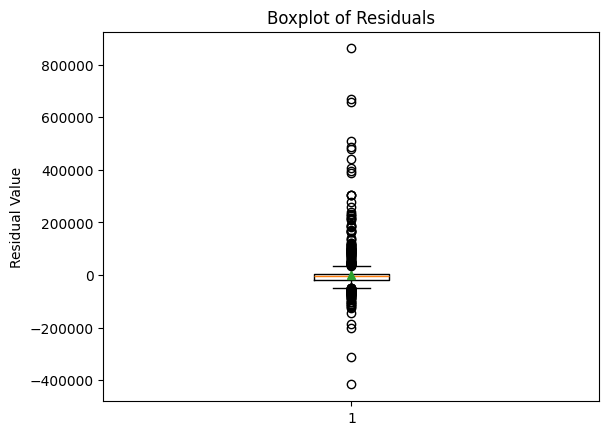

In [ ]:
# 1) พยากรณ์ (อย่าใช้ค่าที่ถูก round)
y_pred = LREG.predict(X_test_encode)

# 2) คำนวณ residual แบบจัด index ให้ตรงกันเสมอ
y_true = pd.Series(y_test).reset_index(drop=True).astype(float)
y_pred = pd.Series(y_pred).reset_index(drop=True).astype(float)
residual = (y_true - y_pred)

# 3) ทำความสะอาดและเช็กสภาพข้อมูล
residual = residual.replace([np.inf, -np.inf], np.nan).dropna()

print({
    "n": len(residual),
    "nan": residual.isna().sum(),
    "min": float(residual.min()) if len(residual) else None,
    "max": float(residual.max()) if len(residual) else None,
    "unique": int(residual.nunique()) if len(residual) else 0
})

# ถ้ามีข้อมูลน้อย/ค่าคงที่ กล่องจะไม่ขึ้น ให้เตือนและข้าม
if len(residual) < 2 or residual.nunique() < 2:
    print("Residual มีน้อยหรือทุกค่าคงที่ — boxplot จะไม่เห็นรูปทรง")
else:
    # 4) วาด boxplot
    plt.figure()
    plt.boxplot(residual.values, vert=True, showmeans=True)
    plt.title("Boxplot of Residuals")
    plt.ylabel("Residual Value")
    plt.show()

In [ ]:
residual.describe()

count      1669.000000
mean       -261.294716
std       58469.839127
min     -416293.914972
25%      -17408.329946
50%       -4667.084971
75%        3731.377756
max      860974.221051
dtype: float64

In [ ]:
print(residual.median())

-4667.08497065858


<Axes: title={'center': 'Actual vs Predicted on testing'}>

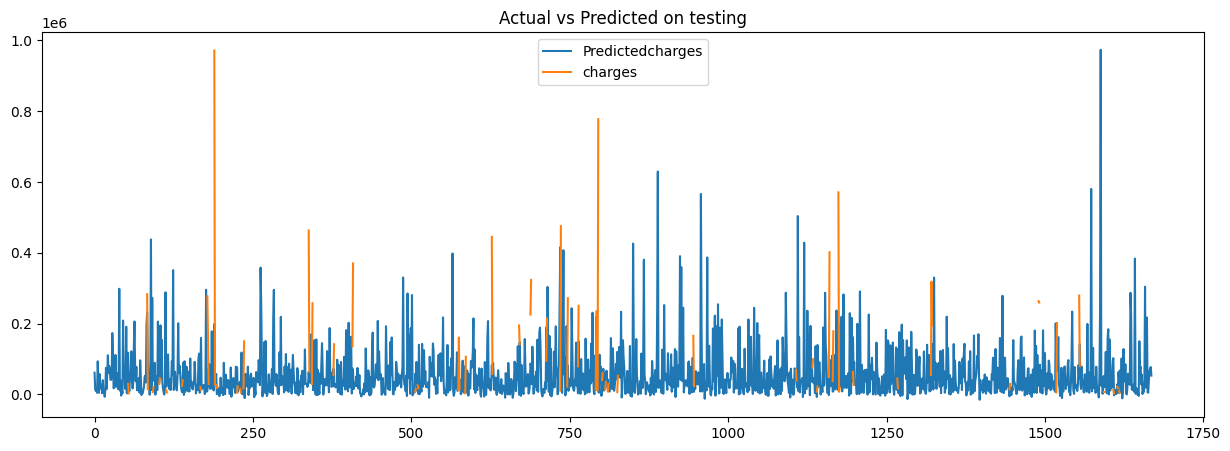

In [ ]:
TestingDataResults[['Predictedcharges','charges']].plot(kind="line",figsize = (15,5),title="Actual vs Predicted on testing")

<Axes: title={'center': 'Actual vs Predicted on training'}>

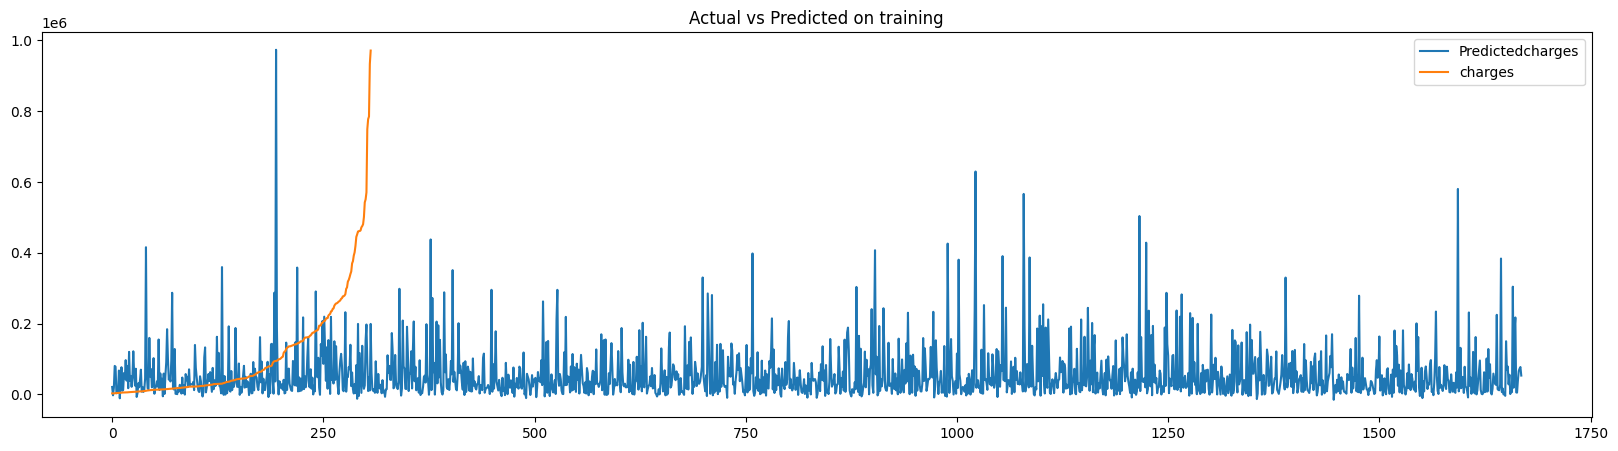

In [ ]:
(TestingDataResults[['Predictedcharges','charges']].sort_values(by="charges").reset_index(drop=True)).plot(kind="line",figsize = (20,5),title="Actual vs Predicted on training")

<Axes: title={'center': 'Residual test'}>

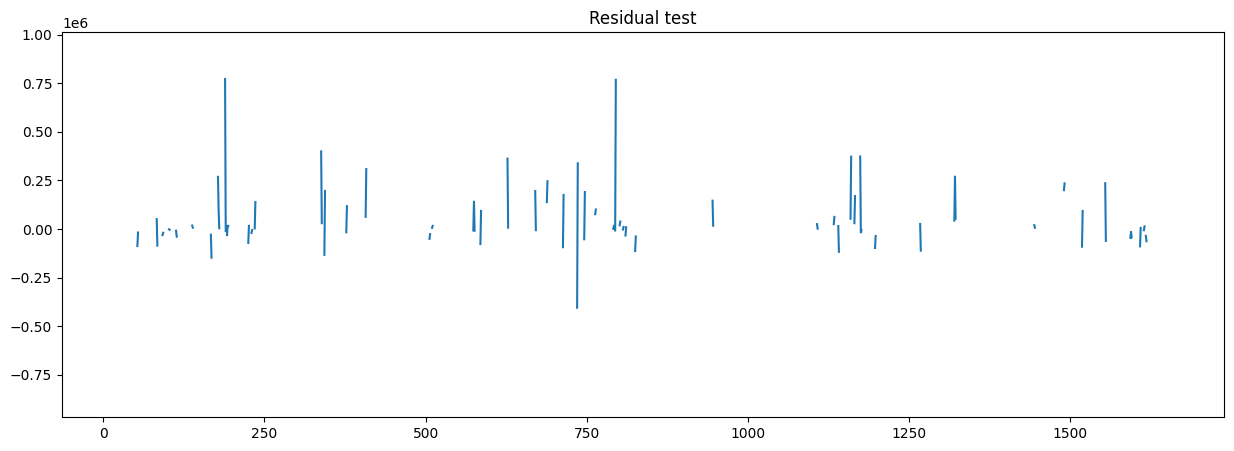

In [ ]:
(TestingDataResults['charges']-TestingDataResults['Predictedcharges']).plot(kind="line",figsize = (15,5),title="Residual test")

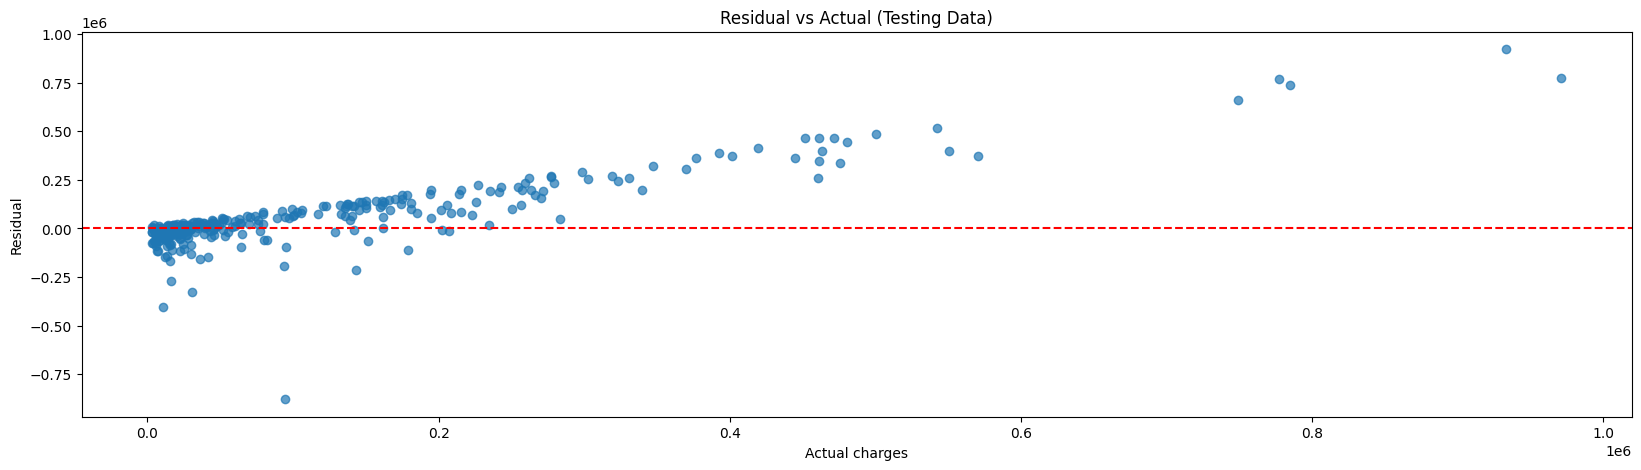

In [ ]:
# คำนวณ residual
residual = TestingDataResults['charges']-TestingDataResults['Predictedcharges']

# สร้าง scatter plot เพื่อแสดงความสัมพันธ์ระหว่าง residual กับค่าจริง
plt.figure(figsize=(20, 5))
plt.scatter(TestingDataResults['charges'], residual, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # เส้นแกน y=0 เพื่อให้เห็น residual ที่ศูนย์
plt.title('Residual vs Actual (Testing Data)')
plt.xlabel('Actual charges')
plt.ylabel('Residual')
plt.show()

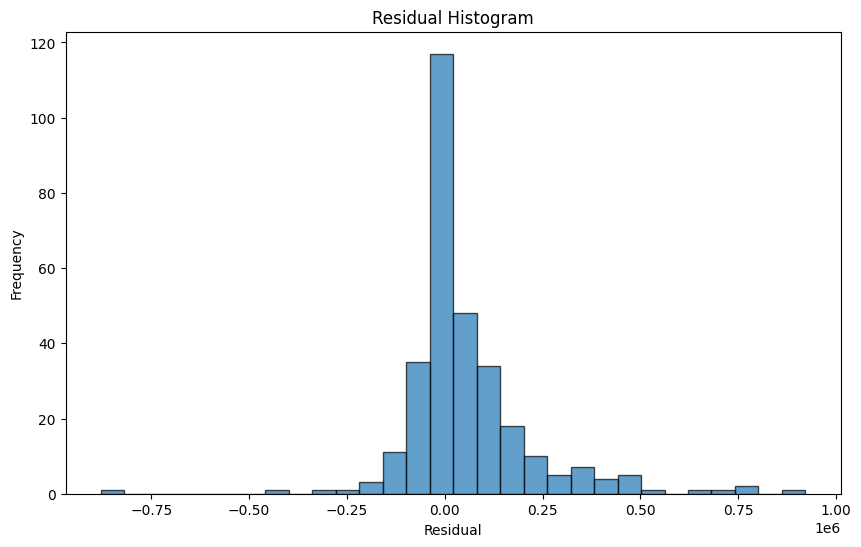

In [ ]:
# สร้าง histogram ของ residual
plt.figure(figsize=(10, 6))
plt.hist(residual, bins=30, edgecolor='black', alpha=0.7)
plt.title('Residual Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# **12. Results Analysis**

## **12.1 Overfitting or not? Why?**

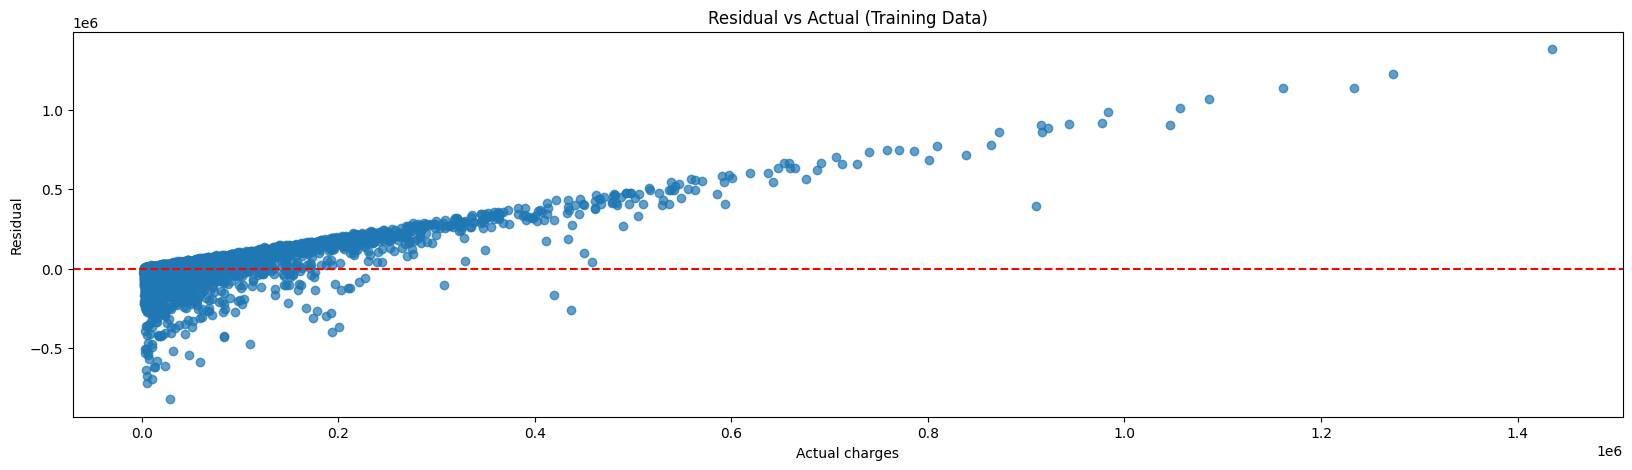

In [ ]:
import matplotlib.pyplot as plt

# คำนวณ residual
residual = TrainingDataResults['charges'] - TrainingDataResults['Predictedcharges']

# สร้าง scatter plot เพื่อแสดงความสัมพันธ์ระหว่าง residual กับค่าจริง
plt.figure(figsize=(20, 5))
plt.scatter(TrainingDataResults['charges'], residual, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # เส้นแกน y=0 เพื่อให้เห็น residual ที่ศูนย์
plt.title('Residual vs Actual (Training Data)')
plt.xlabel('Actual charges')
plt.ylabel('Residual')
plt.show()

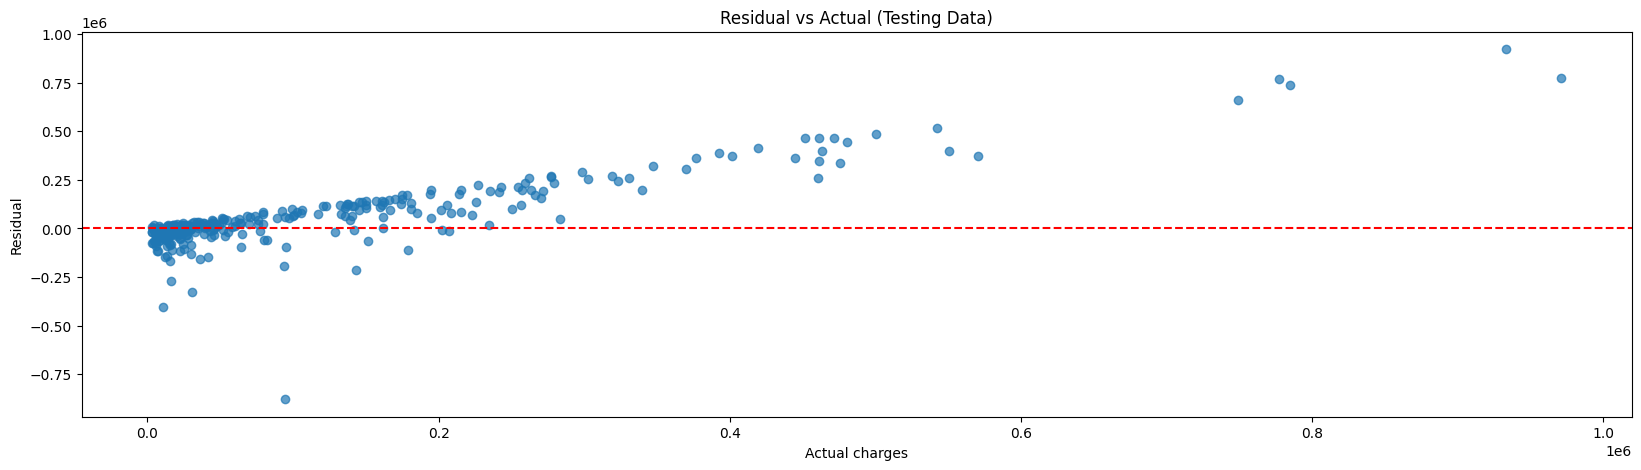

In [ ]:
# คำนวณ residual
residual = TestingDataResults['charges']-TestingDataResults['Predictedcharges']

# สร้าง scatter plot เพื่อแสดงความสัมพันธ์ระหว่าง residual กับค่าจริง
plt.figure(figsize=(20, 5))
plt.scatter(TestingDataResults['charges'], residual, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # เส้นแกน y=0 เพื่อให้เห็น residual ที่ศูนย์
plt.title('Residual vs Actual (Testing Data)')
plt.xlabel('Actual charges')
plt.ylabel('Residual')
plt.show()

จากกราฟแสดงความสัมพันธ์ระหว่างค่า Residual และค่า Actual ทั้งใน Training Data และ Testing Data พบว่า Residual มีแนวโน้มเพิ่มขึ้นตามค่า Actual ซึ่งบ่งชี้ว่าโมเดล Linear Regression มีแนวโน้มที่จะทำนายค่าต่ำเกินไปเมื่อค่าเป้าหมาย (target) มีค่ามาก และทำนายค่าสูงเกินไปเมื่อค่าเป้าหมายมีค่าน้อย ลักษณะดังกล่าวแสดงให้เห็นถึงความไม่เป็นเชิงเส้น (non-linearity) ระหว่างตัวแปรอิสระและตัวแปรเป้าหมาย ซึ่งเป็นข้อจำกัดของโมเดลเชิงเส้นที่ไม่สามารถอธิบายความสัมพันธ์ในลักษณะโค้งหรือซับซ้อนได้ นอกจากนี้ การกระจายตัวของ Residual ที่ไม่อยู่รอบเส้นศูนย์อย่างสม่ำเสมอสะท้อนให้เห็นว่า residuals ไม่เป็นการแจกแจงแบบปกติ (non-normal residuals) อันอาจเกิดจากการที่ตัวแปรเป้าหมายมีการกระจายแบบเบ้ขวา (right-skewed distribution) อย่างไรก็ตาม เนื่องจากกราฟของชุดฝึกและชุดทดสอบมีลักษณะใกล้เคียงกัน จึงสรุปได้ว่าโมเดลไม่ได้เกิดการ overfitting แต่มีแนวโน้มที่จะ underfit เนื่องจากไม่สามารถจับความสัมพันธ์ที่ซับซ้อนได้อย่างเพียงพอ เพื่อปรับปรุงผลลัพธ์ อาจพิจารณาการทำ log transformation กับตัวแปรเป้าหมาย หรือใช้โมเดลที่สามารถเรียนรู้ความสัมพันธ์แบบไม่เชิงเส้นได้ เช่น Tree-based Models

## **12.2 From residual or error analysis, what characteristics of the data make your model less effective?  What is the limitation?**

จากการวิเคราะห์กราฟ Residual พบว่า Residual มีการกระจายตัวไม่สม่ำเสมอ โดยมีลักษณะกระจุกตัวในช่วงที่ target มีค่าน้อย และมีการกระจายกว้างขึ้นเมื่อค่า target มีค่ามากขึ้น ซึ่งแสดงให้เห็นว่าค่าความคลาดเคลื่อน (error) ของโมเดลเพิ่มขึ้นตามระดับของค่าทำนาย อีกทั้งยังพบจุดข้อมูลที่เป็น outlier อย่างชัดเจนหลายจุดในช่วงค่าทำนายสูง สะท้อนว่าโมเดลไม่สามารถอธิบายค่าจริงของตัวอย่างที่มีค่ามากหรือน้อยมากได้ดี

เมื่อพิจารณาลักษณะข้อมูล พบว่าปัญหาหลักมาจากความไม่เป็นเชิงเส้น (non-linearity) ระหว่าง Feature และ Target ซึ่งทำให้โมเดลเชิงเส้นไม่สามารถจับความสัมพันธ์ที่ซับซ้อนภายในข้อมูลได้ทั้งหมด อีกทั้งยังมีจุดข้อมูลบางส่วนที่เป็น outlier ซึ่งมีค่าเบี่ยงเบนสูงจนส่งผลให้เส้น regression ถูกลากไปในทิศทางที่ไม่เหมาะสม

## **12.3 What features are important and sufficient to create a ML model that has the highest accuracy?**

In [ ]:
# Coefficient
LREG.coef_

array([ 1.91647701e+02,  9.98652638e+02,  1.36094123e+00,  1.24240267e+04,
       -3.60996340e+03, -5.24614152e+03, -3.56792179e+03,  5.91066642e+02,
       -4.69042892e+03,  4.09936228e+03, -1.05675905e+04,  8.02676985e+04,
       -2.66816540e+04, -2.43551990e+04, -1.86632550e+04])

In [ ]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['dzclass', 'num.co', 'dnr', 'sfdm2']
FunctionAnova(inpData=data_train,
              TargetVariable='charges',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

dzclass is correlated with charges | P-Value: 1.2854407033332067e-207
num.co is correlated with charges | P-Value: 5.54513803545154e-24
dnr is correlated with charges | P-Value: 5.223836058494744e-16
sfdm2 is correlated with charges | P-Value: 1.7360803655919153e-99


['dzclass', 'num.co', 'dnr', 'sfdm2']

จากการวิเคราะห์ความสำคัญของตัวแปรเพื่อทำนาย charges พบว่าตัวแปรที่มีอิทธิพลมากที่สุดสามารถพิจารณาได้ทั้งจาก ค่าสัมประสิทธิ์ (coefficient) ของโมเดลและ ค่าความสัมพันธ์ (correlation) กับตัวแปรเป้าหมาย

จากค่าสัมประสิทธิ์ของโมเดล:
ตัวแปร 3 อันดับแรกที่มีค่าค่าสัมประสิทธิ์สูงที่สุด ได้แก่
- slos (ระยะเวลาการเข้ารับการรักษา) ค่าสัมประสิทธิ์ = 9.9865×10²
- sfdm2 (สะท้อนระดับความรุนแรงของอาการป่วย)
- dnr (DNR หลัง SADM)

จากความสัมพันธ์กับตัวแปรเป้าหมาย:
ตัวแปร 3 อันดับแรกที่มีค่าความสัมพันธ์สูงที่สุดกับ charges ได้แก่ totcst (ค่าใช้จ่ายรวม), slos และ dnr_day อย่างไรก็ตาม การวิเคราะห์ความสัมพันธ์ระหว่างตัวแปรอิสระพบว่า slos และ dnr_day มีค่าความสัมพันธ์ระหว่างกันสูง ซึ่งอาจก่อให้เกิด ปัญหา multicollinearity และทำให้ค่าสัมประสิทธิ์ของโมเดลไม่เสถียร เพื่อหลีกเลี่ยงปัญหาดังกล่าว จึงเลือกใช้ slos แทน dnr_day เนื่องจากมีความสัมพันธ์กับตัวแปรเป้าหมาย charges สูงกว่า

นอกจากนี้หากพิจารณาค่า P-Value จาก ANOVA และ Chi-square (ตรวจสอบความสัมพันธ์เชิงสถิติและช่วยจัดการปัญหา multicollinearity) จะพบว่า dzclass (ระดับความรุนแรงของโรค), num.co (จำนวนโรคร่วม), dnr และ sfdm2 มีค่า P-Value อยู่ในระดับต่ำมาก (ต่ำกว่า 0.001) เช่นกัน ซึ่งบ่งชี้ว่าตัวแปรดังกล่าวมีผลต่อ charges อย่างมีนัยสำคัญทางสถิติ

เมื่อพิจารณาทั้งค่า coefficient, correlation, และ p-value (ANOVA/Chi-square) ร่วมกันพบว่าตัวแปรที่มีอิทธิพลสูงสุดและเหมาะสมที่สุดสำหรับการสร้างโมเดลเพื่อให้ได้ความแม่นยำสูง ได้แก่ 1. slos, 2. sfdm2, 3. dnr, 4. totcst, 5. dzclass และ 6. num.co ตัวแปรเหล่านี้จึงถือว่าเป็น ตัวแปรสำคัญและเพียงพอ สำหรับการสร้างโมเดล Machine Learning ที่มีประสิทธิภาพสูงในการทำนายค่า charges

## **12.4 Based on the accuracy you get from the model, can your model actually be used in real situation?**

In [ ]:
from sklearn import metrics
# Measuring Goodness of fit in Training data by R square
print('R2 Value of training set :',metrics.r2_score(y_train, LREG.predict(X_train_encode)))
print('R2 Value of testing set :',metrics.r2_score(y_test, LREG.predict(X_test_encode)))

R2 Value of training set : 0.6212599338981342
R2 Value of testing set : 0.5954318613531391


In [ ]:
# Measuring Goodness of fit in Training data by MAPE
TrainingDataResults['APE'] = 100 * ((abs(TrainingDataResults['charges']-TrainingDataResults['Predictedcharges']))/TrainingDataResults['charges'])
MAPE_training = np.mean(TrainingDataResults['APE'])
RMSE_training = np.sqrt(np.mean((TrainingDataResults['charges']-TrainingDataResults['Predictedcharges'])**2))
MAE_training = np.mean(abs(TrainingDataResults['charges']-TrainingDataResults['Predictedcharges']))
print('MAPE on training data (Model1):', MAPE_training)
print('RMSE on training data (Model1):', RMSE_training)
print('MAE on training data (Model1):', MAE_training)
print('% difference between MAE and RMSE (Model1)',(RMSE_training-MAE_training)*100/MAE_training)
print('Accuracy on training data: (Model1)', 100-MAPE_training)

MAPE on training data (Model1): 348.55874568591145
RMSE on training data (Model1): 135251.65145084437
MAE on training data (Model1): 75650.3382704935
% difference between MAE and RMSE (Model1) 78.78525667293364
Accuracy on training data: (Model1) -248.55874568591145


In [ ]:
# Measuring Goodness of fit in Testing data by MAPE
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE_testing = np.mean(TestingDataResults['APE'])
RMSE_testing = np.sqrt(np.mean((TestingDataResults['charges']-TestingDataResults['Predictedcharges'])**2))
MAE_testing = np.mean(abs(TestingDataResults['charges']-TestingDataResults['Predictedcharges']))
print('MAPE on test data:', MAPE_testing)
print('RMSE on test data:', RMSE_testing)
print('MAPE on test data:', MAPE_testing)
print('% difference between MAE and RMSE',(RMSE_testing-MAE_testing)*100/MAE_testing)
print('Accuracy on test data:', 100-MAPE_testing)

MAPE on test data: 195.54390238706063
RMSE on test data: 176710.6160100227
MAPE on test data: 195.54390238706063
% difference between MAE and RMSE 72.07168118892514
Accuracy on test data: -95.54390238706063


จากผลการประเมินประสิทธิภาพของโมเดล Linear Regression พบว่าโมเดลยังไม่เหมาะสมต่อการนำไปใช้งานในสถานการณ์จริง ค่า R² ของ Training Data (0.62) และ Testing Data (0.60) แสดงให้เห็นว่าโมเดลสามารถอธิบายความแปรปรวนของ Target ได้เพียงประมาณ 60% ซึ่งถือว่าอยู่ในระดับปานกลางแต่ยังไม่เพียงพอสำหรับการทำนายที่มีความแม่นยำสูง นอกจากนี้ ค่า MAPE ของ Training Data อยู่ที่ประมาณ 348% และ MAPE ของ Testing Data อยู่ที่ประมาณ 196% บ่งชี้ว่าโมเดลมีความคลาดเคลื่อนของการทำนายสูงมากเมื่อเทียบกับค่าจริง ซึ่งเกินกว่าขอบเขตที่ยอมรับได้สำหรับการใช้งานจริง ขณะที่ค่า RMSE และ MAE ทั้งใน Training และ Testing แสดงให้เห็นว่าโมเดลทำนายได้ห่างจากค่าจริงในเชิงปริมาณอย่างมีนัยสำคัญ อีกทั้งค่า Accuracy ทั้ง Training (-248.56%) และ Testing (-95.54%) ยังยืนยันว่าโมเดลไม่สามารถทำนายข้อมูลใหม่ได้อย่างถูกต้อง

จากผลลัพธ์ทั้งหมดสามารถสรุปได้ว่าโมเดลมีแนวโน้มเกิด underfitting เนื่องจากไม่สามารถเรียนรู้ความสัมพันธ์ที่ซับซ้อนและไม่เป็นเชิงเส้นภายในข้อมูลได้อย่างเพียงพอ ดังนั้น โมเดลนี้จึงยังไม่เหมาะสมต่อการนำไปใช้งานจริง และจำเป็นต้องปรับปรุงวิธีการ modeling หรือพิจารณาใช้โมเดลที่สามารถจัดการความซับซ้อนของข้อมูลได้ดีกว่า